

# Análisis de la Contaminación del Aire en Chile
**Minería de Datos CC5205-1**

Estudiantes:

Juan Pablo Bustamante  
Diego Alonso Carter  
Carolina Navarro P.  
Valentina  
Tomás Vallejo




## Introducción

En este segundo hito del proyecto de Minería de Datos sobre calidad del aire en Chile, el equipo retoma el trabajo desarrollado en el Hito 1 con un foco claro: responder de manera completa y ordenada las preguntas que se habían definido en la etapa anterior. A partir del conjunto de datos ya explorado y curado, se estructuran los análisis, visualizaciones y experimentos necesarios para dar una respuesta explícita a cada una de esas preguntas, revisando cuando es necesario los criterios de limpieza y las decisiones tomadas previamente.

La motivación de este hito se mantiene en la importancia de comprender la contaminación atmosférica en Chile y sus efectos sobre la salud y la calidad de vida de la población. Sin embargo, en esta etapa el énfasis está puesto en transformar las exploraciones iniciales en respuestas concretas: se busca que cada pregunta planteada en el Hito 1 cuente con un respaldo claro en los datos, en los gráficos y en las métricas utilizadas, de modo que el proyecto avance desde una fase descriptiva hacia una comprensión más estructurada del fenómeno analizado.

En este contexto, el Hito 2 se orienta a organizar el trabajo en torno a las preguntas originales, revisar y completar los análisis necesarios y dejar documentada la forma en que se arriba a cada respuesta. Más que introducir nuevos modelos complejos, se prioriza la claridad: vincular cada pregunta con los datos utilizados, los pasos realizados y las conclusiones alcanzadas, identificando también aquellos aspectos que podrían profundizarse en futuras etapas.

Los objetivos específicos de este hito son:

- Responder de forma explícita y sistemática las preguntas formuladas en el Hito 1 a partir del conjunto de datos de calidad del aire.  
- Ordenar y documentar los análisis, visualizaciones y decisiones de preprocesamiento que permiten sustentar cada respuesta.  
- Evaluar qué preguntas quedan completamente resueltas y en cuáles aparecen limitaciones de datos o de metodología.  
- Identificar posibles líneas de trabajo futuro a partir de las respuestas obtenidas y de las brechas detectadas en el análisis.




## Exploración de Datos

<p>En esta etapa inicial recopilamos y organizamos el conjunto de datos de calidad del aire proveniente del <b>Sistema de Información Nacional de Calidad del Aire (SINCA)</b>. El dataset integra información de <b>121 estaciones</b> distribuidas en distintas regiones de Chile, con registros predominantemente <b>horarios</b> que abarcan varios años, lo que proporciona alta densidad temporal y notable heterogeneidad entre estaciones de monitoreo.</p>

<p>Las variables incluyen contaminantes atmosféricos (PM2.5, PM10, SO₂, NO₂, O₃, CO), parámetros meteorológicos (temperatura, humedad relativa, dirección y velocidad del viento) y el <b>Índice de Calidad del Aire (ICAP)</b>. Es importante destacar que no todas las estaciones miden la totalidad de contaminantes o parámetros meteorológicos, y existen <b>cambios de instrumentación</b> y períodos con datos faltantes que generan coberturas desiguales y potenciales inconsistencias en las series temporales.</p>

<p><b>Características principales del dataset identificadas:</b></p>
<ul>
  <li><b>Resolución temporal y cobertura:</b> Series con granularidad horaria (ocasionalmente minutal o diaria), períodos de operación variables por estación y presencia de gaps temporales significativos.</li>
  <li><b>Calidad y completitud de datos:</b> Coexistencia de datos validados, preliminares y no validados; necesidad de detección sistemática de <i>outliers</i> y caracterización de períodos con datos faltantes prolongados.</li>
  <li><b>Estadística descriptiva:</b> Análisis de medianas e IQR para contaminantes particulados; identificación de distribuciones asimétricas y colas pesadas características de episodios de alta contaminación; cálculo de percentiles por estación y mes.</li>
  <li><b>Patrones temporales:</b> Identificación de ciclos diurnos y semanales en PM y gases; análisis de estacionalidad; evaluación de autocorrelación (ACF) y persistencia de episodios contaminantes.</li>
  <li><b>Relaciones bivariadas:</b> Construcción de matrices de correlación contaminante-meteorología (especialmente viento, temperatura y humedad); análisis de <i>scatter plots</i> condicionados por franja horaria y estación del año.</li>
  <li><b>Visualizaciones exploratorias:</b> Generación de histogramas/KDE, gráficos de <i>series temporales</i> con bandas de confianza, <i>boxplots</i> mensuales, <i>heatmaps</i> de correlación y <i>rosas de viento</i> por estación.</li>
</ul>

<p><b>Estrategia de integración y armonización:</b> La diversidad de resoluciones temporales y coberturas exige implementar <b>resampling</b> y armonización temporal (unificación a resolución horaria/diaria manteniendo trazabilidad), además de <b>estandarización de unidades y nomenclatura</b>. El proceso contempla la fusión de tablas mediante claves <code>station_id</code> y <code>timestamp</code>, resolución de registros duplicados y verificación de <b>coherencia en zonas horarias</b>. Para casos con variables meteorológicas faltantes, se evaluará la <b>integración con fuentes externas</b> (reanálisis meteorológicos o redes complementarias) para minimizar sesgos en los análisis.</p>

<p><b>Procesamiento y estandarización realizados:</b> Los datos fueron <b>organizados en un repositorio centralizado</b> y sometidos a limpieza inicial para <b>estandarizar</b> dos categorías principales: <i>datos meteorológicos</i> y <i>datos de contaminación</i>. Se normalizaron nombres de variables, formatos temporales y sistemas de unidades, documentándose la existencia de <b>mediciones a diferentes alturas</b> (ejemplo: viento a 2 m versus 10 m), aspecto que será considerado explícitamente en los análisis posteriores.</p>

<p><b>Enriquecimiento contextual:</b> Se planifica <b>correlacionar</b> las series temporales con <b>eventos ambientales externos</b> (incendios forestales, tormentas de polvo, inversiones térmicas y otros fenómenos meteorológicos extremos) y aprovechar <b>información geoespacial</b> (coordenadas, altitud y características del entorno) para vincular cada estación con su ubicación y contexto territorial específico. Este enriquecimiento mejorará la interpretabilidad de patrones observados y la robustez de los modelos predictivos.</p>

<p>Con esta exploración sistemática caracterizamos la estructura del dataset, identificamos sus limitaciones principales y definimos oportunidades de integración, estableciendo los fundamentos metodológicos para las etapas subsecuentes de análisis estadístico y desarrollo de modelos predictivos.</p>


# Preguntas de Investigación

## 1. Predicción de concentraciones de PM2.5
¿Es posible predecir con precisión la **concentración de PM2.5** a distintos horizontes temporales (t+1h, t+6h, t+24h) utilizando datos históricos y variables meteorológicas?

**Subpreguntas específicas:**
- ¿Cuál horizonte temporal proporciona predicciones más precisas y estables entre estaciones?
- ¿Qué variables (lags de PM2.5, velocidad del viento, humedad relativa, temperatura, variables calendáricas) contribuyen más significativamente a la capacidad predictiva?
- ¿Qué configuración de ventanas temporales (3h, 6h, 24h) mejora el error respecto a modelos de persistencia simple?

## 2. Detección de patrones anómalos
¿Qué **patrones anómalos** se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?

**Subpreguntas específicas:**
- ¿Los picos de concentración atípicos coinciden con condiciones de baja ventilación o eventos específicos (incendios, episodios de polvo, feriados)?
- ¿Existe variabilidad en la frecuencia de anomalías según la estación del año o entre días laborales versus fines de semana?

## 3. Impacto de zonas de sacrificio
¿Las estaciones ubicadas dentro o próximas a **zonas de sacrificio ambiental** presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?

**Subpreguntas específicas:**
- ¿Cómo definir objetivamente la pertenencia (polígonos oficiales versus buffers de 3-5-10 km) y qué estaciones constituyen controles apropiados?
- ¿Cuál es la magnitud de las diferencias en tasas de ocurrencia, duración promedio y intensidad máxima de episodios críticos?




# Estrategia metodológica

**P1. ¿Hasta qué punto es posible predecir las concentraciones horarias de PM2.5 en Coyhaique II a distintos horizontes de tiempo?**

Para responder esta pregunta, el equipo construyó un pipeline de regresión multivariada para predecir el PM2.5 en Coyhaique II a tres horizontes temporales: 1, 6 y 24 horas en el futuro (t+1, t+6 y t+24). El enfoque se basó exclusivamente en la propia serie de PM2.5 y en variables temporales derivadas, siguiendo la línea de trabajo planteada en el Hito 1.

En primer lugar, se integraron los archivos horarios de PM2.5 de SINCA, combinando las columnas de datos validados y preliminares en una única serie continua por estación. Luego se construyó una marca temporal única (fecha_hora) a partir de la fecha y la hora, lo que permitió ordenar correctamente los registros y generar variables de rezago y objetivos futuros sin fuga de información.

A partir de esta serie se generaron variables de entrada (features), entre ellas rezagos de PM2.5 (lag 1, 3, 6 y 24 horas) y variables calendáricas (hora del día, día de la semana, mes y dummies de estación del año). Para cada horizonte se definieron tres variables objetivo: PM25_t+1, PM25_t+6 y PM25_t+24. Las variables numéricas se estandarizaron y el conjunto de datos se dividió en tres bloques temporales: entrenamiento, validación y prueba, respetando siempre el orden cronológico.

Sobre esta base se entrenaron modelos de regresión lineal, Ridge y Random Forest para cada horizonte, comparando su desempeño con una línea base de persistencia (asumir que el valor futuro es igual al último observado). La evaluación se realizó con métricas estándar de predicción (MAE, RMSE y R²) en los conjuntos de validación y prueba, y se complementó con gráficos de comparación entre series reales y predichas, de manera de interpretar no sólo el nivel de error promedio, sino también la capacidad de los modelos para seguir picos y cambios de tendencia.

Adicionalmente, se exploró una extensión del pipeline incorporando variables meteorológicas (temperatura, humedad relativa, presión atmosférica, velocidad y dirección del viento) dentro del modelo de regresión lineal, con el fin de evaluar si estos predictores aportaban mejoras significativas en los distintos horizontes temporales. Esta variante permitió contrastar el rendimiento del enfoque original con y sin meteorología, manteniendo la misma estructura de entrenamiento y evaluación.

**P2. ¿Qué patrones anómalos se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?**

Para abordar esta pregunta, el equipo trabajó con las series horarias de PM2.5 de todas las estaciones disponibles, construyendo primero una columna combinada de PM2.5 que prioriza datos validados y, en su ausencia, datos preliminares. Sobre esta serie limpia se filtraron únicamente los registros con información numérica válida, garantizando un mínimo de observaciones por estación antes de proceder al análisis.

La detección de anomalías se realizó aplicando un criterio basado en el rango intercuartílico (IQR). Para cada estación se calcularon los cuartiles Q1 y Q3 y el IQR; a partir de ellos se definió un umbral superior (Q3 + 1.5·IQR), y se identificaron como picos atípicos los valores de PM2.5 que superaban este límite. De cada pico se registró la fecha, la hora y la estación correspondiente, construyendo así una tabla de eventos anómalos a nivel nacional.

Posteriormente, estas anomalías se enriquecieron con información contextual: estación del año, tipo de día (laboral o fin de semana/feriado), mes y, cuando correspondía, datos de calendario adicional. Con esta base se construyeron tablas de frecuencia y porcentajes por estación del año, tipo de día y mes, además de indicadores normalizados como “anomalías por día”.

Finalmente, se aplicaron pruebas estadísticas para contrastar si las condiciones de las anomalías diferían de manera significativa según el contexto. En particular, se utilizaron pruebas t de Student para comparar niveles de PM2.5 anómalos entre días laborales y fines de semana, y ANOVA para comparar entre estaciones del año y, cuando fue pertinente, entre estaciones de monitoreo. Estos análisis permitieron evaluar si las diferencias observadas en las frecuencias y magnitudes de las anomalías se deben a patrones reales o si son compatibles con la variabilidad esperada.

**P3. ¿Las estaciones ubicadas dentro o próximas a zonas de sacrificio ambiental presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?**

Para responder esta pregunta, primero se definió operacionalmente qué se entiende por “episodio crítico”. Se consideraron como tales los períodos en que la concentración de PM2.5 supera los 50 µg/m³ durante al menos cuatro horas consecutivas, a partir de las series horarias de PM2.5 de cada estación. A partir de esta regla se extrajeron, por estación, todos los episodios críticos junto con su duración y su concentración máxima.

En paralelo, se trabajó con información geoespacial de las zonas de sacrificio ambiental mediante polígonos oficiales y se construyeron buffers concéntricos de 3, 5 y 10 km alrededor de dichas zonas. Usando las coordenadas reales de las estaciones (latitud y longitud) y herramientas de análisis espacial (GeoPandas, shapely), se determinó si cada estación se encuentra dentro del polígono, en sus proximidades (dentro de los buffers) o a mayor distancia, clasificándolas así en grupos de “alta exposición”, “exposición moderada” y “control”.

Con la clasificación espacial y la base de episodios críticos consolidada, se calcularon indicadores cuantitativos por estación y por grupo: frecuencia de episodios (número de eventos críticos), duración promedio (horas por episodio) e intensidad máxima (valor máximo de PM2.5 dentro de los episodios). Estos indicadores se compararon entre grupos de exposición para evaluar si las estaciones cercanas a zonas de sacrificio presentan una carga de contaminación crítica sistemáticamente mayor que las estaciones de control.

# Desarrollo de la pregunta 1
# Modelo de regresión multivariada para la predicción de concentraciones de PM2.5
*Desarrollado por: Tomás Vallejo y Juan Pablo Bustamante*

Con el objetivo de evaluar la capacidad predictiva del PM2.5 en Coyhaique II, se construyó un pipeline completo basado en modelos de regresión multivariada para tres horizontes temporales: t+1, t+6 y t+24 horas. El enfoque se sustentó exclusivamente en el historial de la serie y en variables temporales, siguiendo la metodología propuesta en el Hito 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"
resultados = []

for estacion in os.listdir(base_dir):
    estacion_path = os.path.join(base_dir, estacion, 'Contaminacion', 'MP 2.5.csv')
    if os.path.isfile(estacion_path):
        df = pd.read_csv(
            estacion_path,
            sep=';',
            usecols=[0, 1, 2, 3, 4],
            skiprows=1,
            names=[
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ],
            dtype=str,
            low_memory=False
        )
        # Convertir todas las columnas de concentración a float
        for col in [
            'concentracion_de_MP_2_5',
            'concentracion_de_MP_2_5_preliminares',
            'concentracion_de_MP_2_5_no_validados'
        ]:
            df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
        df['nombre_estacion'] = estacion
        resultados.append(df[
            [
                'nombre_estacion',
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ]
        ])

tabla_final = pd.concat(resultados, ignore_index=True)

**Construcción del índice temporal**

A partir de la base inicial, se integraron las columnas de fecha y hora en un único timestamp (fecha_hora), permitiendo ordenar la serie cronológicamente y habilitar la creación de lags y variables objetivo. Esto garantizó una estructura temporal consistente y evitó fugas de información futura durante el modelado.

In [ ]:
# 1. Tomamos solo una estación de Coyhaique
estacion_objetivo = "Coyhaique II"

df = tabla_final[tabla_final["nombre_estacion"] == estacion_objetivo].copy()

# 2. Aseguramos que 'hora' tenga 4 dígitos (0000, 0100, 2300, etc.)
df["hora"] = df["hora"].astype(str).str.zfill(4)

# 3. Construimos un datetime real
df["fecha_hora_str"] = df["fecha"] + df["hora"]
df["fecha_hora"] = pd.to_datetime(df["fecha_hora_str"], format="%y%m%d%H%M", errors="coerce")

# 4. Ordenamos por tiempo y quitamos filas sin fecha_hora
df = df.dropna(subset=["fecha_hora"]).sort_values("fecha_hora").reset_index(drop=True)

df[["nombre_estacion", "fecha", "hora", "fecha_hora", "concentracion_de_MP_2_5"]].head()


,nombre_estacion,fecha,hora,fecha_hora,concentracion_de_MP_2_5
0,Coyhaique II,130901,0100,2013-09-01 01:00:00,184.0
1,Coyhaique II,130901,0200,2013-09-01 02:00:00,151.0
2,Coyhaique II,130901,0300,2013-09-01 03:00:00,75.0
3,Coyhaique II,130901,0400,2013-09-01 04:00:00,121.0
4,Coyhaique II,130901,0500,2013-09-01 05:00:00,151.0


**Generación de las variables objetivo (t+1, t+6 y t+24)**

La serie validada de PM2.5 se desplazó temporalmente para construir las columnas objetivo que representan las concentraciones futuras que el modelo deberá predecir. Esta transformación generó naturalmente valores faltantes en los últimos registros, los cuales fueron eliminados posteriormente.

In [ ]:
# 1. Filtrar datos validados (concentracion_de_MP_2_5 ≠ NaN)
df_validado = df.dropna(subset=["concentracion_de_MP_2_5"]).copy()

# 2. Ordenar por tiempo
df_validado = df_validado.sort_values("fecha_hora").reset_index(drop=True)

# 3. Crear las variables objetivo
df_validado["PM25_t+1"]  = df_validado["concentracion_de_MP_2_5"].shift(-1)
df_validado["PM25_t+6"]  = df_validado["concentracion_de_MP_2_5"].shift(-6)
df_validado["PM25_t+24"] = df_validado["concentracion_de_MP_2_5"].shift(-24)

# Mostrar las primeras filas
print(df_validado[["fecha_hora", "concentracion_de_MP_2_5", "PM25_t+1", "PM25_t+6", "PM25_t+24"]].head(12))

# Mostrar las últimas filas
df_validado[["fecha_hora", "concentracion_de_MP_2_5", "PM25_t+1", "PM25_t+6", "PM25_t+24"]].tail(12)

            fecha_hora  concentracion_de_MP_2_5  PM25_t+1  PM25_t+6  PM25_t+24
0  2013-09-01 01:00:00                    184.0     151.0     147.0      109.0
1  2013-09-01 02:00:00                    151.0      75.0     134.0       39.0
2  2013-09-01 03:00:00                     75.0     121.0      78.0       29.0
3  2013-09-01 04:00:00                    121.0     151.0      61.0       13.0
4  2013-09-01 05:00:00                    151.0     159.0      88.0       23.0
5  2013-09-01 06:00:00                    159.0     147.0      88.0       32.0
6  2013-09-01 07:00:00                    147.0     134.0      72.0       39.0
7  2013-09-01 08:00:00                    134.0      78.0      72.0       46.0
8  2013-09-01 09:00:00                     78.0      61.0      70.0       57.0
9  2013-09-01 10:00:00                     61.0      88.0      84.0       43.0
10 2013-09-01 11:00:00                     88.0      88.0      70.0       47.0
11 2013-09-01 12:00:00                     88.0     

,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24
101477,2025-08-31 12:00:00,31.0,32.0,72.0,NaN
101478,2025-08-31 13:00:00,32.0,54.0,76.0,NaN
101479,2025-08-31 14:00:00,54.0,33.0,42.0,NaN
101480,2025-08-31 15:00:00,33.0,32.0,84.0,NaN
101481,2025-08-31 16:00:00,32.0,53.0,27.0,NaN
101482,2025-08-31 17:00:00,53.0,72.0,17.0,NaN
101483,2025-08-31 18:00:00,72.0,76.0,NaN,NaN
101484,2025-08-31 19:00:00,76.0,42.0,NaN,NaN
101485,2025-08-31 20:00:00,42.0,84.0,NaN,NaN
101486,2025-08-31 21:00:00,84.0,27.0,NaN,NaN


**Creación de variables explicativas**

Se generaron lags de 1, 3, 6 y 24 horas, fundamentales para capturar la dependencia temporal del contaminante. Además, se incorporaron variables calendáricas (hora, día de la semana, mes y estación del año), ya que el PM2.5 presenta patrones diarios y estacionales asociados tanto a comportamientos humanos como a variaciones atmosféricas estructurales. Los valores faltantes asociados a los primeros lags fueron descartados en la construcción del dataset final.


In [ ]:
# Partimos desde df_validado
df_feat = df_validado.copy()

# ----------------------------
# 1) LAGS DE PM2.5
# ----------------------------
# Lags de 1, 3, 6 y 24 horas (valores pasados)
df_feat["PM25_lag_1"]  = df_feat["concentracion_de_MP_2_5"].shift(1)
df_feat["PM25_lag_3"]  = df_feat["concentracion_de_MP_2_5"].shift(3)
df_feat["PM25_lag_6"]  = df_feat["concentracion_de_MP_2_5"].shift(6)
df_feat["PM25_lag_24"] = df_feat["concentracion_de_MP_2_5"].shift(24)

# ----------------------------
# 2) VARIABLES CALENDÁRICAS
# ----------------------------
df_feat["hora_num"]   = df_feat["fecha_hora"].dt.hour          # 0-23
df_feat["dia_semana"] = df_feat["fecha_hora"].dt.dayofweek     # 0=lunes
df_feat["mes"]        = df_feat["fecha_hora"].dt.month         # 1-12

def estacion_ano(m):
    if m in [12, 1, 2]:
        return "verano"
    elif m in [3, 4, 5]:
        return "otoño"
    elif m in [6, 7, 8]:
        return "invierno"
    else:
        return "primavera"

df_feat["estacion_ano"] = df_feat["mes"].apply(estacion_ano)

# ----------------------------
# 3) REVISAR RESULTADO
# ----------------------------
cols_vista = [
    "fecha_hora",
    "concentracion_de_MP_2_5",
    "PM25_t+1", "PM25_t+6", "PM25_t+24",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes", "estacion_ano"
]

from IPython.display import display

print("Primeras filas con targets, lags y variables de calendario:")
display(df_feat[cols_vista].head(15))

print("\nFilas intermedias (por ejemplo alrededor del índice 20000):")
display(df_feat[cols_vista].iloc[20000:20015])

Primeras filas con targets, lags y variables de calendario:


,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano
0,2013-09-01 01:00:00,184.0,151.0,147.0,109.0,NaN,NaN,NaN,NaN,1,6,9,primavera
1,2013-09-01 02:00:00,151.0,75.0,134.0,39.0,184.0,NaN,NaN,NaN,2,6,9,primavera
2,2013-09-01 03:00:00,75.0,121.0,78.0,29.0,151.0,NaN,NaN,NaN,3,6,9,primavera
3,2013-09-01 04:00:00,121.0,151.0,61.0,13.0,75.0,184.0,NaN,NaN,4,6,9,primavera
4,2013-09-01 05:00:00,151.0,159.0,88.0,23.0,121.0,151.0,NaN,NaN,5,6,9,primavera
5,2013-09-01 06:00:00,159.0,147.0,88.0,32.0,151.0,75.0,NaN,NaN,6,6,9,primavera
6,2013-09-01 07:00:00,147.0,134.0,72.0,39.0,159.0,121.0,184.0,NaN,7,6,9,primavera
7,2013-09-01 08:00:00,134.0,78.0,72.0,46.0,147.0,151.0,151.0,NaN,8,6,9,primavera
8,2013-09-01 09:00:00,78.0,61.0,70.0,57.0,134.0,159.0,75.0,NaN,9,6,9,primavera
9,2013-09-01 10:00:00,61.0,88.0,84.0,43.0,78.0,147.0,121.0,NaN,10,6,9,primavera



Filas intermedias (por ejemplo alrededor del índice 20000):


,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano
20000,2016-02-19 10:00:00,5.64700,8.82999,8.14998,6.78999,4.76400,4.75200,3.07800,8.82999,10,4,2,verano
20001,2016-02-19 11:00:00,8.82999,15.63000,8.14998,3.39500,5.64700,17.64000,1.01800,5.43200,11,4,2,verano
20002,2016-02-19 12:00:00,15.63000,15.62000,8.90999,2.71600,8.82999,4.76400,1.00000,4.75300,12,4,2,verano
20003,2016-02-19 13:00:00,15.62000,10.18000,7.46899,2.03700,15.63000,5.64700,4.75200,7.82000,13,4,2,verano
20004,2016-02-19 14:00:00,10.18000,8.14998,16.30000,7.79800,15.62000,8.82999,17.64000,5.95300,14,4,2,verano
20005,2016-02-19 15:00:00,8.14998,8.14998,16.38000,4.42500,10.18000,15.63000,4.76400,4.41399,15,4,2,verano
20006,2016-02-19 16:00:00,8.14998,8.14998,3.57600,4.75300,8.14998,15.62000,5.64700,4.75300,16,4,2,verano
20007,2016-02-19 17:00:00,8.14998,8.90999,7.46899,8.14998,8.14998,10.18000,8.82999,4.75300,17,4,2,verano
20008,2016-02-19 18:00:00,8.90999,7.46899,4.07400,6.47300,8.14998,8.14998,15.63000,5.09299,18,4,2,verano
20009,2016-02-19 19:00:00,7.46899,16.30000,1.00000,16.98000,8.90999,8.14998,15.62000,6.11100,19,4,2,verano


**Preparación del conjunto final para el modelo**

Se seleccionaron únicamente las variables relevantes (lags, calendarios y objetivos) y se eliminaron todas las filas con información incompleta. La variable categórica estación del año fue codificada mediante one-hot encoding, dejando un dataset final completamente numérico y apto para entrenamiento.

In [ ]:
#mostrar
# 1. Seleccionar columnas de interés
features_numericas = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
]

feature_categoricas = ["estacion_ano"]

targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]


# 2. Crear dataframe solo con columnas necesarias (incluyendo fecha_hora para graficar después)
df_modelo = df_feat[["fecha_hora"] + features_numericas + feature_categoricas + targets].copy()

# 3. Eliminar filas con NaN (por lags o targets sin futuro disponible)
df_modelo = df_modelo.dropna().reset_index(drop=True)

print("Filas totales después del dropna:", len(df_modelo))

# 4. One-hot encoding de variables categóricas
df_modelo = pd.get_dummies(df_modelo, columns=feature_categoricas, drop_first=True)

# Ver primeras filas del dataset final
df_modelo.head()


Filas totales después del dropna: 101441


,fecha_hora,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,PM25_t+1,PM25_t+6,PM25_t+24,estacion_ano_otoño,estacion_ano_primavera,estacion_ano_verano
0,2013-09-02 01:00:00,100.0,136.0,90.0,184.0,1,0,9,39.0,39.0,153.0,False,True,False
1,2013-09-02 02:00:00,109.0,87.0,85.0,151.0,2,0,9,29.0,46.0,87.0,False,True,False
2,2013-09-02 03:00:00,39.0,100.0,93.0,75.0,3,0,9,13.0,57.0,51.0,False,True,False
3,2013-09-02 04:00:00,29.0,109.0,136.0,121.0,4,0,9,23.0,43.0,32.0,False,True,False
4,2013-09-02 05:00:00,13.0,39.0,87.0,151.0,5,0,9,32.0,47.0,33.0,False,True,False


**Partición temporal del dataset**

El conjunto final se dividió respetando el orden cronológico: 70% para entrenamiento, 15% para validación y 15% para prueba. Esta segmentación asegura una evaluación realista del modelo, simulando predicciones sobre periodos no observados previamente.

In [ ]:
# Asegurar que el dataset está ordenado cronológicamente
df_modelo = df_modelo.sort_index()

n = len(df_modelo)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

df_train = df_modelo.iloc[:train_end]
df_val = df_modelo.iloc[train_end:val_end]
df_test = df_modelo.iloc[val_end:]

print("Tamaños del split temporal:")
print("Train:", df_train.shape)
print("Validación:", df_val.shape)
print("Test:", df_test.shape)


Tamaños del split temporal:
Train: (71008, 14)
Validación: (15216, 14)
Test: (15217, 14)


**Normalización de variables numéricas**

Para asegurar estabilidad en el entrenamiento, todas las características numéricas fueron normalizadas mediante z-score. El escalador se ajustó únicamente con el conjunto de entrenamiento y luego se aplicó a validación y prueba, siguiendo las buenas prácticas en series temporales. Las variables objetivo y las dummies se mantuvieron sin escalar para conservar su interpretación.


In [ ]:
#mostrar
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Identificar las columnas numéricas (todas excepto las dummies)
num_cols = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
]

# Identificar columnas dummy (categóricas ya codificadas)
dummy_cols = [c for c in df_modelo.columns if c.startswith("estacion_ano_")]

# Targets (selecciona el que quieras modelar luego, por ahora los dejamos todos)
target_cols = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Crear copias para no modificar el original
df_scaled = df_modelo.copy()

# Inicializar el scaler
scaler = StandardScaler()

# Ajustar scaler SOLO con train y transformar train/val/test después
# >>> Primero dividimos en train/val/test (ya hecho anteriormente)

# Transformamos numéricas por separado
df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

df_train_scaled[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val_scaled[num_cols]   = scaler.transform(df_val[num_cols])
df_test_scaled[num_cols]  = scaler.transform(df_test[num_cols])

print("Normalización completada.")
print("Ejemplo de train escalado:")
df_train_scaled.head()


Normalización completada.
Ejemplo de train escalado:


,fecha_hora,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,PM25_t+1,PM25_t+6,PM25_t+24,estacion_ano_otoño,estacion_ano_primavera,estacion_ano_verano
0,2013-09-02 01:00:00,0.642830,1.090459,0.518401,1.686899,-1.512358,-1.497071,0.658815,39.0,39.0,153.0,False,True,False
1,2013-09-02 02:00:00,0.754748,0.481135,0.456225,1.276561,-1.368193,-1.497071,0.658815,29.0,46.0,87.0,False,True,False
2,2013-09-02 03:00:00,-0.115722,0.642792,0.555706,0.331542,-1.224028,-1.497071,0.658815,13.0,57.0,51.0,False,True,False
3,2013-09-02 04:00:00,-0.240075,0.754709,1.090418,0.903527,-1.079863,-1.497071,0.658815,23.0,43.0,32.0,False,True,False
4,2013-09-02 05:00:00,-0.439039,-0.115754,0.481095,1.276561,-0.935698,-1.497071,0.658815,32.0,47.0,33.0,False,True,False


In [ ]:
import pandas as pd

# Definimos manualmente las variables que usamos en el modelo
vars_info = [
    # LAGS
    {"Variable": "PM25_lag_1",  "Tipo": "Lag",         "Descripción": "Concentración de PM2.5 hace 1 hora."},
    {"Variable": "PM25_lag_3",  "Tipo": "Lag",         "Descripción": "Concentración de PM2.5 hace 3 horas."},
    {"Variable": "PM25_lag_6",  "Tipo": "Lag",         "Descripción": "Concentración de PM2.5 hace 6 horas."},
    {"Variable": "PM25_lag_24", "Tipo": "Lag",         "Descripción": "Concentración de PM2.5 hace 24 horas."},

    # CALENDÁRICAS NUMÉRICAS
    {"Variable": "hora_num",    "Tipo": "Calendárica", "Descripción": "Hora del día (0–23)."},
    {"Variable": "dia_semana",  "Tipo": "Calendárica", "Descripción": "Día de la semana (0=Lunes, 6=Domingo)."},
    {"Variable": "mes",         "Tipo": "Calendárica", "Descripción": "Mes del año (1–12)."},

    # DUMMIES DE ESTACIÓN
    {"Variable": "estacion_ano_*", "Tipo": "Dummy",   "Descripción": "Indicadores binarios para estación del año (one-hot encoding)."},

    # TARGETS
    {"Variable": "PM25_t+1",    "Tipo": "Objetivo",    "Descripción": "PM2.5 a 1 hora en el futuro."},
    {"Variable": "PM25_t+6",    "Tipo": "Objetivo",    "Descripción": "PM2.5 a 6 horas en el futuro."},
    {"Variable": "PM25_t+24",   "Tipo": "Objetivo",    "Descripción": "PM2.5 a 24 horas en el futuro."}
]

tabla_variables = pd.DataFrame(vars_info)

tabla_variables


,Variable,Tipo,Descripción
0,PM25_lag_1,Lag,Concentración de PM2.5 hace 1 hora.
1,PM25_lag_3,Lag,Concentración de PM2.5 hace 3 horas.
2,PM25_lag_6,Lag,Concentración de PM2.5 hace 6 horas.
3,PM25_lag_24,Lag,Concentración de PM2.5 hace 24 horas.
4,hora_num,Calendárica,Hora del día (0–23).
5,dia_semana,Calendárica,"Día de la semana (0=Lunes, 6=Domingo)."
6,mes,Calendárica,Mes del año (1–12).
7,estacion_ano_*,Dummy,Indicadores binarios para estación del año (on...
8,PM25_t+1,Objetivo,PM2.5 a 1 hora en el futuro.
9,PM25_t+6,Objetivo,PM2.5 a 6 horas en el futuro.


**Entrenamiento del modelo predictivo t+1**

Para evaluar la capacidad de anticipar el PM2.5 a corto plazo, entrenamos un modelo de regresión lineal multivariada utilizando como objetivo la concentración una hora en el futuro (PM25_t+1). El modelo emplea lags recientes del contaminante y variables calendáricas como predictores, y se ajustó exclusivamente con el conjunto de entrenamiento normalizado.

La evaluación se realizó en el conjunto de validación y se comparó contra un baseline de persistencia (asumir que el valor futuro es igual al último observado), lo que permite determinar si la regresión efectivamente agrega valor predictivo frente a un método trivial.


In [ ]:
#mostrar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ============================================
# 1. DEFINIR FEATURES Y TARGET (SIN ESCALAR y)
# ============================================

# X (solo características, algunas escaladas)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

# y (SIEMPRE en escala original)
y_train = df_train["PM25_t+1"]
y_val   = df_val["PM25_t+1"]
y_test  = df_test["PM25_t+1"]

# ============================================
# 2. ENTRENAR MODELO LINEAL
# ============================================

modelo_t1 = LinearRegression()
modelo_t1.fit(X_train, y_train)

print("Modelo t+1 entrenado correctamente.")


# ============================================
# 3. PREDICCIÓN Y MÉTRICAS EN VALIDACIÓN
# ============================================

y_val_pred = modelo_t1.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN (t+1) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")


# ============================================
# 4. BENCHMARK: PERSISTENCIA (y_t+h = y_t)
# ============================================

y_val_persist = df_val["PM25_lag_1"]

mae_persist  = mean_absolute_error(y_val, y_val_persist)
rmse_persist = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia ---")
print(f"MAE:  {mae_persist:.2f} µg/m³")
print(f"RMSE: {rmse_persist:.2f} µg/m³")


# ============================================
# 5. DIFERENCIAS PARA INTERPRETAR
# ============================================

print("\n--- Comparación ---")
print(f"Regresión mejora MAE en:  {mae_persist - mae_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_persist - rmse_val:.2f} µg/m³")


# ============================================
# 6. MÉTRICAS EN TEST (RESULTADOS FINALES)
# ============================================

y_test_pred = modelo_t1.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST FINAL (t+1) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")






Modelo t+1 entrenado correctamente.

--- VALIDACIÓN (t+1) ---
MAE:  25.76 µg/m³
RMSE: 49.76 µg/m³
R²:   0.594

--- Persistencia ---
MAE:  25.73 µg/m³
RMSE: 55.28 µg/m³

--- Comparación ---
Regresión mejora MAE en:  -0.03 µg/m³
Regresión mejora RMSE en: 5.52 µg/m³

--- TEST FINAL (t+1) ---
MAE:  25.08 µg/m³
RMSE: 49.59 µg/m³
R²:   0.566


**Conclusión modelo t+1**

El modelo lineal captura adecuadamente la dinámica inmediata del PM2.5, con un MAE de 25.76 µg/m³ y un R² cercano a 0.60. Sin embargo, su error medio es casi idéntico al de la persistencia, reflejando que a tan corto plazo el valor reciente domina la señal predictiva.

La regresión sí reduce de manera clara los errores grandes (menor RMSE que la persistencia), mostrando mejor desempeño en episodios abruptos. Los resultados se mantienen en test, indicando estabilidad del modelo. En este horizonte, la regresión funciona como un baseline sólido, aunque limitado por la escasa separación temporal.

**Entrenamiento del modelo predictivo t+6**

In [ ]:
#mostrar
# ===============================
#   MODELO t+6
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Selección de X e y (X escalado, y en escala original)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

y_train = df_train["PM25_t+6"]
y_val   = df_val["PM25_t+6"]
y_test  = df_test["PM25_t+6"]

# 2. Modelo lineal
modelo_t6 = LinearRegression()
modelo_t6.fit(X_train, y_train)

print("\nModelo t+6 entrenado correctamente.")

# 3. Predicciones y métricas en VALIDACIÓN
y_val_pred = modelo_t6.predict(X_val)

mae_t6_val  = mean_absolute_error(y_val, y_val_pred)
rmse_t6_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_t6_val   = r2_score(y_val, y_val_pred)

print("\n--- MODELO t+6 (VALIDACIÓN) ---")
print(f"MAE:  {mae_t6_val:.2f} µg/m³")
print(f"RMSE: {rmse_t6_val:.2f} µg/m³")
print(f"R²:   {r2_t6_val:.3f}")

# 4. Persistencia (baseline) para t+6
y_val_persist_t6 = df_val["PM25_lag_6"]

mae_pers_t6_val  = mean_absolute_error(y_val, y_val_persist_t6)
rmse_pers_t6_val = np.sqrt(mean_squared_error(y_val, y_val_persist_t6))

print("\n--- PERSISTENCIA t+6 (VALIDACIÓN) ---")
print(f"MAE:  {mae_pers_t6_val:.2f} µg/m³")
print(f"RMSE: {rmse_pers_t6_val:.2f} µg/m³")

print("\n--- COMPARACIÓN t+6 (VALIDACIÓN) ---")
print(f"Regresión mejora MAE en:  {mae_pers_t6_val - mae_t6_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_pers_t6_val - rmse_t6_val:.2f} µg/m³")

# 5. Métricas en TEST (resultados finales)
y_test_pred_t6 = modelo_t6.predict(X_test)

mae_t6_test  = mean_absolute_error(y_test, y_test_pred_t6)
rmse_t6_test = np.sqrt(mean_squared_error(y_test, y_test_pred_t6))
r2_t6_test   = r2_score(y_test, y_test_pred_t6)

print("\n--- MODELO t+6 (TEST) ---")
print(f"MAE:  {mae_t6_test:.2f} µg/m³")
print(f"RMSE: {rmse_t6_test:.2f} µg/m³")
print(f"R²:   {r2_t6_test:.3f}")




Modelo t+6 entrenado correctamente.

--- MODELO t+6 (VALIDACIÓN) ---
MAE:  37.07 µg/m³
RMSE: 67.91 µg/m³
R²:   0.243

--- PERSISTENCIA t+6 (VALIDACIÓN) ---
MAE:  41.35 µg/m³
RMSE: 85.68 µg/m³

--- COMPARACIÓN t+6 (VALIDACIÓN) ---
Regresión mejora MAE en:  4.29 µg/m³
Regresión mejora RMSE en: 17.78 µg/m³

--- MODELO t+6 (TEST) ---
MAE:  34.17 µg/m³
RMSE: 65.00 µg/m³
R²:   0.255


**Conclusión modelo t+6**

El rendimiento disminuye respecto a t+1, como es esperable a medida que aumenta la incertidumbre temporal. El modelo alcanza un MAE de 37.07 µg/m³ y un R² de 0.24. A diferencia del horizonte inmediato, aquí la regresión supera claramente a la persistencia, reduciendo tanto errores medios como errores altos (MAE y RMSE), lo que muestra que las características utilizadas capturan parcialmente la evolución a mediano plazo. Los resultados en test confirman estabilidad y ausencia de sobreajuste.

**Entrenamiento del modelo predictivo t+24**

In [ ]:
#mostrar
# ===============================
#   MODELO t+24
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. X e y (X escalado, y en escala original)
X_train = df_train_scaled[num_cols + dummy_cols]
X_val   = df_val_scaled[num_cols + dummy_cols]
X_test  = df_test_scaled[num_cols + dummy_cols]

y_train = df_train["PM25_t+24"]
y_val   = df_val["PM25_t+24"]
y_test  = df_test["PM25_t+24"]

# 2. Modelo lineal
modelo_t24 = LinearRegression()
modelo_t24.fit(X_train, y_train)

print("\nModelo t+24 entrenado correctamente.")

# 3. Validación
y_val_pred_t24 = modelo_t24.predict(X_val)

mae_t24_val  = mean_absolute_error(y_val, y_val_pred_t24)
rmse_t24_val = np.sqrt(mean_squared_error(y_val, y_val_pred_t24))
r2_t24_val   = r2_score(y_val, y_val_pred_t24)

print("\n--- MODELO t+24 (VALIDACIÓN) ---")
print(f"MAE:  {mae_t24_val:.2f} µg/m³")
print(f"RMSE: {rmse_t24_val:.2f} µg/m³")
print(f"R²:   {r2_t24_val:.3f}")

# 4. Persistencia t+24 (baseline)
y_val_persist_t24 = df_val["PM25_lag_24"]

mae_pers_t24_val  = mean_absolute_error(y_val, y_val_persist_t24)
rmse_pers_t24_val = np.sqrt(mean_squared_error(y_val, y_val_persist_t24))

print("\n--- PERSISTENCIA t+24 (VALIDACIÓN) ---")
print(f"MAE:  {mae_pers_t24_val:.2f} µg/m³")
print(f"RMSE: {rmse_pers_t24_val:.2f} µg/m³")

print("\n--- COMPARACIÓN t+24 (VALIDACIÓN) ---")
print(f"Regresión mejora MAE en:  {mae_pers_t24_val - mae_t24_val:.2f} µg/m³")
print(f"Regresión mejora RMSE en: {rmse_pers_t24_val - rmse_t24_val:.2f} µg/m³")

# 5. Métricas en TEST (resultados finales)
y_test_pred_t24 = modelo_t24.predict(X_test)

mae_t24_test  = mean_absolute_error(y_test, y_test_pred_t24)
rmse_t24_test = np.sqrt(mean_squared_error(y_test, y_test_pred_t24))
r2_t24_test   = r2_score(y_test, y_test_pred_t24)

print("\n--- MODELO t+24 (TEST) ---")
print(f"MAE:  {mae_t24_test:.2f} µg/m³")
print(f"RMSE: {rmse_t24_test:.2f} µg/m³")
print(f"R²:   {r2_t24_test:.3f}")



Modelo t+24 entrenado correctamente.

--- MODELO t+24 (VALIDACIÓN) ---
MAE:  34.65 µg/m³
RMSE: 63.19 µg/m³
R²:   0.345

--- PERSISTENCIA t+24 (VALIDACIÓN) ---
MAE:  38.15 µg/m³
RMSE: 81.38 µg/m³

--- COMPARACIÓN t+24 (VALIDACIÓN) ---
Regresión mejora MAE en:  3.50 µg/m³
Regresión mejora RMSE en: 18.19 µg/m³

--- MODELO t+24 (TEST) ---
MAE:  32.95 µg/m³
RMSE: 62.06 µg/m³
R²:   0.320


**Conclusión modelo t+24**

El modelo lineal logra anticipar parcialmente la variación diaria del PM2.5, con un MAE de 34.65 µg/m³ y un R² de 0.35. Aunque el error absoluto es elevado, la regresión supera con claridad a la persistencia en ambos indicadores, aprovechando el ciclo diario capturado por el lag de 24 horas y las variables calendáricas. Los resultados en test replican este comportamiento, confirmando que el modelo entrega predicciones coherentes pero aún limitadas para pronósticos más largos.

In [ ]:
#mostrar
tabla_lineal = pd.DataFrame([
    {"Horizonte": "t+1",  "Modelo": "Regresión Lineal",
     "MAE (µg/m³)": 25.08, "RMSE (µg/m³)": 49.59, "R²": 0.566},

    {"Horizonte": "t+6",  "Modelo": "Regresión Lineal",
     "MAE (µg/m³)": 34.17, "RMSE (µg/m³)": 65.00, "R²": 0.255},

    {"Horizonte": "t+24", "Modelo": "Regresión Lineal",
     "MAE (µg/m³)": 32.95, "RMSE (µg/m³)": 62.06, "R²": 0.320},
])

tabla_lineal


,Horizonte,Modelo,MAE (µg/m³),RMSE (µg/m³),R²
0,t+1,Regresión Lineal,25.08,49.59,0.566
1,t+6,Regresión Lineal,34.17,65.00,0.255
2,t+24,Regresión Lineal,32.95,62.06,0.320


Los tres horizontes muestran un patrón consistente: el error crece y el R² disminuye a medida que aumenta la ventana de predicción. Aun así, la regresión lineal mantiene estabilidad entre validación y test, consolidándose como un baseline adecuado.

En t+1, la persistencia sigue siendo un benchmark muy fuerte, lo que explica el empate en MAE. En t+6 y t+24, en cambio, la regresión supera de forma consistente a la persistencia, especialmente en RMSE, señalando una mejor capacidad para manejar episodios de concentración más alta. Estos resultados sugieren que la información temporal y calendárica funciona mejor en horizontes intermedios y largos, aunque sigue siendo insuficiente para predicciones más precisas sin incorporar meteorología u otros factores exógenos.

**Importancia de las variables en el modelo**



In [ ]:
#mostrar
coef = modelo_t1.coef_

importancia = pd.DataFrame({
    "variable": X_train.columns,
    "coeficiente": coef,
    "importancia_abs": np.abs(coef)
}).sort_values("importancia_abs", ascending=False)

importancia


,variable,coeficiente,importancia_abs
0,PM25_lag_1,48.790155,48.790155
9,estacion_ano_verano,-18.876995,18.876995
8,estacion_ano_primavera,-14.130120,14.130120
3,PM25_lag_24,11.565111,11.565111
7,estacion_ano_otoño,-8.154237,8.154237
4,hora_num,7.628953,7.628953
2,PM25_lag_6,5.770139,5.770139
1,PM25_lag_3,-3.475008,3.475008
5,dia_semana,-0.506026,0.506026
6,mes,0.050135,0.050135


El análisis de los coeficientes confirma que los lags del PM2.5 son, con diferencia, las variables más influyentes del modelo. En particular, PM25_lag_1 presenta el mayor coeficiente, lo que explica por qué la persistencia es tan competitiva en el horizonte t+1: el valor reciente contiene gran parte de la señal predictiva inmediata.

También destacan PM25_lag_24 y las dummies estacionales, especialmente verano y primavera, cuyos coeficientes negativos reflejan la disminución típica de concentraciones en periodos sin calefacción. Esto evidencia la fuerte componente diaria y estacional del PM2.5 en Coyhaique.

Variables como día de la semana, mes u otros lags menores presentan una contribución marginal, indicando que su capacidad explicativa es reducida frente a la dinámica temporal principal. Este patrón se mantiene en horizontes t+6 y t+24, donde los lags recientes pierden peso relativo y la estructura diaria (lag_24) y la estacionalidad ganan mayor relevancia, lo cual coincide con la mejora de la regresión frente a la persistencia en horizontes más largos.

**Modelo extendido con variables Meteorologicas**

In [ ]:
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"
meteo_dir = os.path.join(base_dir, "Coyhaique II", "Meteorologico")

meteo_files = {
    "DV-10M.csv": "DV_10M",
    "HR-3M.csv": "HR_3M",
    "PA-3M.csv": "PA_3M",
    "T-10M.csv": "T_10M",
    "VV-10M.csv": "VV_10M",
}
def leer_meteo_coy(filename, col_name):
    path = os.path.join(meteo_dir, filename)
    if not os.path.isfile(path):
        return None

    df = pd.read_csv(
        path,
        sep=";",               # columnas separadas por ;
        skiprows=1,            # saltamos la fila de encabezado
        header=None,
        usecols=[0, 1, 2],     # FECHA, HORA, VALOR
        names=["fecha", "hora", col_name],
        decimal=",",           # coma como decimal
        dtype={"fecha": str, "hora": str}
    )
    return df



In [ ]:
dfs_meteo = []
for filename, col_name in meteo_files.items():
    df = leer_meteo_coy(filename, col_name)
    if df is not None:
        dfs_meteo.append(df)

from IPython.display import display

for (filename, col_name), df in zip(meteo_files.items(), dfs_meteo):
    if df is not None:
        print(f"\n--- {filename} ({col_name}) ---")
        display(df.head())




--- DV-10M.csv (DV_10M) ---


,fecha,hora,DV_10M
0,131001,0100,107.494
1,131001,0200,247.819
2,131001,0300,174.212
3,131001,0400,276.550
4,131001,0500,243.775



--- HR-3M.csv (HR_3M) ---


,fecha,hora,HR_3M
0,131001,0100,81.2994
1,131001,0200,80.8597
2,131001,0300,81.3312
3,131001,0400,82.2185
4,131001,0500,83.6138



--- PA-3M.csv (PA_3M) ---


,fecha,hora,PA_3M
0,150812,0100,NaN
1,150812,0200,NaN
2,150812,0300,NaN
3,150812,0400,984.417
4,150812,0500,985.167



--- T-10M.csv (T_10M) ---


,fecha,hora,T_10M
0,131001,0100,6.30872
1,131001,0200,7.66417
2,131001,0300,8.56134
3,131001,0400,6.18410
4,131001,0500,5.52499



--- VV-10M.csv (VV_10M) ---


,fecha,hora,VV_10M
0,131001,0100,1.5
1,131001,0200,1.8
2,131001,0300,1.3
3,131001,0400,1.9
4,131001,0500,1.5


In [ ]:
from functools import reduce

if len(dfs_meteo) == 1:
    meteo_coy = dfs_meteo[0].copy()
else:
    meteo_coy = reduce(
        lambda left, right: pd.merge(left, right, on=["fecha", "hora"], how="outer"),
        dfs_meteo
    )


In [ ]:
meteo_coy["hora"] = meteo_coy["hora"].astype(str).str.zfill(4)

meteo_coy["fecha_hora"] = pd.to_datetime(
    meteo_coy["fecha"] + meteo_coy["hora"],
    format="%y%m%d%H%M",
    errors="coerce"
)

meteo_coy = meteo_coy.dropna(subset=["fecha_hora"]).sort_values("fecha_hora")


In [ ]:
# Variables meteo que realmente existan en Coyhaique II
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"] if c in meteo_coy.columns]

# Nos quedamos con UNA sola fecha_hora + solo las columnas meteo
df_meteo_coy = meteo_coy[["fecha_hora"] + meteo_vars].copy()

df_base = df_validado.merge(df_meteo_coy, on="fecha_hora", how="left")

df_base.tail()

,nombre_estacion,fecha,hora,concentracion_de_MP_2_5,concentracion_de_MP_2_5_preliminares,concentracion_de_MP_2_5_no_validados,fecha_hora_str,fecha_hora,PM25_t+1,PM25_t+6,PM25_t+24,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
101484,Coyhaique II,250831,1900,76.0,NaN,NaN,2508311900,2025-08-31 19:00:00,42.0,NaN,NaN,210.199,62.6892,973.0,8.35667,1.115550
101485,Coyhaique II,250831,2000,42.0,NaN,NaN,2508312000,2025-08-31 20:00:00,84.0,NaN,NaN,221.899,64.2025,973.0,8.24326,1.477840
101486,Coyhaique II,250831,2100,84.0,NaN,NaN,2508312100,2025-08-31 21:00:00,27.0,NaN,NaN,211.399,66.3375,973.0,7.94392,0.779728
101487,Coyhaique II,250831,2200,27.0,NaN,NaN,2508312200,2025-08-31 22:00:00,17.0,NaN,NaN,210.723,67.5292,973.0,7.88742,1.061160
101488,Coyhaique II,250831,2300,17.0,NaN,NaN,2508312300,2025-08-31 23:00:00,NaN,NaN,NaN,233.499,69.0734,973.0,7.66208,1.217910


In [ ]:
# ===============================
# Limpieza del dataset base
# ===============================

# Columnas que ya no se utilizan
cols_drop = [
    "nombre_estacion",
    "concentracion_de_MP_2_5_preliminares",
    "concentracion_de_MP_2_5_no_validados",
    "fecha_hora_str",
    "fecha",
    "hora",
]

# df_base viene de:
# df_base = df_validado.merge(df_meteo_coy, on="fecha_hora", how="left")

df_base_clean = df_base.drop(columns=cols_drop, errors="ignore")

# Revisar estructura básica
df_base_clean.head()


,concentracion_de_MP_2_5,fecha_hora,PM25_t+1,PM25_t+6,PM25_t+24,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
0,184.0,2013-09-01 01:00:00,151.0,147.0,109.0,NaN,NaN,NaN,NaN,NaN
1,151.0,2013-09-01 02:00:00,75.0,134.0,39.0,NaN,NaN,NaN,NaN,NaN
2,75.0,2013-09-01 03:00:00,121.0,78.0,29.0,NaN,NaN,NaN,NaN,NaN
3,121.0,2013-09-01 04:00:00,151.0,61.0,13.0,NaN,NaN,NaN,NaN,NaN
4,151.0,2013-09-01 05:00:00,159.0,88.0,23.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#mostrar
df_feat = df_base_clean.copy()

# Lags de PM2.5
df_feat["PM25_lag_1"]  = df_feat["concentracion_de_MP_2_5"].shift(1)
df_feat["PM25_lag_3"]  = df_feat["concentracion_de_MP_2_5"].shift(3)
df_feat["PM25_lag_6"]  = df_feat["concentracion_de_MP_2_5"].shift(6)
df_feat["PM25_lag_24"] = df_feat["concentracion_de_MP_2_5"].shift(24)

# Variables calendáricas
df_feat["hora_num"]   = df_feat["fecha_hora"].dt.hour
df_feat["dia_semana"] = df_feat["fecha_hora"].dt.dayofweek
df_feat["mes"]        = df_feat["fecha_hora"].dt.month

def estacion_ano(m):
    if m in [12, 1, 2]: return "verano"
    if m in [3, 4, 5]: return "otoño"
    if m in [6, 7, 8]: return "invierno"
    return "primavera"

df_feat["estacion_ano"] = df_feat["mes"].apply(estacion_ano)

cols_preview = [
    "fecha_hora",
    "concentracion_de_MP_2_5",
    "PM25_t+1", "PM25_t+6", "PM25_t+24",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes", "estacion_ano",
    "DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M",
]
from IPython.display import display
display(df_feat[cols_preview].tail(10))

,fecha_hora,concentracion_de_MP_2_5,PM25_t+1,PM25_t+6,PM25_t+24,PM25_lag_1,PM25_lag_3,PM25_lag_6,PM25_lag_24,hora_num,dia_semana,mes,estacion_ano,DV_10M,HR_3M,PA_3M,T_10M,VV_10M
101479,2025-08-31 14:00:00,54.0,33.0,42.0,NaN,32.0,28.0,57.0,10.0,14,6,8,invierno,303.547,45.2300,975.083,9.92084,0.271609
101480,2025-08-31 15:00:00,33.0,32.0,84.0,NaN,54.0,31.0,24.0,12.0,15,6,8,invierno,280.711,49.5592,974.667,10.03580,0.252087
101481,2025-08-31 16:00:00,32.0,53.0,27.0,NaN,33.0,32.0,18.0,18.0,16,6,8,invierno,283.393,54.6258,974.000,9.74750,0.465062
101482,2025-08-31 17:00:00,53.0,72.0,17.0,NaN,32.0,54.0,28.0,23.0,17,6,8,invierno,280.209,56.1017,973.417,9.64833,0.447379
101483,2025-08-31 18:00:00,72.0,76.0,NaN,NaN,53.0,33.0,31.0,35.0,18,6,8,invierno,231.308,59.3992,973.000,8.91333,1.119800
101484,2025-08-31 19:00:00,76.0,42.0,NaN,NaN,72.0,32.0,32.0,137.0,19,6,8,invierno,210.199,62.6892,973.000,8.35667,1.115550
101485,2025-08-31 20:00:00,42.0,84.0,NaN,NaN,76.0,53.0,54.0,112.0,20,6,8,invierno,221.899,64.2025,973.000,8.24326,1.477840
101486,2025-08-31 21:00:00,84.0,27.0,NaN,NaN,42.0,72.0,33.0,46.0,21,6,8,invierno,211.399,66.3375,973.000,7.94392,0.779728
101487,2025-08-31 22:00:00,27.0,17.0,NaN,NaN,84.0,76.0,32.0,184.0,22,6,8,invierno,210.723,67.5292,973.000,7.88742,1.061160
101488,2025-08-31 23:00:00,17.0,NaN,NaN,NaN,27.0,42.0,53.0,40.0,23,6,8,invierno,233.499,69.0734,973.000,7.66208,1.217910


In [ ]:
# ===============================
# 1) Dataset final con meteo
# ===============================

# Targets que vamos a predecir
targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Variables meteorológicas que realmente existan en df_feat
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"]
              if c in df_feat.columns]

# Columnas numéricas base (sin dummies)
num_cols_base = [
    "concentracion_de_MP_2_5",
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
] + meteo_vars  # añadimos meteorología

cols_model = (
    ["fecha_hora", "estacion_ano"] +
    num_cols_base +
    targets
)

# Tomamos solo esas columnas y eliminamos filas con NaN (por lags/futuros/meteo)
df_model_meteo = df_feat[cols_model].dropna().copy()

# One-hot encoding de estación del año
df_model_meteo = pd.get_dummies(df_model_meteo,
                                columns=["estacion_ano"],
                                drop_first=True)

# Orden temporal
df_model_meteo = df_model_meteo.sort_values("fecha_hora").reset_index(drop=True)

# Identificamos columnas dummies
dummy_cols = [c for c in df_model_meteo.columns if c.startswith("estacion_ano_")]

# Columnas numéricas finales (sin fecha_hora ni targets)
num_cols = num_cols_base[:]   # copia
feature_cols = num_cols + dummy_cols


In [ ]:
# ===============================
# 1) Dataset final con meteo
# ===============================

# Targets que vamos a predecir
targets = ["PM25_t+1", "PM25_t+6", "PM25_t+24"]

# Variables meteorológicas que realmente existan en df_feat
meteo_vars = [c for c in ["DV_10M", "HR_3M", "PA_3M", "T_10M", "VV_10M"]
              if c in df_feat.columns]

# Columnas numéricas base (sin dummies)
num_cols_base = [
    "PM25_lag_1", "PM25_lag_3", "PM25_lag_6", "PM25_lag_24",
    "hora_num", "dia_semana", "mes"
] + meteo_vars
# añadimos meteorología

cols_model = (
    ["fecha_hora", "estacion_ano"] +
    num_cols_base +
    targets
)

# Tomamos solo esas columnas y eliminamos filas con NaN (por lags/futuros/meteo)
df_model_meteo = df_feat[cols_model].dropna().copy()

# One-hot encoding de estación del año
df_model_meteo = pd.get_dummies(df_model_meteo,
                                columns=["estacion_ano"],
                                drop_first=True)

# Orden temporal
df_model_meteo = df_model_meteo.sort_values("fecha_hora").reset_index(drop=True)

# Identificamos columnas dummies
dummy_cols = [c for c in df_model_meteo.columns if c.startswith("estacion_ano_")]

# Columnas numéricas finales (sin fecha_hora ni targets)
num_cols = num_cols_base[:]   # copia
feature_cols = num_cols + dummy_cols


In [ ]:
# ===============================
# 2) Split temporal train / val / test
# ===============================

n = len(df_model_meteo)
i_train = int(n * 0.70)
i_val   = int(n * 0.85)

df_train_m = df_model_meteo.iloc[:i_train].copy()
df_val_m   = df_model_meteo.iloc[i_train:i_val].copy()
df_test_m  = df_model_meteo.iloc[i_val:].copy()

print(len(df_train_m), len(df_val_m), len(df_test_m))


59751 12804 12804


In [ ]:
from sklearn.preprocessing import StandardScaler

# ===============================
# 3) Escalado de variables numéricas
# ===============================

scaler_meteo = StandardScaler()
scaler_meteo.fit(df_train_m[num_cols])

df_train_m_scaled = df_train_m.copy()
df_val_m_scaled   = df_val_m.copy()
df_test_m_scaled  = df_test_m.copy()

df_train_m_scaled[num_cols] = scaler_meteo.transform(df_train_m[num_cols])
df_val_m_scaled[num_cols]   = scaler_meteo.transform(df_val_m[num_cols])
df_test_m_scaled[num_cols]  = scaler_meteo.transform(df_test_m[num_cols])


In [ ]:
# ===============================
# 4) MODELO t+1 CON METEOROLOGÍA
# ===============================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Features y target
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+1"]   # y SIN escalar

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+1"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+1"]

# Modelo lineal
modelo_t1_meteo = LinearRegression()
modelo_t1_meteo.fit(X_train, y_train)

print("Modelo t+1 (con meteo) entrenado correctamente.")

# ---- Validación ----
y_val_pred = modelo_t1_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+1 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia (baseline) ----
y_val_persist = df_val_m["PM25_lag_1"]  # sin escalar

mae_persist  = mean_absolute_error(y_val, y_val_persist)
rmse_persist = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+1 ---")
print(f"MAE:  {mae_persist:.2f} µg/m³")
print(f"RMSE: {rmse_persist:.2f} µg/m³")

print("\n--- Comparación (VALIDACIÓN) ---")
print(f"Mejora MAE (regresión - persistencia):  {mae_persist - mae_val:.2f} µg/m³")
print(f"Mejora RMSE (regresión - persistencia): {rmse_persist - rmse_val:.2f} µg/m³")

# ---- Test final ----
y_test_pred = modelo_t1_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+1 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+1 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+1 (con meteo) ---
MAE:  20.04 µg/m³
RMSE: 37.77 µg/m³
R²:   0.563

--- Persistencia t+1 ---
MAE:  18.30 µg/m³
RMSE: 42.26 µg/m³

--- Comparación (VALIDACIÓN) ---
Mejora MAE (regresión - persistencia):  -1.74 µg/m³
Mejora RMSE (regresión - persistencia): 4.49 µg/m³

--- TEST t+1 (con meteo) ---
MAE:  28.38 µg/m³
RMSE: 52.99 µg/m³
R²:   0.565


In [ ]:
# ===============================
#   MODELO t+6 CON METEOROLOGÍA
# ===============================

# X e y
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+6"]

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+6"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+6"]

# Modelo lineal
modelo_t6_meteo = LinearRegression()
modelo_t6_meteo.fit(X_train, y_train)

print("Modelo t+6 (con meteo) entrenado correctamente.")

# ---- VALIDACIÓN ----
y_val_pred = modelo_t6_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+6 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia baseline ----
y_val_persist = df_val_m["PM25_lag_6"]

mae_pers  = mean_absolute_error(y_val, y_val_persist)
rmse_pers = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+6 ---")
print(f"MAE:  {mae_pers:.2f} µg/m³")
print(f"RMSE: {rmse_pers:.2f} µg/m³")

print("\n--- Comparación t+6 (VALIDACIÓN) ---")
print(f"Mejora MAE:  {mae_pers - mae_val:.2f} µg/m³")
print(f"Mejora RMSE: {rmse_pers - rmse_val:.2f} µg/m³")

# ---- TEST ----
y_test_pred = modelo_t6_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+6 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+6 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+6 (con meteo) ---
MAE:  27.58 µg/m³
RMSE: 48.62 µg/m³
R²:   0.276

--- Persistencia t+6 ---
MAE:  28.30 µg/m³
RMSE: 62.18 µg/m³

--- Comparación t+6 (VALIDACIÓN) ---
Mejora MAE:  0.72 µg/m³
Mejora RMSE: 13.56 µg/m³

--- TEST t+6 (con meteo) ---
MAE:  40.04 µg/m³
RMSE: 69.99 µg/m³
R²:   0.241


In [ ]:
# ===============================
#   MODELO t+24 CON METEOROLOGÍA
# ===============================

# X e y
X_train = df_train_m_scaled[feature_cols]
y_train = df_train_m["PM25_t+24"]

X_val   = df_val_m_scaled[feature_cols]
y_val   = df_val_m["PM25_t+24"]

X_test  = df_test_m_scaled[feature_cols]
y_test  = df_test_m["PM25_t+24"]

# Modelo lineal
modelo_t24_meteo = LinearRegression()
modelo_t24_meteo.fit(X_train, y_train)

print("Modelo t+24 (con meteo) entrenado correctamente.")

# ---- VALIDACIÓN ----
y_val_pred = modelo_t24_meteo.predict(X_val)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val   = r2_score(y_val, y_val_pred)

print("\n--- VALIDACIÓN t+24 (con meteo) ---")
print(f"MAE:  {mae_val:.2f} µg/m³")
print(f"RMSE: {rmse_val:.2f} µg/m³")
print(f"R²:   {r2_val:.3f}")

# ---- Persistencia baseline ----
y_val_persist = df_val_m["PM25_lag_24"]

mae_pers  = mean_absolute_error(y_val, y_val_persist)
rmse_pers = np.sqrt(mean_squared_error(y_val, y_val_persist))

print("\n--- Persistencia t+24 ---")
print(f"MAE:  {mae_pers:.2f} µg/m³")
print(f"RMSE: {rmse_pers:.2f} µg/m³")

print("\n--- Comparación t+24 (VALIDACIÓN) ---")
print(f"Mejora MAE:  {mae_pers - mae_val:.2f} µg/m³")
print(f"Mejora RMSE: {rmse_pers - rmse_val:.2f} µg/m³")

# ---- TEST ----
y_test_pred = modelo_t24_meteo.predict(X_test)

mae_test  = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test   = r2_score(y_test, y_test_pred)

print("\n--- TEST t+24 (con meteo) ---")
print(f"MAE:  {mae_test:.2f} µg/m³")
print(f"RMSE: {rmse_test:.2f} µg/m³")
print(f"R²:   {r2_test:.3f}")


Modelo t+24 (con meteo) entrenado correctamente.

--- VALIDACIÓN t+24 (con meteo) ---
MAE:  25.53 µg/m³
RMSE: 46.94 µg/m³
R²:   0.325

--- Persistencia t+24 ---
MAE:  26.70 µg/m³
RMSE: 61.68 µg/m³

--- Comparación t+24 (VALIDACIÓN) ---
Mejora MAE:  1.17 µg/m³
Mejora RMSE: 14.74 µg/m³

--- TEST t+24 (con meteo) ---
MAE:  36.94 µg/m³
RMSE: 65.56 µg/m³
R²:   0.333


**Efecto de incorporar variables meteorológicas en los modelos**

Probamos versiones de los modelos t+1, t+6 y t+24 incluyendo temperatura, humedad, viento, presión y dirección del viento. Aunque en validación la meteorología produce reducciones visibles en MAE y RMSE —especialmente en t+6 y t+24— estas mejoras no se mantienen en el conjunto de test, donde el desempeño vuelve a ser similar (o peor) al modelo original.

Esto indica que, bajo un enfoque lineal, las variables meteorológicas no agregan información predictiva robusta, mientras que los lags de PM2.5 siguen siendo los predictores más relevantes. Los resultados sugieren que la meteorología podría ser útil, pero solo en modelos capaces de capturar relaciones no lineales (como Random Forest o XGBoost), ya que la regresión lineal no logra aprovechar esas interacciones

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:
def evaluar_modelo(nombre, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {nombre} ---")
    print("MAE :", mae)
    print("RMSE:", rmse)
    print("R²  :", r2)
    return mae, rmse, r2


**Modelo Ridge y Random Forest**

**Modelo T+1**

In [ ]:
#mostrar
print("\n==============================")
print("       MODELOS T+1")
print("==============================")

# Reutilizamos X_train, X_val, y_train, y_val

# ---------------------
# Modelo Ridge
# ---------------------
ridge_t1 = Ridge(alpha=1.0)
ridge_t1.fit(X_train, y_train)

y_val_ridge_t1 = ridge_t1.predict(X_val)
mae_ridge_t1, rmse_ridge_t1, r2_ridge_t1 = evaluar_modelo("Ridge t+1", y_val, y_val_ridge_t1)


# ---------------------
# RandomForest
# ---------------------
rf_t1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_t1.fit(X_train, y_train)

y_val_rf_t1 = rf_t1.predict(X_val)
mae_rf_t1, rmse_rf_t1, r2_rf_t1 = evaluar_modelo("RandomForest t+1", y_val, y_val_rf_t1)



       MODELOS T+1

--- Ridge t+1 ---
MAE : 25.528065521385106
RMSE: 46.93686753080388
R²  : 0.3250424893615126

--- RandomForest t+1 ---
MAE : 23.086626652866293
RMSE: 45.984628854397265
R²  : 0.3521512861221916


En este horizonte, tanto Ridge como RandomForest logran un buen desempeño gracias a la fuerte autocorrelación del PM2.5. Ridge obtiene un MAE de 25.5 y un R² de 0.33, entregando una predicción lineal estable pero suavizada. RandomForest mejora sistemáticamente estos resultados (MAE 23.1, R² 0.35), mostrando una mayor capacidad para capturar no linealidades y variaciones bruscas. En t+1, RF es el modelo más preciso, mientras que Ridge constituye un baseline regularizado confiable.

**Gráfica Comparativa de los Modelos T+1**

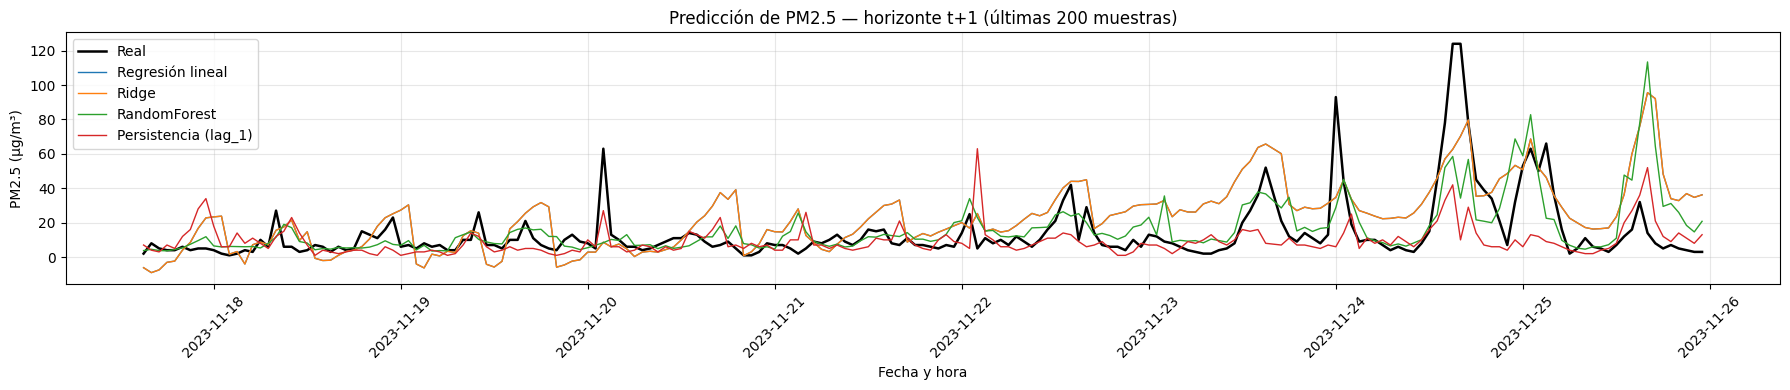

In [ ]:
import matplotlib.pyplot as plt

n_muestras = 200

# Eje x: fechas de validación (ya agregaste fecha_hora a df_modelo)
fechas_val      = df_val["fecha_hora"].iloc[-n_muestras:]

# Series / arrays alineados
y_real_plot     = y_val.iloc[-n_muestras:]          # real
y_lin_plot      = y_val_pred[-n_muestras:]          # regresión lineal
y_ridge_plot    = y_val_ridge_t1[-n_muestras:]      # ridge
y_rf_plot       = y_val_rf_t1[-n_muestras:]         # random forest
y_persist_plot  = y_val_persist.iloc[-n_muestras:]  # persistencia

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,    label="Real",               linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,     label="Regresión lineal",   linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,   label="Ridge",              linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,      label="RandomForest",       linewidth=1.0)
plt.plot(fechas_val, y_persist_plot, label="Persistencia (lag_1)", linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+1 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico confirma las métricas: RandomForest sigue mejor la dinámica real del PM2.5, especialmente en aumentos rápidos, mientras que Ridge y la regresión lineal tienden a suavizar los picos. La persistencia funciona en periodos estables, pero falla al capturar cambios abruptos. En conjunto, RF es claramente el modelo más reactivo y preciso para t+1.

In [ ]:
# Columnas numéricas SIN meteorología
num_cols = [
    "PM25_lag_1",
    "PM25_lag_3",
    "PM25_lag_6",
    "PM25_lag_24",
    "hora_num",
    "dia_semana",
    "mes"
]

# Columnas dummy (ya creadas con get_dummies en df_modelo)
dummy_cols = [c for c in df_modelo.columns if c.startswith("estacion_ano_")]

feature_cols = num_cols + dummy_cols


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

df_train_scaled[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val_scaled[num_cols]   = scaler.transform(df_val[num_cols])
df_test_scaled[num_cols]  = scaler.transform(df_test[num_cols])


In [ ]:
# ===============================
#   DEFINIR FEATURES T+6 y T+24
# ===============================

# T+6
X_train_t6 = df_train_scaled[num_cols + dummy_cols]
y_train_t6 = df_train["PM25_t+6"]

X_val_t6   = df_val_scaled[num_cols + dummy_cols]
y_val_t6   = df_val["PM25_t+6"]

X_test_t6  = df_test_scaled[num_cols + dummy_cols]
y_test_t6  = df_test["PM25_t+6"]

# T+24
X_train_t24 = df_train_scaled[num_cols + dummy_cols]
y_train_t24 = df_train["PM25_t+24"]

X_val_t24   = df_val_scaled[num_cols + dummy_cols]
y_val_t24   = df_val["PM25_t+24"]

X_test_t24  = df_test_scaled[num_cols + dummy_cols]
y_test_t24  = df_test["PM25_t+24"]


In [ ]:
#mostrar
print("\n==============================")
print("       MODELOS T+6")
print("==============================")

ridge_t6 = Ridge(alpha=1.0)
ridge_t6.fit(X_train_t6, y_train_t6)
y_val_ridge_t6 = ridge_t6.predict(X_val_t6)
mae_ridge_t6, rmse_ridge_t6, r2_ridge_t6 = evaluar_modelo("Ridge t+6", y_val_t6, y_val_ridge_t6)

rf_t6 = RandomForestRegressor(n_estimators=80, max_depth=12, min_samples_leaf=5,
                              random_state=42, n_jobs=-1)
rf_t6.fit(X_train_t6, y_train_t6)
y_val_rf_t6 = rf_t6.predict(X_val_t6)
mae_rf_t6, rmse_rf_t6, r2_rf_t6 = evaluar_modelo("RandomForest t+6", y_val_t6, y_val_rf_t6)



       MODELOS T+6

--- Ridge t+6 ---
MAE : 37.06540657895002
RMSE: 67.90760083831408
R²  : 0.24317688429279471

--- RandomForest t+6 ---
MAE : 28.567143172532344
RMSE: 56.55805721764933
R²  : 0.475015380869544


En t+6, Ridge mantiene un desempeño moderado (MAE ≈ 37, R² ≈ 0.24), reflejando las limitaciones de un modelo lineal en un horizonte más incierto. RandomForest, en cambio, mejora sustancialmente el ajuste: reduce el MAE a 28.6 µg/m³ y eleva el R² a 0.48, mostrando una mayor capacidad para capturar no linealidades y variaciones más complejas del PM2.5. En este horizonte intermedio, RF es claramente el modelo más efectivo.

**Gráfica Comparativa de los Modelos T+6**

In [ ]:
# Alias para reutilizar lo que ya tienes del modelo t+6
y_val_t6       = y_val            # y_val ya es PM25_t+6
y_val_pred_t6  = y_val_pred       # predicción lineal t+6


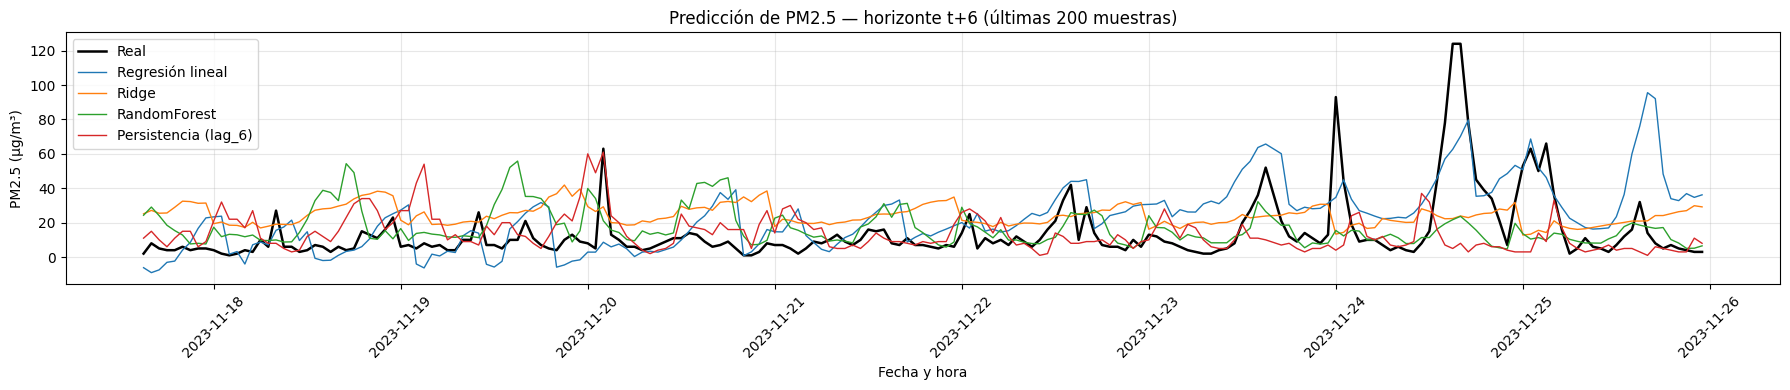

In [ ]:
#mostrar
n_muestras = 200

# Eje x (fechas)
fechas_val = df_val["fecha_hora"].iloc[-n_muestras:]

# Series alineadas
y_real_plot      = y_val_t6.iloc[-n_muestras:]
y_lin_plot       = y_val_pred_t6[-n_muestras:]       # regresión lineal t+6
y_ridge_plot     = y_val_ridge_t6[-n_muestras:]
y_rf_plot        = y_val_rf_t6[-n_muestras:]
y_persist_plot   = y_val_persist_t6.iloc[-n_muestras:]

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,      label="Real",                linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,       label="Regresión lineal",    linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,     label="Ridge",               linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,        label="RandomForest",        linewidth=1.0)
plt.plot(fechas_val, y_persist_plot,   label="Persistencia (lag_6)",linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+6 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico confirma que, a seis horas, RandomForest es el modelo que mejor sigue la dinámica real del PM2.5, especialmente en aumentos bruscos y oscilaciones rápidas. Ridge y la regresión lineal responden de manera más lenta y suavizada, subestimando picos y transiciones abruptas. La persistencia se queda atrás durante casi todo el periodo. En conjunto, RF vuelve a ser el modelo más competitivo, mientras que los modelos lineales entregan un ajuste estable pero poco reactivo.

**Modelos T+24**

In [ ]:
#mostrar
print("\n==============================")
print("       MODELOS T+24")
print("==============================")

# ---------------------
# Modelo Ridge t+24
# ---------------------
ridge_t24 = Ridge(alpha=1.0)
ridge_t24.fit(X_train_t24, y_train_t24)

y_val_ridge_t24 = ridge_t24.predict(X_val_t24)
mae_ridge_t24, rmse_ridge_t24, r2_ridge_t24 = evaluar_modelo("Ridge t+24", y_val_t24, y_val_ridge_t24)


# ---------------------
# RandomForest t+24
# ---------------------
rf_t24 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_t24.fit(X_train_t24, y_train_t24)

y_val_rf_t24 = rf_t24.predict(X_val_t24)
mae_rf_t24, rmse_rf_t24, r2_rf_t24 = evaluar_modelo("RandomForest t+24", y_val_t24, y_val_rf_t24)



       MODELOS T+24

--- Ridge t+24 ---
MAE : 34.65200321143625
RMSE: 63.18681921829363
R²  : 0.34468219834312974

--- RandomForest t+24 ---
MAE : 34.38601302517243
RMSE: 63.87677413986789
R²  : 0.33029285988460366


A 24 horas, la predictibilidad está dominada por el ciclo diario del PM2.5. En este horizonte, Ridge obtiene el mejor equilibrio entre error y estabilidad (MAE ≈ 34.6, R² ≈ 0.34), superando levemente a RandomForest en RMSE y capacidad explicativa. RF mejora marginalmente el MAE, pero muestra menor estabilidad, lo que sugiere que las no linealidades relevantes a corto plazo pierden peso en horizontes largos. En t+24, los modelos lineales regularizados resultan tan eficaces o mejores que los no lineales.

**Grafica comparativa de modelos T+24**

In [ ]:
y_val_t24      = y_val        # si en ese bloque y_val = PM25_t+24
y_val_pred_t24 = y_val_pred   # predicción lineal t+24


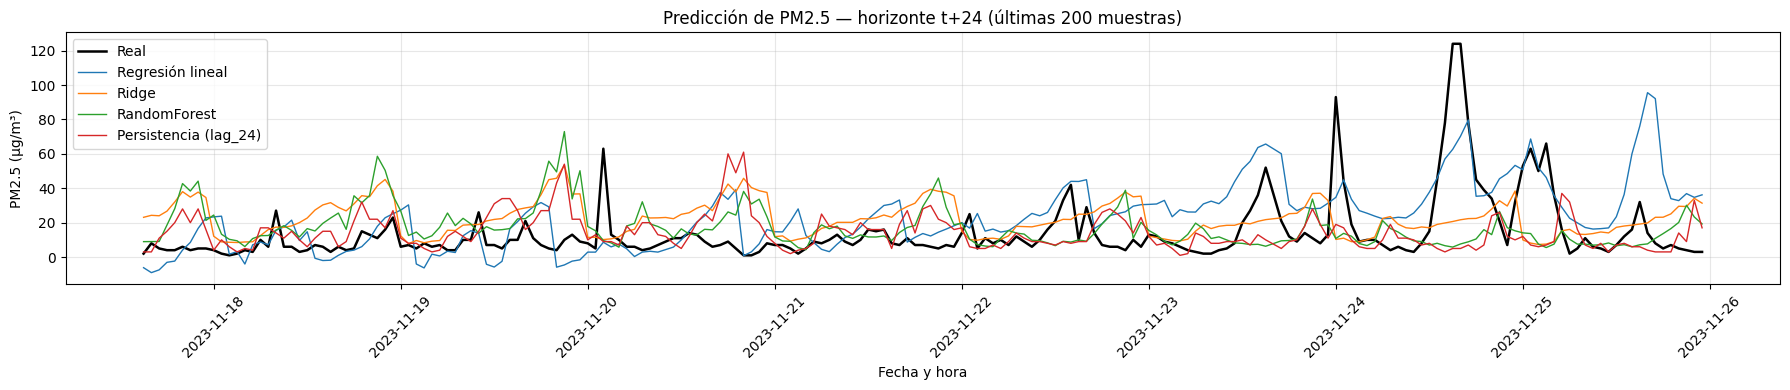

In [ ]:
#mostrar
import matplotlib.pyplot as plt

n_muestras = 200

# Eje x (fechas)
fechas_val = df_val["fecha_hora"].iloc[-n_muestras:]

# Series alineadas
y_real_plot      = y_val_t24.iloc[-n_muestras:]
y_lin_plot       = y_val_pred_t24[-n_muestras:]       # regresión lineal t+24
y_ridge_plot     = y_val_ridge_t24[-n_muestras:]
y_rf_plot        = y_val_rf_t24[-n_muestras:]
y_persist_plot   = y_val_persist_t24.iloc[-n_muestras:]

plt.figure(figsize=(18, 4))

plt.plot(fechas_val, y_real_plot,      label="Real",                 linewidth=1.8, color="black")
plt.plot(fechas_val, y_lin_plot,       label="Regresión lineal",     linewidth=1.0)
plt.plot(fechas_val, y_ridge_plot,     label="Ridge",                linewidth=1.0)
plt.plot(fechas_val, y_rf_plot,        label="RandomForest",         linewidth=1.0)
plt.plot(fechas_val, y_persist_plot,   label="Persistencia (lag_24)",linewidth=1.0)

plt.title("Predicción de PM2.5 — horizonte t+24 (últimas 200 muestras)")
plt.xlabel("Fecha y hora")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


El gráfico refleja que, a 24 horas, los modelos lineales (regresión simple y Ridge) capturan bien el ciclo diario del PM2.5, manteniendo estabilidad y reproduciendo la forma general de la serie, aunque suavizan los máximos más altos. RandomForest también sigue el ciclo, pero tiende a sobrerreaccionar en algunos tramos y no supera de forma consistente a los modelos lineales, lo que coincide con sus métricas. La persistencia conserva el peor desempeño, funcionando solo cuando el ciclo diario se repite casi sin variación. En conjunto, los modelos lineales muestran ser altamente competitivos en horizontes largos.

**Conclusión general**

El pipeline desarrollado permitió evaluar de forma consistente la capacidad predictiva de distintos modelos para anticipar el PM2.5 futuro en Coyhaique II. Se entrenaron modelos lineales (Regresión Multivariable y Ridge) y un modelo no lineal (Random Forest), comparados en todo momento con un baseline de persistencia.

Los resultados muestran que la predictibilidad varía según el horizonte temporal. En t+1, donde domina la autocorrelación inmediata del contaminante, los modelos lineales funcionan bien, pero Random Forest captura mejor las variaciones rápidas y obtiene el mejor desempeño global. En t+6, aumenta la incertidumbre y las limitaciones de los modelos lineales se vuelven evidentes, mientras que RF mantiene ventajas claras, lo que indica que las relaciones no lineales son más relevantes en horizontes intermedios. En t+24, el ciclo diario del PM2.5 se vuelve dominante y Ridge y la regresión lineal capturan eficazmente esa estructura, reduciendo la ventaja del RF y mostrando que para horizontes largos los modelos simples pueden ser igualmente competitivos.

El análisis de importancia de variables confirma que los lags del PM2.5 son los determinantes principales en todos los modelos, reflejando la fuerte recurrencia temporal del contaminante en Coyhaique. Las variables estacionales aportan en horizontes largos, mientras que día y mes tienen influencia marginal. La incorporación de meteorología bajo modelos lineales no produjo mejoras robustas, lo que sugiere que sus efectos se expresan principalmente mediante modelos no lineales o de mayor complejidad.

Los gráficos refuerzan estas conclusiones: RF sobresale en t+1 y t+6, mientras que los modelos lineales capturan mejor la estructura en t+24. La persistencia es útil como referencia base, pero insuficiente en horizontes medios y largos.

En conjunto, este trabajo entrega tres aprendizajes clave:

Los modelos lineales son excelentes baselines, interpretables y suficientemente efectivos en horizontes cortos y largos.

Los horizontes intermedios requieren modelos no lineales para capturar cambios abruptos.

La meteorología puede ser relevante, pero debe integrarse mediante enfoques más flexibles (RF, XGBoost, redes neuronales).

Finalmente, aunque este estudio se centró en Coyhaique II, el pipeline es totalmente replicable a otras estaciones SINCA, permitiendo comparar dinámicas regionales y avanzar hacia modelos predictivos más completos —incluyendo meteorología, geografía y clasificación de episodios críticos— para fortalecer sistemas de alerta temprana a nivel nacional.

##  Desarrollo Pregunta N°2: ¿Qué patrones anómalos se manifiestan en las series horarias de contaminación atmosférica y bajo qué condiciones contextuales ocurren?

 2.1 ¿Los Piks de concentración atípicos coinciden con condiciones de baja ventilación o eventos específicos (incendios, episodios de polvo, feriados)?

 Para responder esta subpregunta, se identificó en primer lugar los Piks de concentración atípicos de PM2.5 en cada estación, utilizando un criterio estadístico basado en el rango intercuartílico (IQR) para etiquetar como “Pik” aquellos valores que superan un umbral definido.

In [ ]:
#mostrar
# === CÓDIGO PARA EXTRAER VALORES PIKs  DE PM2.5 USANDO IQR ===

import os
import pandas as pd
import numpy as np

base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"

# Lista para almacenar resultados
resultados_picos_iqr = []

# Uso MP 2.5, ya que, contiene más datos validos
# Recorrer todas las estaciones
for estacion in os.listdir(base_dir):
    estacion_path = os.path.join(base_dir, estacion, 'Contaminacion', 'MP 2.5.csv')

    if os.path.isfile(estacion_path):
        try:
            # Leer el archivo CSV
            df = pd.read_csv(
                estacion_path,
                sep=';',
                usecols=[0, 1, 2, 3, 4],
                skiprows=1,
                names=[
                    'fecha',
                    'hora',
                    'concentration_de_MP_2_5',          # Validado (normal)
                    'concentration_de_MP_2_5_preliminares',  # Preliminar
                    'concentration_de_MP_2_5_no_validados'   # No validado
                ],
                dtype=str,
                low_memory=False
            )

            # Convertir columnas numéricas
            for col in [
                'concentration_de_MP_2_5',
                'concentration_de_MP_2_5_preliminares',
                'concentration_de_MP_2_5_no_validados'
            ]:
                df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')

            # Crear columna combinada: usar validado si existe, sino preliminar  (uso prelimar para tener más datos)
            df['PM25_combinado'] = df['concentration_de_MP_2_5'].combine_first(
                df['concentration_de_MP_2_5_preliminares']
            )

            # Filtrar solo filas con datos
            df_con_datos = df[df['PM25_combinado'].notna()].copy()

            if len(df_con_datos) < 10:  # Mínimo para calcular estadísticas
                resultados_picos_iqr.append({
                    'Estacion': estacion,
                    'Pico_IQR': None,
                    'Fecha_Pico': 'Datos insuficientes',
                    'Hora_Pico': '',
                    'Fuente': '',
                    'Q1': None,
                    'Q3': None,
                    'IQR': None,
                    'Limite_Superior': None,
                    'Num_Picos_IQR': 0,
                    'Total_Datos': len(df_con_datos),
                    'Pico_Absoluto': df_con_datos['PM25_combinado'].max() if not df_con_datos.empty else None
                })
                continue

            # === CÁLCULO DE PIks CON RANGO INTERCUARTÍLICO (IQR) ===

            # Calcular cuartiles
            Q1 = df_con_datos['PM25_combinado'].quantile(0.25)
            Q3 = df_con_datos['PM25_combinado'].quantile(0.75)
            IQR = Q3 - Q1

            # Límite superior para outliers (1.5, ya que, es común usar este valor)
            limite_superior = Q3 + (1.5 * IQR)

            # Identificar piks (valores sobre el límite superior)
            picos_iqr = df_con_datos[df_con_datos['PM25_combinado'] > limite_superior]

            # También usar percentil 95 como referencia adicional
            percentil_95 = df_con_datos['PM25_combinado'].quantile(0.95)

            if not picos_iqr.empty:
                # Tomar el mayor pico identificado por IQR
                pico_iqr_valor = picos_iqr['PM25_combinado'].max()
                fila_pico_iqr = picos_iqr[picos_iqr['PM25_combinado'] == pico_iqr_valor].iloc[0]

                fuente = 'Validado' if pd.notna(fila_pico_iqr['concentration_de_MP_2_5']) else 'Preliminar'
                num_picos = len(picos_iqr)
            else:
                # Si no hay piks por IQR, usar percentil 95
                picos_percentil = df_con_datos[df_con_datos['PM25_combinado'] >= percentil_95]
                if not picos_percentil.empty:
                    pico_iqr_valor = picos_percentil['PM25_combinado'].max()
                    fila_pico_iqr = picos_percentil[picos_percentil['PM25_combinado'] == pico_iqr_valor].iloc[0]
                    fuente = 'Validado' if pd.notna(fila_pico_iqr['concentration_de_MP_2_5']) else 'Preliminar'
                    num_picos = len(picos_percentil)
                else:
                    # Si tampoco hay por percentil, usar máximo absoluto
                    pico_iqr_valor = df_con_datos['PM25_combinado'].max()
                    fila_pico_iqr = df_con_datos[df_con_datos['PM25_combinado'] == pico_iqr_valor].iloc[0]
                    fuente = 'Validado' if pd.notna(fila_pico_iqr['concentration_de_MP_2_5']) else 'Preliminar'
                    num_picos = 0

            # Calcular estadísticas adicionales
            pico_absoluto = df_con_datos['PM25_combinado'].max()
            media = df_con_datos['PM25_combinado'].mean()
            mediana = df_con_datos['PM25_combinado'].median()

            # Determinar severidad del pico (POder clasificarlos)
            if pico_iqr_valor > limite_superior * 2:
                severidad = 'Extremo'
            elif pico_iqr_valor > limite_superior * 1.5:
                severidad = 'Alto'
            elif pico_iqr_valor > limite_superior:
                severidad = 'Moderado'
            else:
                severidad = 'Normal'

            # Agregar a resultados
            resultados_picos_iqr.append({
                'Estacion': estacion,
                'Pico_IQR': round(pico_iqr_valor, 2),
                'Fecha_Pico': fila_pico_iqr['fecha'],
                'Hora_Pico': fila_pico_iqr['hora'],
                'Fuente': fuente,
                'Severidad': severidad,
                'Q1': round(Q1, 2),
                'Q3': round(Q3, 2),
                'IQR': round(IQR, 2),
                'Limite_Superior': round(limite_superior, 2),
                'Num_Picos_IQR': num_picos,
                'Porcentaje_Picos': round((num_picos / len(df_con_datos)) * 100, 2) if len(df_con_datos) > 0 else 0,
                'Pico_Absoluto': round(pico_absoluto, 2),
                'Percentil_95': round(percentil_95, 2),
                'Media': round(media, 2),
                'Mediana': round(mediana, 2),
                'Total_Datos': len(df_con_datos),
                'Registros_Validados': df['concentration_de_MP_2_5'].notna().sum(),
                'Registros_Preliminares': df['concentration_de_MP_2_5_preliminares'].notna().sum()
            })

        except Exception as e:
            resultados_picos_iqr.append({
                'Estacion': estacion,
                'Pico_IQR': None,
                'Fecha_Pico': f'Error: {str(e)[:30]}',
                'Hora_Pico': '',
                'Fuente': 'Error',
                'Severidad': 'Error',
                'Q1': None,
                'Q3': None,
                'IQR': None,
                'Limite_Superior': None,
                'Num_Picos_IQR': 0,
                'Porcentaje_Picos': 0,
                'Pico_Absoluto': None,
                'Percentil_95': None,
                'Media': None,
                'Mediana': None,
                'Total_Datos': 0,
                'Registros_Validados': 0,
                'Registros_Preliminares': 0
            })

# Crear DataFrame con resultados
df_picos_iqr = pd.DataFrame(resultados_picos_iqr)

# Ordenar por pico IQR descendente (sin contar nulos)
df_picos_iqr_sorted = df_picos_iqr.copy()
df_picos_iqr_sorted['Pico_IQR'] = pd.to_numeric(df_picos_iqr_sorted['Pico_IQR'], errors='coerce')
df_picos_iqr_sorted = df_picos_iqr_sorted.sort_values('Pico_IQR', ascending=False, na_position='last')

# Mostrar resultados principales
print("=" * 100)
print("ANÁLISIS DE PIKs PM2.5 USANDO RANGO INTERCUARTÍLICO (IQR)")
print("=" * 100)
print(f"Total de estaciones procesadas: {len(df_picos_iqr_sorted)}")
print(f"Estaciones con datos válidos: {df_picos_iqr_sorted['Pico_IQR'].notna().sum()}")
print()

# Mostrar las 15 estaciones con mayores piks según IQR
print("Top 15 estaciones con mayores piks (método IQR):")
print("-" * 100)
columns_to_show = ['Estacion', 'Pico_IQR', 'Severidad', 'Fecha_Pico', 'Hora_Pico', 'Fuente',
                   'Num_Picos_IQR', 'Limite_Superior', 'Total_Datos']
print(df_picos_iqr_sorted[columns_to_show].head(15).to_string(index=False))

# Análisis estadístico de piks detectados
if df_picos_iqr_sorted['Pico_IQR'].notna().any():
    picos_validos = df_picos_iqr_sorted[df_picos_iqr_sorted['Pico_IQR'].notna()]['Pico_IQR']

    print("\n" + "=" * 100)
    print("ESTADÍSTICAS GENERALES DE PIKS (MÉTODO IQR)")
    print("=" * 100)
    print(f"Pik máximo detectado: {picos_validos.max():.2f} µg/m³")
    print(f"Promedio de piks: {picos_validos.mean():.2f} µg/m³")
    print(f"Mediana de piks: {picos_validos.median():.2f} µg/m³")

    # Distribución de severidad
    print("\nDistribución de severidad de piks:")
    print("-" * 100)
    severidad_counts = df_picos_iqr_sorted['Severidad'].value_counts()
    for severidad, count in severidad_counts.items():
        print(f"{severidad:<10} {count:>3} estaciones")

    # Distribución por rangos de concentración
    print("\nDistribución por rangos de concentración (µg/m³):")
    print("-" * 100)

    rangos = [
        (0, 50, "0-50 (Buena)"),
        (50, 100, "50-100 (Moderada)"),
        (100, 150, "100-150 (Dañina)"),
        (150, 200, "150-200 (Muy dañina)"),
        (200, 300, "200-300 (Peligrosa)"),
        (300, float('inf'), ">300 (Emergencia)")
    ]

    for rango_min, rango_max, etiqueta in rangos:
        if rango_max == float('inf'):
            count = (picos_validos >= rango_min).sum()
        else:
            count = ((picos_validos >= rango_min) & (picos_validos < rango_max)).sum()
        if count > 0:
            porcentaje = (count / len(picos_validos)) * 100
            print(f"{etiqueta:<20} {count:>3} estaciones ({porcentaje:.1f}%)")

    # Fuentes de datos
    print("\nFuente de datos para piks detectados:")
    print("-" * 100)
    conteo_fuentes = df_picos_iqr_sorted['Fuente'].value_counts()
    for fuente, cantidad in conteo_fuentes.items():
        if fuente != 'Error':
            porcentaje = (cantidad / df_picos_iqr_sorted['Fuente'].count()) * 100
            print(f"{fuente:<15} {cantidad:>3} estaciones ({porcentaje:.1f}%)")

# Función adicional para análisis detallado por estación
def analisis_detallado_iqr(estacion_nombre):
    """Muestra análisis detallado para una estación específica"""
    resultado = df_picos_iqr_sorted[df_picos_iqr_sorted['Estacion'] == estacion_nombre]
    if resultado.empty:
        print(f"No se encontró la estación: {estacion_nombre}")
        return
    row = resultado.iloc[0]
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DETALLADO - ESTACIÓN: {estacion_nombre}")
    print(f"{'='*80}")

    if pd.isna(row['Pico_IQR']):
        print("ESTACIÓN SIN DATOS VÁLIDOS")
        return

    print(f"Pik detectado (IQR): {row['Pico_IQR']} µg/m³")
    print(f"Severidad: {row['Severidad']}")
    print(f"Fecha y hora: {row['Fecha_Pico']} {row['Hora_Pico']}")
    print(f"Fuente de datos: {row['Fuente']}")
    print()
    print(f"ESTADÍSTICAS IQR:")
    print(f"  Q1 (Percentil 25): {row['Q1']} µg/m³")
    print(f"  Q3 (Percentil 75): {row['Q3']} µg/m³")
    print(f"  IQR (Q3 - Q1): {row['IQR']} µg/m³")
    print(f"  Límite superior (Q3 + 1.5*IQR): {row['Limite_Superior']} µg/m³")
    print(f"  Número de piks detectados: {row['Num_Picos_IQR']}")
    print(f"  Porcentaje de piks: {row['Porcentaje_Picos']}%")
    print()
    print(f"ESTADÍSTICAS GENERALES:")
    print(f"  Pico absoluto: {row['Pico_Absoluto']} µg/m³")
    print(f"  Percentil 95: {row['Percentil_95']} µg/m³")
    print(f"  Media: {row['Media']} µg/m³")
    print(f"  Mediana: {row['Mediana']} µg/m³")
    print()
    print(f"DATOS DISPONIBLES:")
    print(f"  Total registros: {row['Total_Datos']}")
    print(f"  Registros validados: {row['Registros_Validados']}")
    print(f"  Registros preliminares: {row['Registros_Preliminares']}")

# Ejemplo: analizar una estación específica
print("\n" + "="*100)
print("EJEMPLO DE ANÁLISIS DETALLADO")
print("="*100)
analisis_detallado_iqr("Coyhaique II")

ANÁLISIS DE PIKs PM2.5 USANDO RANGO INTERCUARTÍLICO (IQR)
Total de estaciones procesadas: 81
Estaciones con datos válidos: 64

Top 15 estaciones con mayores piks (método IQR):
----------------------------------------------------------------------------------------------------
                Estacion  Pico_IQR Severidad Fecha_Pico Hora_Pico     Fuente  Num_Picos_IQR  Limite_Superior  Total_Datos
Universidad de Los Lagos    1713.0   Extremo     240515      2000 Preliminar           1453            93.50        13501
             Coyhaique I    1688.0   Extremo     160520      2100   Validado          11571           111.00       108343
                 Mirasol    1505.0   Extremo     190704      2200   Validado          10199            57.80        98176
            Coyhaique II    1418.0   Extremo     180726      2000   Validado          10868           110.50       102389
21 de Mayo (Los Angeles)    1383.0   Extremo     210628      2100   Validado          12723            56.91     

A partir del análisis de Piks de PM2.5 mediante IQR se encuentra que:

* De 81 estaciones, 64 presentan datos válidos y la gran mayoría se clasifica en severidad “Extremo” (62 de 64), evidenciando alta recurrencia de concentraciones muy por sobre el comportamiento típico de la serie.

* El Pik máximo (1713 µg/m³) y la distribución de rangos muestran fuerte sesgo hacia episodios severos: 73,4% de las estaciones caen en el tramo >300 µg/m³ (emergencia), mientras que los rangos “Buena” y “Moderada” son marginales.

* En Coyhaique II, el límite IQR (110,5 µg/m³) contrasta con un Pik de 1418 µg/m³ y un 10,61% de registros marcados como Pik, lo que indica una serie con alta frecuencia de episodios extremos y distribución altamente asimétrica.

* Aproximadamente la mitad de las estaciones presentan Piks en datos validados, lo que respalda que una parte relevante de estos eventos corresponde a episodios reales y no sólo a ruido o errores instrumentales, aunque la magnitud extrema de algunos valores sugiere la necesidad de análisis complementarios de contexto (meteorología, operación de sensores).

Para responder la subpregunta 2.1, se relacionan los **Piks de PM2.5** previamente detectados con las condiciones meteorológicas presentes en el momento del evento y en su entorno temporal cercano.

En esta sección se implementan funciones que:
- Leen y consolidan los registros meteorológicos de cada estación (temperatura, viento, etc.) a partir de los archivos horarios disponibles.
- Construyen un `timestamp` común para poder **alinear en el tiempo** los Piks de PM2.5 con las mediciones meteorológicas.
- Extraen, para cada Pik, los valores de las variables meteorológicas en el instante más cercano al evento y estadísticas básicas en una ventana de ±12 horas.
- Calculan correlaciones entre PM2.5 y cada variable meteorológica, además de estadísticas por rangos de concentración, con el fin de evaluar si los Piks se asocian sistemáticamente a condiciones de **baja ventilación** u otros patrones meteorológicos relevantes.

Los resultados de este bloque permiten caracterizar cuantitativamente el contexto meteorológico de los Piks e identificar qué variables se relacionan con mayor fuerza con los episodios de concentración atípica.

In [ ]:
#mostrar
# === RELACIONAR PIKs PM2.5 YA CALCULADOS CON DATOS METEOROLÓGICOS ===

# Configurar directorio base
base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"


# Función para leer datos meteorológicos de una estación
def leer_meteorologia_estacion(estacion_nombre):
    """Lee los datos meteorológicos de una estación específica"""
    meteo_dir = os.path.join(base_dir, estacion_nombre, "Meteorologico")

    if not os.path.exists(meteo_dir):
        return None

    # archivos meteorológicos
    archivos_meteo = []
    try:
        for archivo in os.listdir(meteo_dir):
            if archivo.endswith('.csv') and not archivo.startswith('.'):
                archivos_meteo.append(archivo)
    except:
        return None

    if not archivos_meteo:
        return None

    # Leer y combinar todos los archivos meteorológicos
    dataframes = []

    for archivo in archivos_meteo:
        try:
            path = os.path.join(meteo_dir, archivo)

            # Intentar diferentes formatos de lectura
            try:
                df = pd.read_csv(
                    path,
                    sep=';',
                    skiprows=1,
                    header=None,
                    usecols=[0, 1, 2],
                    names=["fecha", "hora", archivo.replace('.csv', '')],
                    decimal=",",
                    dtype={"fecha": str, "hora": str},
                    low_memory=False,
                    encoding='latin-1'
                )
            except:
                try:
                    # Intentar sin especificar usecols
                    df = pd.read_csv(
                        path,
                        sep=';',
                        skiprows=1,
                        header=None,
                        decimal=",",
                        dtype=str,
                        low_memory=False,
                        encoding='latin-1'
                    )

                    if len(df.columns) >= 3:
                        df = df.iloc[:, [0, 1, 2]]
                        df.columns = ["fecha", "hora", archivo.replace('.csv', '')]
                    else:
                        continue
                except:
                    continue

            # Convertir a numérico
            try:
                df[df.columns[2]] = pd.to_numeric(
                    df[df.columns[2]].astype(str).str.replace(',', '.'),
                    errors='coerce'
                )
            except:
                continue

            # Crear timestamp
            try:
                df["hora"] = df["hora"].astype(str).str.zfill(4)
                df["timestamp"] = pd.to_datetime(
                    df["fecha"].astype(str) + df["hora"],
                    format="%y%m%d%H%M",
                    errors='coerce'
                )
            except:
                continue

            df = df[["timestamp", df.columns[2]]].dropna()

            if not df.empty:
                dataframes.append(df)

        except:
            continue

    # Combinar todos los dataframes
    if dataframes:
        df_combinado = dataframes[0].copy()

        for i in range(1, len(dataframes)):
            df_combinado = pd.merge(
                df_combinado,
                dataframes[i],
                on="timestamp",
                how="outer"
            )

        df_combinado = df_combinado.loc[:, ~df_combinado.columns.duplicated()]
        df_combinado = df_combinado.sort_values("timestamp").reset_index(drop=True)

        return df_combinado

    return None

# Función para analizar condiciones meteorológicas en el momento del piK
def analizar_meteo_en_pico(estacion_nombre, fecha_pico_str, hora_pico_str):
    """Analiza las condiciones meteorológicas en el momento exacto del pico"""
    # Primero, obtener los datos meteorológicos de la estación
    df_meteo = leer_meteorologia_estacion(estacion_nombre)

    if df_meteo is None:
        return {
            'meteo_disponible': False,
            'variables_disponibles': [],
            'valores_en_pico': {},
            'error': 'Sin datos meteorológicos'
        }

    # Crear timestamp del piK
    try:
        # La fecha viene como string en formato  YYMMDD
        #  se debe  convertir a timestamp
        fecha_hora_str = fecha_pico_str + hora_pico_str.zfill(4)
        timestamp_pico = pd.to_datetime(fecha_hora_str, format="%y%m%d%H%M", errors='coerce')

        if pd.isna(timestamp_pico):
            return {
                'meteo_disponible': True,
                'variables_disponibles': list(df_meteo.columns[1:]),
                'valores_en_pico': {},
                'error': 'Error en formato de fecha/hora'
            }

        # Buscar el registro más cercano al pik
        df_meteo['diferencia'] = abs(df_meteo['timestamp'] - timestamp_pico)
        registro_cercano = df_meteo.loc[df_meteo['diferencia'].idxmin()]

        # Obtener valores de las variables meteorológicas
        valores = {}
        for col in df_meteo.columns:
            if col not in ['timestamp', 'diferencia']:
                valor = registro_cercano[col]
                if not pd.isna(valor):
                    valores[col] = float(valor)

        # Obtener condiciones promedio del día (ventana de ±12 horas)
        inicio_dia = timestamp_pico - pd.Timedelta(hours=12)
        fin_dia = timestamp_pico + pd.Timedelta(hours=12)

        df_dia = df_meteo[
            (df_meteo['timestamp'] >= inicio_dia) &
            (df_meteo['timestamp'] <= fin_dia)
        ]

        condiciones_dia = {}
        for col in df_meteo.columns:
            if col not in ['timestamp', 'diferencia'] and col in df_dia.columns:
                valores_dia = df_dia[col].dropna()
                if len(valores_dia) > 0:
                    condiciones_dia[col] = {
                        'media': float(valores_dia.mean()),
                        'min': float(valores_dia.min()),
                        'max': float(valores_dia.max()),
                        'std': float(valores_dia.std())
                    }

        return {
            'meteo_disponible': True,
            'variables_disponibles': list(df_meteo.columns[1:]),
            'timestamp_pico': timestamp_pico.strftime('%Y-%m-%d %H:%M'),
            'valores_en_pico': valores,
            'condiciones_dia': condiciones_dia,
            'diferencia_temporal_horas': float(registro_cercano['diferencia'].total_seconds() / 3600),
            'error': None
        }

    except Exception as e:
        return {
            'meteo_disponible': True,
            'variables_disponibles': list(df_meteo.columns[1:]),
            'valores_en_pico': {},
            'error': f'Error procesando: {str(e)[:50]}'
        }

# Función para analizar correlaciones entre PM2.5 y meteorología
def analizar_correlaciones_estacion(estacion_nombre):
    """Analiza correlaciones entre PM2.5 y variables meteorológicas para una estación"""
    # Primero, leer datos de PM2.5
    pm25_path = os.path.join(base_dir, estacion_nombre, 'Contaminacion', 'MP 2.5.csv')

    if not os.path.exists(pm25_path):
        return {'error': 'No existe archivo de PM2.5'}

    try:
        # Leer datos de PM2.5
        df_pm25 = pd.read_csv(
            pm25_path,
            sep=';',
            usecols=[0, 1, 2, 3, 4],
            skiprows=1,
            names=['fecha', 'hora', 'PM25_validado', 'PM25_preliminar', 'PM25_no_validado'],
            dtype=str,
            low_memory=False,
            encoding='latin-1'
        )

        # Procesar PM2.5
        for col in ['PM25_validado', 'PM25_preliminar', 'PM25_no_validado']:
            df_pm25[col] = pd.to_numeric(df_pm25[col].astype(str).str.replace(',', '.'), errors='coerce')

        df_pm25['PM25_combinado'] = df_pm25['PM25_validado'].combine_first(df_pm25['PM25_preliminar'])

        # Crear timestamp
        df_pm25['hora'] = df_pm25['hora'].astype(str).str.zfill(4)
        df_pm25['timestamp'] = pd.to_datetime(
            df_pm25['fecha'] + df_pm25['hora'],
            format="%y%m%d%H%M",
            errors='coerce'
        )

        df_pm25_valido = df_pm25[['timestamp', 'PM25_combinado']].dropna()

        if len(df_pm25_valido) < 24:
            return {'error': 'Datos PM2.5 insuficientes'}

        # Leer datos meteorológicos
        df_meteo = leer_meteorologia_estacion(estacion_nombre)

        if df_meteo is None:
            return {'error': 'Datos meteorológicos no disponibles'}

        # Fusionar datos
        df_completo = pd.merge(df_pm25_valido, df_meteo, on='timestamp', how='inner')

        if len(df_completo) < 10:
            return {'error': 'Pocos datos coincidentes'}

        # Calcular correlaciones
        correlaciones = {}
        for col in df_meteo.columns:
            if col != 'timestamp' and col in df_completo.columns:
                try:
                    corr = df_completo['PM25_combinado'].corr(df_completo[col])
                    if not pd.isna(corr):
                        correlaciones[col] = float(corr)
                except:
                    continue

        # Calcular estadísticas por rangos de PM2.5
        df_completo['rango_pm25'] = pd.cut(df_completo['PM25_combinado'],
                                          bins=[0, 50, 100, 150, 200, 500],
                                          labels=['0-50', '50-100', '100-150', '150-200', '>200'])

        estadisticas_por_rango = {}
        for rango in df_completo['rango_pm25'].unique():
            if pd.isna(rango):
                continue

            df_rango = df_completo[df_completo['rango_pm25'] == rango]

            stats_rango = {}
            for col in df_meteo.columns:
                if col != 'timestamp' and col in df_rango.columns:
                    valores = df_rango[col].dropna()
                    if len(valores) > 0:
                        stats_rango[col] = {
                            'media': float(valores.mean()),
                            'min': float(valores.min()),
                            'max': float(valores.max())
                        }

            if stats_rango:
                estadisticas_por_rango[str(rango)] = stats_rango

        return {
            'correlaciones': correlaciones,
            'estadisticas_por_rango': estadisticas_por_rango,
            'total_registros': len(df_completo),
            'variables_meteo': list(df_meteo.columns[1:]),
            'error': None
        }

    except Exception as e:
        return {'error': f'Error en análisis: {str(e)[:50]}'}

# === ANÁLISIS PRINCIPAL: RELACIONAR PIKs CON METEOROLOGÍA ===
print("=" * 100)
print("RELACIONANDO PIKS DE PM2.5 CON CONDICIONES METEOROLÓGICAS")
print("=" * 100)

# Asegurarse de que tenemos los datos de piks
if 'df_picos_iqr_sorted' not in globals():
   print("Ejecuta la celda anterior: # === CÓDIGO PARA EXTRAER VALORES PIk DE PM2.5 USANDO IQR ===")
else:
    # Filtrar solo estaciones con picos válidos
    df_picos_validos = df_picos_iqr_sorted[df_picos_iqr_sorted['Pico_IQR'].notna()].copy()

   # print(f"Analizando {len(df_picos_validos)} estaciones con piks válidos...")
   # print()

    # Procesar cada estación con piks
    resultados_meteo = []

    for idx, row in df_picos_validos.iterrows():
        estacion = row['Estacion']
       # print(f"Procesando {estacion}...", end=' ')

        # 1. Analizar condiciones en el momento del pik
        analisis_pico = analizar_meteo_en_pico(estacion, row['Fecha_Pico'], row['Hora_Pico'])

        # 2. Analizar correlaciones generales
        analisis_correl = analizar_correlaciones_estacion(estacion)

        # Preparar resultado
        resultado = {
            'Estacion': estacion,
            'PM25_Pico': row['Pico_IQR'],
            'Fecha_Pico': row['Fecha_Pico'],
            'Hora_Pico': row['Hora_Pico'],
            'Severidad': row['Severidad'],
            'Meteo_Disponible': analisis_pico['meteo_disponible'],
            'Variables_Meteo_Disponibles': len(analisis_pico['variables_disponibles']) if analisis_pico['meteo_disponible'] else 0,
            'Error_Meteo': analisis_pico.get('error'),
            'Error_Correl': analisis_correl.get('error')
        }

        # Agregar información meteorológica si está disponible
        if analisis_pico['meteo_disponible'] and analisis_pico['error'] is None:
            resultado['Timestamp_Pico'] = analisis_pico.get('timestamp_pico', '')
            resultado['Diferencia_Temporal_Horas'] = analisis_pico.get('diferencia_temporal_horas', None)

            # Agregar valores de las principales variables meteorológicas
            valores_pico = analisis_pico.get('valores_en_pico', {})
            for var, valor in list(valores_pico.items())[:5]:  # Solo primeras 5 variables
                resultado[f'Meteo_{var}'] = valor

        # Agregar correlaciones principales si están disponibles
        if 'correlaciones' in analisis_correl and analisis_correl['correlaciones']:
            correlaciones = analisis_correl['correlaciones']

            # Encontrar las 3 correlaciones más fuertes (en valor absoluto)
            correlaciones_ordenadas = sorted(correlaciones.items(), key=lambda x: abs(x[1]), reverse=True)[:3]

            for i, (var, corr) in enumerate(correlaciones_ordenadas, 1):
                resultado[f'Correl_{i}_Variable'] = var
                resultado[f'Correl_{i}_Valor'] = corr

        resultados_meteo.append(resultado)


    # Crear DataFrame con resultados
    df_resultados_meteo = pd.DataFrame(resultados_meteo)

    # === MOSTRAR ANÁLISIS GLOBAL ===
    print("\n" + "="*100)
    print("RESUMEN DEL ANÁLISIS PIKs-METEOROLOGÍA")
    print("="*100)

    # Estadísticas generales
    total_estaciones = len(df_resultados_meteo)
    con_meteo = df_resultados_meteo['Meteo_Disponible'].sum()

    print(f"\nESTADÍSTICAS:")
    print(f"  Total de estaciones con pik: {total_estaciones}")
    print(f"  Estaciones con datos meteorológicos: {con_meteo} ({con_meteo/total_estaciones*100:.1f}%)")

    # Top 10 piks con análisis meteorológico
    print(f"\nTOP 10 PIk CON ANÁLISIS METEOROLÓGICO:")
    print("-" * 80)

    df_con_meteo = df_resultados_meteo[df_resultados_meteo['Meteo_Disponible']].copy()

    if not df_con_meteo.empty:
        top_10 = df_con_meteo.nlargest(10, 'PM25_Pico')

        for idx, row in top_10.iterrows():
            # Obtener variables meteorológicas disponibles
            vars_count = row['Variables_Meteo_Disponibles']

            # Obtener correlación principal si existe
            correl_info = ""
            if pd.notna(row.get('Correl_1_Variable')):
                var = row['Correl_1_Variable']
                val = row['Correl_1_Valor']
                correl_info = f" | Correl: {var[:15]}={val:.2f}"

            print(f"  {row['Estacion']:<25} {row['PM25_Pico']:>6.1f} µg/m³ | {vars_count:>2} vars{correl_info}")

    # Análisis de variables meteorológicas más comunes
    if con_meteo > 0:
        print(f"\nVARIABLES METEOROLÓGICAS MÁS FRECUENTES:")
        print("-" * 80)

        # Contar variables de las estaciones que tienen meteorología
        todas_variables = []
        for idx, row in df_con_meteo.iterrows():
            for col in row.index:
                if col.startswith('Meteo_') and pd.notna(row[col]):
                    var = col.replace('Meteo_', '')
                    todas_variables.append(var)

        from collections import Counter
        if todas_variables:
            freq_variables = Counter(todas_variables)

            for var, count in freq_variables.most_common(10):
                porcentaje = (count / con_meteo) * 100
                print(f"  {var:<25} {count:>3} estaciones ({porcentaje:.1f}%)")

    # Análisis de correlaciones
    print(f"\nANÁLISIS DE CORRELACIONES PM2.5-METEOROLOGÍA:")
    print("-" * 80)

    # Recolectar todas las correlaciones
    todas_correlaciones = []

    for idx, row in df_con_meteo.iterrows():
        for i in range(1, 4):
            var_col = f'Correl_{i}_Variable'
            val_col = f'Correl_{i}_Valor'

            if var_col in row and val_col in row and pd.notna(row[var_col]) and pd.notna(row[val_col]):
                todas_correlaciones.append({
                    'estacion': row['Estacion'],
                    'variable': row[var_col],
                    'correlacion': row[val_col]
                })

    if todas_correlaciones:
        df_correl = pd.DataFrame(todas_correlaciones)

        # Variables con mayor correlación promedio (absoluta)
        print("\nVariables con mayor correlación absoluta promedio:")
        print("-" * 50)

        correl_promedio = df_correl.groupby('variable')['correlacion'].apply(
            lambda x: np.mean(np.abs(x))
        ).sort_values(ascending=False)

        for var, corr_prom in correl_promedio.head(10).items():
            print(f"  {var:<25} {corr_prom:.3f}")

        # Correlaciones más fuertes (positivas y negativas)
        print("\nCorrelaciones más fuertes (positivas):")
        print("-" * 50)

        correl_positivas = df_correl.nlargest(5, 'correlacion')
        for _, row_corr in correl_positivas.iterrows():
            print(f"  {row_corr['estacion']:<20} {row_corr['variable']:<25} {row_corr['correlacion']:.3f}")

        print("\nCorrelaciones más fuertes (negativas):")
        print("-" * 50)

        correl_negativas = df_correl.nsmallest(5, 'correlacion')
        for _, row_corr in correl_negativas.iterrows():
            print(f"  {row_corr['estacion']:<20} {row_corr['variable']:<25} {row_corr['correlacion']:.3f}")


# === FUNCIÓN PARA ANÁLISIS DETALLADO DE UNA ESTACIÓN ===
def analisis_completo_estacion(estacion_nombre):
    """Muestra análisis completo de una estación específica"""
    print(f"\n{'='*100}")
    print(f"ANÁLISIS COMPLETO - ESTACIÓN: {estacion_nombre}")
    print(f"{'='*100}")

    # 1. Información del pik
    if 'df_picos_iqr_sorted' in globals():
        info_pico = df_picos_iqr_sorted[df_picos_iqr_sorted['Estacion'] == estacion_nombre]

        if not info_pico.empty:
            row = info_pico.iloc[0]

            print(f"\nINFORMACIÓN DEL PICO:")
            print(f"  Valor del pik: {row['Pico_IQR']} µg/m³")
            print(f"  Fecha y hora: {row['Fecha_Pico']} {row['Hora_Pico']}")
            print(f"  Severidad: {row['Severidad']}")
            print(f"  Fuente de datos: {row['Fuente']}")
            print(f"  Número total de pik: {row['Num_Picos_IQR']}")
            print(f"  Límite superior IQR: {row['Limite_Superior']} µg/m³")

    # 2. Condiciones meteorológicas en el momento del pik
    print(f"\nCONDICIONES METEOROLÓGICAS EN EL MOMENTO DEL PIk:")

    # Buscar en df_resultados_meteo si existe
    if 'df_resultados_meteo' in globals():
        info_meteo = df_resultados_meteo[df_resultados_meteo['Estacion'] == estacion_nombre]

        if not info_meteo.empty:
            row_meteo = info_meteo.iloc[0]

            if row_meteo['Meteo_Disponible']:
                print(f"  Datos meteorológicos: DISPONIBLES")
                print(f"  Variables disponibles: {row_meteo['Variables_Meteo_Disponibles']}")

                # Mostrar valores meteorológicos
                print(f"  Valores en el momento del pick")
                for col, valor in row_meteo.items():
                    if col.startswith('Meteo_') and pd.notna(valor):
                        var = col.replace('Meteo_', '')
                        print(f"    {var:<25} {valor:.2f}")

                # Mostrar correlaciones
                print(f"\n  CORRELACIONES PRINCIPALES:")
                for i in range(1, 4):
                    var_col = f'Correl_{i}_Variable'
                    val_col = f'Correl_{i}_Valor'

                    if var_col in row_meteo and val_col in row_meteo:
                        if pd.notna(row_meteo[var_col]) and pd.notna(row_meteo[val_col]):
                            signo = "(+)" if row_meteo[val_col] > 0 else "(-)"
                            print(f"    {row_meteo[var_col]:<25} {row_meteo[val_col]:>7.3f} {signo}")
            else:
                print(f"  Datos meteorológicos: NO DISPONIBLES")
                if pd.notna(row_meteo['Error_Meteo']):
                    print(f"  Error: {row_meteo['Error_Meteo']}")
        else:
            print(f"  No se encontró información meteorológica para esta estación")
    else:
        print(f"  Ejecuta primero el análisis principal")

    print(f"\n{'='*100}")

# Ejemplo de uso de la función de análisis detallado
print("\n" + "="*100)
print("EJEMPLO DE ANÁLISIS")
print("="*100)

# Analizar unas estaciónes específicas
estacion_ejemplo = "Coyhaique II"
analisis_completo_estacion(estacion_ejemplo)

# Analizar unas estaciónes específicas
estacion_ejemplo2 = "Rancangua I"
analisis_completo_estacion(estacion_ejemplo2)

# Analizar unas estaciónes específicas
estacion_ejemplo3 =  "San Fernando"
analisis_completo_estacion(estacion_ejemplo3)

# Analizar unas estaciónes específicas
estacion_ejemplo4 = "Valdivia"
analisis_completo_estacion(estacion_ejemplo4)

RELACIONANDO PIKS DE PM2.5 CON CONDICIONES METEOROLÓGICAS


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)



RESUMEN DEL ANÁLISIS PIKs-METEOROLOGÍA

ESTADÍSTICAS:
  Total de estaciones con pik: 64
  Estaciones con datos meteorológicos: 53 (82.8%)

TOP 10 PIk CON ANÁLISIS METEOROLÓGICO:
--------------------------------------------------------------------------------
  Coyhaique I               1688.0 µg/m³ |  9 vars | Correl: T-2M=-0.44
  Mirasol                   1505.0 µg/m³ |  8 vars | Correl: T-10M=0.25
  Coyhaique II              1418.0 µg/m³ |  6 vars | Correl: T-10M=-0.44
  21 de Mayo (Los Angeles)  1383.0 µg/m³ |  6 vars | Correl: VV-10M=-0.34
  Osorno                    1284.0 µg/m³ | 10 vars | Correl: T=-0.48
  Padre las Casas II        1260.0 µg/m³ | 13 vars | Correl: T-2M=-0.44
  Valdivia                  1157.0 µg/m³ | 10 vars | Correl: T-SI=-0.51
  Balneario Curanilahue     1076.0 µg/m³ |  6 vars | Correl: T-4M=-0.44
  Hualqui                   1030.0 µg/m³ |  6 vars | Correl: T-3M=-0.26
  Alerce                    1001.0 µg/m³ |  5 vars | Correl: T-10M=-0.34

VARIABLES METEOROL

A partir del cruce entre los Piks de PM2.5 y las series meteorológicas, se observa que 53 de 64 estaciones con Piks disponen de datos meteo, lo que permite caracterizar en forma robusta el contexto de estos eventos. Las variables más frecuentes en los registros asociados a Piks son la velocidad del viento a 10 m (VV-10M), temperatura (T, T-2M, T-3M, T-10M) y humedad relativa (HR-3M), lo que habilita un análisis consistente de ventilación y estabilidad atmosférica.

Las correlaciones muestran un patrón sistemático: la temperatura (T, T-2M, T-10M, T-SI) presenta correlaciones negativas moderadas con PM2.5 (en torno a -0.3 a -0.5), mientras que la humedad relativa exhibe correlaciones positivas débiles a moderadas (≈ 0.3–0.4). Adicionalmente, en estaciones clave como Coyhaique II, Rancagua I y San Fernando se observa baja velocidad de viento en el instante del Pik (VV-10M cercano a 0–0.5 m/s en varios casos) y temperaturas relativamente bajas en episodios invernales, lo que es consistente con condiciones de baja ventilación y alta estabilidad.

En conjunto, estos resultados indican que los Piks extremos de PM2.5 tienden a ocurrir bajo escenarios de viento débil, temperaturas bajas y atmósfera estable, condiciones típicas de mala dispersión de contaminantes.

Para complementar el análisis contextual de los Piks de PM2.5, en esta sección se evalúa su relación con el **calendario de feriados** y el tipo de día. El objetivo es determinar si la ocurrencia de Piks atípicos se concentra en feriados, fines de semana o periodos específicos (por ejemplo, fines de semana largos).

El código que sigue realiza, en términos generales, los siguientes pasos:
- Carga un calendario de feriados oficiales y lo transforma al mismo formato de fecha utilizado en los datos de Piks.
- Clasifica cada registro como **día laboral, fin de semana o feriado**, a partir de la fecha asociada al Pik.
- Agrupa y resume la frecuencia de Piks por tipo de día y, cuando corresponde, por estación y/o rango de severidad.
- Genera tablas y/o resúmenes que permiten comparar la proporción de Piks en días laborales versus feriados y fines de semana, identificando si existe una **sobrerrepresentación de Piks en días no laborales**.

Con este análisis se incorpora una dimensión de calendario al estudio de los Piks, lo que permite evaluar si parte de los episodios atípicos se relaciona con cambios en patrones de actividad humana asociados a feriados y descansos.


In [ ]:
#mostrar
# === RELACIONAR PIKs DE PM2.5 CON FERIADOS (ARCHIVO EXCEL) ===

# Configurar directorio base
base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"

# Cargar datos de feriados desde archivo Excel
feriados_path = "/content/drive/MyDrive/ProyectoDatos/Feriados_Chile.xlsx"
#print(f"Cargando feriados desde: {feriados_path}")

try:
    # Leer archivo Excel
    df_feriados = pd.read_excel(feriados_path)
    #print(" Datos de feriados cargados correctamente desde Excel")

    # Verificar las columnas disponibles
    #print(f"Columnas en el archivo: {df_feriados.columns.tolist()}")

except Exception as e:
    #print(f" Error cargando feriados desde Excel: {e}")

    try:
        # Intentar con diferentes configuraciones
        df_feriados = pd.read_excel(feriados_path, engine='openpyxl')
    except:
        try:
            df_feriados = pd.read_excel(feriados_path, engine='xlrd')
        except:
            df_feriados = pd.DataFrame(columns=['Fecha', 'Razón'])

# Mostrar información básica
print(f"\nTotal de feriados cargados: {len(df_feriados)}")
#print(f"\nPrimeras filas del archivo:")
print(df_feriados.head())

# Verificar nombres de columnas (pueden variar)
# Normalizar nombres de columnas
columnas_esperadas = ['Fecha', 'Razón']
columnas_disponibles = df_feriados.columns.tolist()

print(f"\nColumnas disponibles: {columnas_disponibles}")

# Buscar columnas similares
col_fecha = None
col_razon = None

for col in columnas_disponibles:
    col_lower = col.lower()
    if 'fecha' in col_lower:
        col_fecha = col
    elif 'razón' in col_lower or 'razon' in col_lower or 'descripción' in col_lower or 'descripcion' in col_lower or 'motivo' in col_lower:
        col_razon = col

if col_fecha and col_razon:
    print(f" Columna de fecha identificada: '{col_fecha}'")
    print(f" Columna de razón identificada: '{col_razon}'")

    # Renombrar columnas para consistencia
    df_feriados = df_feriados.rename(columns={col_fecha: 'Fecha', col_razon: 'Razón'})
else:
    print(" No se pudieron identificar las columnas necesarias")
    print("Usando las primeras dos columnas por defecto...")
    if len(df_feriados.columns) >= 2:
        df_feriados = df_feriados.iloc[:, :2]
        df_feriados.columns = ['Fecha', 'Razón']
    else:
        print(" El archivo no tiene suficientes columnas")
        df_feriados = pd.DataFrame(columns=['Fecha', 'Razón'])

# Verificar y limpiar datos de feriados
print(f"\nProcesando {len(df_feriados)} feriados...")

# Convertir fecha a datetime
df_feriados['Fecha'] = pd.to_datetime(df_feriados['Fecha'], errors='coerce')
df_feriados = df_feriados.dropna(subset=['Fecha'])

# Limpiar texto de la razón
df_feriados['Razón'] = df_feriados['Razón'].astype(str).str.strip()

print(f"Feriados válidos después de limpieza: {len(df_feriados)}")
print(f"Rango de fechas: {df_feriados['Fecha'].min().date()} a {df_feriados['Fecha'].max().date()}")

# Crear columnas útiles para análisis
df_feriados['Año'] = df_feriados['Fecha'].dt.year
df_feriados['Mes'] = df_feriados['Fecha'].dt.month
df_feriados['Dia'] = df_feriados['Fecha'].dt.day
df_feriados['Dia_Semana'] = df_feriados['Fecha'].dt.day_name()

# Traducir días de la semana al español
dias_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_feriados['Dia_Semana'] = df_feriados['Dia_Semana'].map(dias_ingles_espanol)

# Clasificar tipos de feriados
def clasificar_feriado(razon):
    """Clasifica los feriados en categorías"""
    if not isinstance(razon, str):
        return 'Otro'

    razon_lower = razon.lower()

    if 'irrenunciable' in razon_lower:
        return 'Irrenunciable'
    elif 'religioso' in razon_lower:
        return 'Religioso'
    elif 'electoral' in razon_lower or 'elección' in razon_lower or 'eleccion' in razon_lower or 'plebiscito' in razon_lower or 'votación' in razon_lower or 'votacion' in razon_lower:
        return 'Electoral'
    elif 'nacional' in razon_lower or 'independencia' in razon_lower or 'patria' in razon_lower or 'gloria' in razon_lower:
        return 'Patriótico'
    elif 'regional' in razon_lower or 'comunal' in razon_lower or 'local' in razon_lower:
        return 'Regional/Local'
    elif 'año nuevo' in razon_lower:
        return 'Año Nuevo'
    elif 'navidad' in razon_lower or 'navideño' in razon_lower:
        return 'Navidad'
    elif 'trabajo' in razon_lower:
        return 'Día del Trabajo'
    else:
        return 'Otro'

df_feriados['Tipo_Feriado'] = df_feriados['Razón'].apply(clasificar_feriado)

# Mostrar distribución de feriados
print("\nDISTRIBUCIÓN DE FERIADOS POR TIPO:")
distribucion = df_feriados['Tipo_Feriado'].value_counts()
for tipo, cantidad in distribucion.items():
    porcentaje = (cantidad / len(df_feriados)) * 100
    print(f"  {tipo:<20} {cantidad:>3} ({porcentaje:.1f}%)")

print("\nDISTRIBUCIÓN POR DÍA DE LA SEMANA:")
distribucion_dias = df_feriados['Dia_Semana'].value_counts()
for dia, cantidad in distribucion_dias.items():
    porcentaje = (cantidad / len(df_feriados)) * 100
    print(f"  {dia:<12} {cantidad:>3} ({porcentaje:.1f}%)")

# Función para determinar si una fecha es feriado
def es_feriado(fecha_str):
    """Determina si una fecha es feriado"""
    try:
        # Convertir fecha string a datetime (formato YYMMDD)
        fecha_dt = pd.to_datetime(fecha_str, format='%y%m%d', errors='coerce')
        if pd.isna(fecha_dt):
            return False, None, None, None

        # Buscar en feriados
        feriado = df_feriados[df_feriados['Fecha'] == fecha_dt]

        if not feriado.empty:
            razon = feriado.iloc[0]['Razón']
            tipo = feriado.iloc[0]['Tipo_Feriado']
            dia_semana = feriado.iloc[0]['Dia_Semana']
            return True, razon, tipo, dia_semana

        return False, None, None, None

    except Exception as e:
        return False, None, None, None

# === CONTINUAR CON EL ANÁLISIS DE PIKs Y FERIADOS ===

# Función para analizar relación entre piks y feriados
def analizar_picos_feriados(df_picos):
    """Analiza la relación entre picos de contaminación y feriados"""
    if df_picos.empty:
        print(" DataFrame de piks está vacío")
        return None

    # Preparar DataFrame para análisis
    df_analisis = df_picos.copy()

    # Asegurar que tenemos la columna de fecha
    if 'Fecha_Pico' not in df_analisis.columns:
        print(" Error: No se encontró la columna 'Fecha_Pico'")
        print(f"Columnas disponibles: {df_analisis.columns.tolist()}")
        return None

    # Agregar información de feriados a cada pik
    feriados_info = []
    picos_en_feriados = 0
    picos_totales = 0
    errores_fecha = 0

    for idx, row in df_analisis.iterrows():
        fecha_pico = row['Fecha_Pico']

        # Saltar filas con errores o sin datos
        if pd.isna(fecha_pico) or fecha_pico == 'Datos insuficientes' or 'Error' in str(fecha_pico):
            feriados_info.append({
                'Es_Feriado': False,
                'Razon_Feriado': None,
                'Tipo_Feriado': None,
                'Dia_Semana_Feriado': None,
                'Dias_Proximidad': None
            })
            continue

        picos_totales += 1

        # Verificar si es feriado
        es_feriado_bool, razon, tipo, dia_semana = es_feriado(str(fecha_pico))

        if es_feriado_bool:
            picos_en_feriados += 1
            feriados_info.append({
                'Es_Feriado': True,
                'Razon_Feriado': razon,
                'Tipo_Feriado': tipo,
                'Dia_Semana_Feriado': dia_semana,
                'Dias_Proximidad': 0  # Coincide exactamente
            })
        else:
            # Verificar proximidad a feriados (días antes/después)
            try:
                fecha_dt = pd.to_datetime(str(fecha_pico), format='%y%m%d', errors='coerce')

                if pd.isna(fecha_dt):
                    errores_fecha += 1
                    feriados_info.append({
                        'Es_Feriado': False,
                        'Razon_Feriado': None,
                        'Tipo_Feriado': None,
                        'Dia_Semana_Feriado': None,
                        'Dias_Proximidad': None
                    })
                    continue

                # Buscar feriados cercanos (±3 días)
                dias_proximidad = None
                razon_proxima = None
                tipo_proximo = None
                dia_semana_proximo = None

                for _, feriado in df_feriados.iterrows():
                    diferencia = abs((feriado['Fecha'] - fecha_dt).days)
                    if diferencia <= 3:  # Dentro de 3 días
                        if dias_proximidad is None or diferencia < dias_proximidad:
                            dias_proximidad = diferencia
                            razon_proxima = feriado['Razón']
                            tipo_proximo = feriado['Tipo_Feriado']
                            dia_semana_proximo = feriado['Dia_Semana']

                feriados_info.append({
                    'Es_Feriado': False,
                    'Razon_Feriado': razon_proxima if dias_proximidad is not None else None,
                    'Tipo_Feriado': tipo_proximo if dias_proximidad is not None else None,
                    'Dia_Semana_Feriado': dia_semana_proximo if dias_proximidad is not None else None,
                    'Dias_Proximidad': dias_proximidad
                })

            except Exception as e:
                errores_fecha += 1
                feriados_info.append({
                    'Es_Feriado': False,
                    'Razon_Feriado': None,
                    'Tipo_Feriado': None,
                    'Dia_Semana_Feriado': None,
                    'Dias_Proximidad': None
                })

    if errores_fecha > 0:
        print(f"  Advertencia: {errores_fecha} errores de formato de fecha")

    # Agregar información al DataFrame
    df_info = pd.DataFrame(feriados_info)
    df_analisis = pd.concat([df_analisis, df_info], axis=1)

    # Calcular estadísticas
    if picos_totales > 0:
        porcentaje_feriados = (picos_en_feriados / picos_totales) * 100
    else:
        porcentaje_feriados = 0

    # Piks cerca de feriados (±3 días)
    picos_cerca_feriados = df_analisis[
        (df_analisis['Dias_Proximidad'].notna()) &
        (df_analisis['Dias_Proximidad'] <= 3)
    ].shape[0]

    # Análisis por tipo de feriado
    tipos_feriados_con_picos = {}
    for tipo in df_feriados['Tipo_Feriado'].unique():
        # Obtener feriados de este tipo
        feriados_tipo = df_feriados[df_feriados['Tipo_Feriado'] == tipo]

        # Contar picos en estos feriados
        picos_en_tipo = 0
        for _, feriado in feriados_tipo.iterrows():
            # Buscar picos en esta fecha
            fecha_feriado_str = feriado['Fecha'].strftime('%y%m%d')
            picos_en_fecha = df_analisis[
                (df_analisis['Fecha_Pico'] == fecha_feriado_str) &
                (df_analisis['Es_Feriado'] == True)
            ].shape[0]
            picos_en_tipo += picos_en_fecha

        if picos_en_tipo > 0:
            tipos_feriados_con_picos[tipo] = picos_en_tipo

    # Análisis por día de la semana de feriados
    dias_semana_con_picos = {}
    for dia in df_feriados['Dia_Semana'].unique():
        picos_en_dia = df_analisis[
            (df_analisis['Dia_Semana_Feriado'] == dia) &
            (df_analisis['Es_Feriado'] == True)
        ].shape[0]

        if picos_en_dia > 0:
            dias_semana_con_picos[dia] = picos_en_dia

    # Análisis por mes
    df_analisis['Mes_Pico'] = df_analisis['Fecha_Pico'].apply(
        lambda x: int(str(x)[2:4]) if pd.notna(x) and isinstance(x, str) and len(str(x)) >= 4 else None
    )

    meses_con_picos_feriados = {}
    for mes in range(1, 13):
        picos_mes = df_analisis[
            (df_analisis['Mes_Pico'] == mes) &
            (df_analisis['Es_Feriado'] == True)
        ].shape[0]

        if picos_mes > 0:
            meses_con_picos_feriados[mes] = picos_mes

    # Estadísticas de concentración
    columna_pm25 = None
    for col in ['PM25_Pico', 'Pico_IQR', 'Pico_Absoluto']:
        if col in df_analisis.columns:
            columna_pm25 = col
            break

    if columna_pm25:
        picos_feriados = df_analisis[df_analisis['Es_Feriado'] == True][columna_pm25]
        picos_no_feriados = df_analisis[df_analisis['Es_Feriado'] == False][columna_pm25]

        if not picos_feriados.empty and not picos_no_feriados.empty:
            media_feriados = picos_feriados.mean()
            media_no_feriados = picos_no_feriados.mean()
            diferencia_media = media_feriados - media_no_feriados
        else:
            media_feriados = media_no_feriados = diferencia_media = None
    else:
        media_feriados = media_no_feriados = diferencia_media = None

    # Resultados del análisis
    resultados = {
        'total_picos_analizados': picos_totales,
        'picos_en_feriados': picos_en_feriados,
        'porcentaje_picos_feriados': porcentaje_feriados,
        'picos_cerca_feriados': picos_cerca_feriados,
        'tipos_feriados_con_picos': tipos_feriados_con_picos,
        'dias_semana_con_picos': dias_semana_con_picos,
        'meses_con_picos_feriados': meses_con_picos_feriados,
        'media_picos_feriados': media_feriados,
        'media_picos_no_feriados': media_no_feriados,
        'diferencia_media': diferencia_media,
        'df_analisis': df_analisis,
        'columna_pm25_usada': columna_pm25
    }

    return resultados

# === EJECUTAR ANÁLISIS CON LOS DATOS DE PIKS ===
print("\n" + "="*100)
print("ANÁLISIS DE RELACIÓN ENTRE PICOS DE PM2.5 Y FERIADOS")
print("="*100)

# Verificar si tenemos datos de piks
if 'df_picos_iqr_sorted' not in globals():
    print("ERROR: Primero debes ejecutar el código de cálculo de picos IQR")
else:
    # Filtrar solo estaciones con picos válidos
    df_picos_validos = df_picos_iqr_sorted[df_picos_iqr_sorted['Pico_IQR'].notna()].copy()

    # Renombrar columnas para consistencia
    if 'Pico_IQR' in df_picos_validos.columns:
        df_picos_validos = df_picos_validos.rename(columns={'Pico_IQR': 'PM25_Pico'})

    # Ejecutar análisis
    resultados = analizar_picos_feriados(df_picos_validos)

    if resultados:
        print("✓ Análisis completado exitosamente")

        # Mostrar resultados
        print("\n" + "="*100)
        print("RESULTADOS DEL ANÁLISIS PIKS-FERIADOS")
        print("="*100)

        print(f"\nESTADÍSTICAS GENERALES:")
        print(f"  Total de piks analizados: {resultados['total_picos_analizados']}")
        print(f"  Piks que ocurrieron en feriados: {resultados['picos_en_feriados']}")
        print(f"  Porcentaje de piks en feriados: {resultados['porcentaje_picos_feriados']:.2f}%")
        print(f"  Picks cerca de feriados (±3 días): {resultados['picos_cerca_feriados']}")
        print(f"  Columna PM25 usada: {resultados['columna_pm25_usada']}")

        # Estadísticas de concentración
        if resultados['media_picos_feriados'] is not None:
            print(f"\nCOMPARACIÓN DE CONCENTRACIONES:")
            print(f"  Media en feriados: {resultados['media_picos_feriados']:.2f} µg/m³")
            print(f"  Media en no feriados: {resultados['media_picos_no_feriados']:.2f} µg/m³")
            diferencia = resultados['diferencia_media']
            if diferencia is not None:
                if diferencia > 0:
                    print(f"  Diferencia: +{diferencia:.2f} µg/m³ (MAYOR en feriados)")
                else:
                    print(f"  Diferencia: {diferencia:.2f} µg/m³ (MENOR en feriados)")

        # Análisis por tipo de feriado
        if resultados['tipos_feriados_con_picos']:
            print(f"\nPIKs POR TIPO DE FERIADO:")
            for tipo, cantidad in sorted(resultados['tipos_feriados_con_picos'].items(),
                                        key=lambda x: x[1], reverse=True):
                porcentaje = (cantidad / resultados['picos_en_feriados']) * 100 if resultados['picos_en_feriados'] > 0 else 0
                print(f"  {tipo:<20} {cantidad:>3} piks ({porcentaje:.1f}%)")

        # Análisis por día de la semana
        if resultados['dias_semana_con_picos']:
            print(f"\nPIKs EN FERIADOS POR DÍA DE LA SEMANA:")
            for dia, cantidad in sorted(resultados['dias_semana_con_picos'].items()):
                porcentaje = (cantidad / resultados['picos_en_feriados']) * 100 if resultados['picos_en_feriados'] > 0 else 0
                print(f"  {dia:<12} {cantidad:>3} picos ({porcentaje:.1f}%)")

        # Top 10 feriados con más picos
        print(f"\nTOP 10 FERIADOS CON MÁS PIKs DE CONTAMINACIÓN:")
        print("-" * 80)

        df_analisis = resultados['df_analisis']
        feriados_con_picos = df_analisis[df_analisis['Es_Feriado'] == True]

        if not feriados_con_picos.empty:
            # Agrupar por fecha de feriado
            feriados_agrupados = []
            for fecha in feriados_con_picos['Fecha_Pico'].unique():
                picos_fecha = feriados_con_picos[feriados_con_picos['Fecha_Pico'] == fecha]
                if not picos_fecha.empty:
                    primera_fila = picos_fecha.iloc[0]
                    feriados_agrupados.append({
                        'Fecha': fecha,
                        'Razon': primera_fila['Razon_Feriado'],
                        'Tipo': primera_fila['Tipo_Feriado'],
                        'Dia_Semana': primera_fila['Dia_Semana_Feriado'],
                        'Picos': len(picos_fecha),
                        'Media_PM25': picos_fecha['PM25_Pico'].mean() if 'PM25_Pico' in picos_fecha.columns else None
                    })

            if feriados_agrupados:
                df_feriados_agrupados = pd.DataFrame(feriados_agrupados)
                df_feriados_agrupados = df_feriados_agrupados.sort_values('Picos', ascending=False)

                for idx, row in df_feriados_agrupados.head(10).iterrows():
                    # Convertir fecha a formato legible
                    try:
                        fecha_legible = pd.to_datetime(row['Fecha'], format='%y%m%d').strftime('%d/%m/%Y')
                    except:
                        fecha_legible = row['Fecha']

                    razon_corta = str(row['Razon'])[:35] + "..." if len(str(row['Razon'])) > 35 else str(row['Razon'])

                    if pd.notna(row['Media_PM25']):
                        print(f"  {fecha_legible:<12} {row['Dia_Semana']:<10} {razon_corta:<40} {row['Picos']:>2} picos ({row['Media_PM25']:.1f} µg/m³)")
                    else:
                        print(f"  {fecha_legible:<12} {row['Dia_Semana']:<10} {razon_corta:<40} {row['Picos']:>2} picos")

        # Estaciones con más picos en feriados
        print(f"\nTOP 10 ESTACIONES CON MÁS PIKs EN FERIADOS:")
        print("-" * 80)

        estaciones_feriados = df_analisis[df_analisis['Es_Feriado'] == True]

        if not estaciones_feriados.empty:
            estaciones_agrupadas = estaciones_feriados.groupby('Estacion').agg({
                'PM25_Pico': ['count', 'mean', 'max']
            }).reset_index()

            estaciones_agrupadas.columns = ['Estacion', 'Picos_Feriados', 'Media_PM25', 'Max_PM25']
            estaciones_agrupadas = estaciones_agrupadas.sort_values('Picos_Feriados', ascending=False)

            for idx, row in estaciones_agrupadas.head(10).iterrows():
                print(f"  {row['Estacion']:<30} {row['Picos_Feriados']:>2} picos | Media: {row['Media_PM25']:.1f} | Máx: {row['Max_PM25']:.1f}")


# === FUNCIONES ADICIONALES PARA ANÁLISIS ESPECÍFICO ===

def analizar_feriado_especifico(fecha_str, formato='%Y-%m-%d'):
    """Analiza un feriado específico"""
    try:
        fecha_dt = pd.to_datetime(fecha_str, format=formato)

        print(f"\n{'='*80}")
        print(f"ANÁLISIS DEL FERIADO: {fecha_dt.strftime('%d/%m/%Y')}")
        print(f"{'='*80}")

        # Buscar el feriado
        feriado = df_feriados[df_feriados['Fecha'] == fecha_dt]

        if feriado.empty:
            print(f"No se encontró feriado para la fecha {fecha_dt.strftime('%d/%m/%Y')}")
            return

        razon = feriado.iloc[0]['Razón']
        tipo = feriado.iloc[0]['Tipo_Feriado']
        dia_semana = feriado.iloc[0]['Dia_Semana']

        print(f"Razón: {razon}")
        print(f"Tipo: {tipo}")
        print(f"Día de la semana: {dia_semana}")

        # Buscar piks en esta fecha
        if 'resultados' in locals() and 'df_analisis' in resultados:
            df_analisis = resultados['df_analisis']
            fecha_formato = fecha_dt.strftime('%y%m%d')
            picos_feriado = df_analisis[
                (df_analisis['Fecha_Pico'] == fecha_formato) &
                (df_analisis['Es_Feriado'] == True)
            ]

            if not picos_feriado.empty:
                print(f"\nPIks DE CONTAMINACIÓN EN ESTE FERIADO:")
                print(f"Total de piks: {len(picos_feriado)}")
                print(f"Concentración promedio: {picos_feriado['PM25_Pico'].mean():.2f} µg/m³")
                print(f"Concentración máxima: {picos_feriado['PM25_Pico'].max():.2f} µg/m³")
                print(f"Concentración mínima: {picos_feriado['PM25_Pico'].min():.2f} µg/m³")

                print(f"\nESTACIONES CON PIKS (ordenadas por concentración):")
                picos_ordenados = picos_feriado.sort_values('PM25_Pico', ascending=False)
                for idx, row in picos_ordenados.iterrows():
                    print(f"  {row['Estacion']:<30} {row['PM25_Pico']:>6.1f} µg/m³ - {row.get('Severidad', 'N/A')}")
            else:
                print(f"\nNo se registraron piks de contaminación en este feriado")

        print(f"{'='*80}")

    except Exception as e:
        print(f"Error analizando feriado: {e}")

def analizar_tipo_feriado(tipo_feriado):
    """Analiza todos los feriados de un tipo específico"""
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE FERIADOS TIPO: {tipo_feriado}")
    print(f"{'='*80}")

    # Filtrar feriados del tipo especificado
    feriados_tipo = df_feriados[df_feriados['Tipo_Feriado'] == tipo_feriado]

    if feriados_tipo.empty:
        print(f"No hay feriados del tipo '{tipo_feriado}'")
        return

    print(f"Total de feriados de este tipo: {len(feriados_tipo)}")

    if 'resultados' in locals() and 'df_analisis' in resultados:
        df_analisis = resultados['df_analisis']

        # Filtrar picos en estos feriados
        picos_tipo = df_analisis[
            (df_analisis['Es_Feriado'] == True) &
            (df_analisis['Tipo_Feriado'] == tipo_feriado)
        ]

        if not picos_tipo.empty:
            print(f"\nESTADÍSTICAS DE PIKS EN FERIADOS '{tipo_feriado}':")
            print(f"Total de picos: {len(picos_tipo)}")
            print(f"Concentración promedio: {picos_tipo['PM25_Pico'].mean():.2f} µg/m³")
            print(f"Concentración máxima: {picos_tipo['PM25_Pico'].max():.2f} µg/m³")
            print(f"Concentración mínima: {picos_tipo['PM25_Pico'].min():.2f} µg/m³")
            print(f"Desviación estándar: {picos_tipo['PM25_Pico'].std():.2f} µg/m³")

            # Top 5 feriados de este tipo con más picos
            print(f"\nTOP 5 FERIADOS '{tipo_feriado}' CON MÁS PIKS:")

            feriados_agrupados = []
            for fecha in picos_tipo['Fecha_Pico'].unique():
                picos_fecha = picos_tipo[picos_tipo['Fecha_Pico'] == fecha]
                if not picos_fecha.empty:
                    primera_fila = picos_fecha.iloc[0]
                    feriados_agrupados.append({
                        'Fecha': fecha,
                        'Razon': primera_fila['Razon_Feriado'],
                        'Picos': len(picos_fecha),
                        'Media_PM25': picos_fecha['PM25_Pico'].mean()
                    })

            if feriados_agrupados:
                df_agrupados = pd.DataFrame(feriados_agrupados)
                df_agrupados = df_agrupados.sort_values('Picos', ascending=False)

                for idx, row in df_agrupados.head(5).iterrows():
                    # Convertir fecha a formato legible
                    try:
                        fecha_legible = pd.to_datetime(row['Fecha'], format='%y%m%d').strftime('%d/%m/%Y')
                    except:
                        fecha_legible = row['Fecha']

                    print(f"  {fecha_legible:<12} {row['Picos']:>2} picos | Media: {row['Media_PM25']:.1f} µg/m³")

        else:
            print(f"\nNo se registraron picos en feriados del tipo '{tipo_feriado}'")

    print(f"{'='*80}")

# === EJEMPLOS DE USO ===
print("\n" + "="*100)
print("EJEMPLOS DE ANÁLISIS ESPECÍFICO")
print("="*100)

# Ejemplo 1: Analizar un feriado específico
print("\nEjemplo 1: Análisis de Año Nuevo 2021")
analizar_feriado_especifico("2021-01-01")

# Ejemplo 2: Analizar un tipo de feriado
print("\nEjemplo 2: Análisis de feriados religiosos")
analizar_tipo_feriado("Religioso")

# Ejemplo 3: Análisis de feriados irrenunciables
print("\nEjemplo 3: Análisis de feriados irrenunciables")
analizar_tipo_feriado("Irrenunciable")

# Crear reporte estadístico completo
print("\n" + "="*100)
print("REPORTE ESTADÍSTICO COMPLETO")
print("="*100)

if 'resultados' in locals():
    # Calcular estadísticas adicionales
    df_analisis = resultados['df_analisis']

    # Piks por año
    print("\nPIKs EN FERIADOS POR AÑO:")
    df_analisis['Año_Pico'] = df_analisis['Fecha_Pico'].apply(
        lambda x: int(str(x)[:2]) + 2000 if pd.notna(x) and isinstance(x, str) and len(str(x)) >= 2 else None
    )

    picos_por_año = df_analisis[df_analisis['Es_Feriado'] == True].groupby('Año_Pico').size()
    for año, cantidad in picos_por_año.items():
        print(f"  {año}: {cantidad} picos")

    # Severidad de piks en feriados vs no feriados
    if 'Severidad' in df_analisis.columns:
        print("\nSEVERIDAD DE PIKS EN FERIADOS VS NO FERIADOS:")

        severidad_feriados = df_analisis[df_analisis['Es_Feriado'] == True]['Severidad'].value_counts()
        severidad_no_feriados = df_analisis[df_analisis['Es_Feriado'] == False]['Severidad'].value_counts()

        print("\n  En feriados:")
        for severidad, cantidad in severidad_feriados.items():
            porcentaje = (cantidad / severidad_feriados.sum()) * 100
            print(f"    {severidad:<10} {cantidad:>3} ({porcentaje:.1f}%)")

        print("\n  En no feriados:")
        for severidad, cantidad in severidad_no_feriados.head(5).items():
            porcentaje = (cantidad / severidad_no_feriados.sum()) * 100
            print(f"    {severidad:<10} {cantidad:>3} ({porcentaje:.1f}%)")



Total de feriados cargados: 65
        Fecha                                              Razón
0  2020-01-01      Año Nuevo (irrenunciable de quinta categoría)
1  2020-04-10                  Viernes Santo (feriado religioso)
2  2020-04-11                   Sábado Santo (feriado religioso)
3  2020-05-01  Día Nacional del Trabajo (irrenunciable de qui...
4  2020-05-21                         Día de las Glorias Navales

Columnas disponibles: ['Fecha', 'Razón']
 Columna de fecha identificada: 'Fecha'
 Columna de razón identificada: 'Razón'

Procesando 65 feriados...
Feriados válidos después de limpieza: 65
Rango de fechas: 2020-01-01 a 2022-12-25

DISTRIBUCIÓN DE FERIADOS POR TIPO:
  Irrenunciable         25 (38.5%)
  Religioso             24 (36.9%)
  Patriótico             9 (13.8%)
  Otro                   7 (10.8%)

DISTRIBUCIÓN POR DÍA DE LA SEMANA:
  Domingo       17 (26.2%)
  Sábado        14 (21.5%)
  Viernes       12 (18.5%)
  Lunes         12 (18.5%)
  Jueves         4 (6.2%)
 

Del cruce entre los Piks de PM2.5 y el calendario de feriados se observa que, de 64 Piks analizados, solo 4 ocurrieron exactamente en feriados (≈6,25%) y 6 se ubicaron en una ventana de ±3 días, lo que indica una baja concentración de eventos extremos en torno a feriados. La media de las concentraciones en feriados (≈597 µg/m³) es incluso ligeramente inferior a la de días no feriados (≈625 µg/m³), por lo que no se evidencia un aumento sistemático de la severidad de los Piks en estos días. Además, los pocos Piks en feriados se distribuyen en distintos días de la semana (lunes, miércoles y sábado) y tipos de feriado, sin un patrón claro.

## 2.2 ¿Existe variabilidad en la frecuencia de anomalías según la estación del año o entre días laborales versus fines de semana?

Para abordar la subpregunta 2.2 se analiza si la frecuencia de Piks de PM2.5 presenta variaciones sistemáticas según la **estación del año** y el **tipo de día** (laboral vs fin de semana).

En esta sección, el código:
- Asigna a cada Pik una etiqueta de estación (verano, otoño, invierno, primavera) en función de su fecha.
- Clasifica los días en **laborales** y **fin de semana**, y cuando corresponde, puede incorporar también la categoría de feriados.
- Calcula la frecuencia de Piks por estación y tipo de día, normalizada por el número de días u observaciones disponibles, para evitar sesgos por distinta cantidad de datos.
- Genera tablas/resúmenes que permiten comparar de forma directa la intensidad y distribución de anomalías a lo largo del año y entre días laborales y no laborales.

Con este análisis se busca determinar si las anomalías se concentran en determinadas estaciones (por ejemplo, invierno) o si los fines de semana muestran patrones diferentes a los días laborales en términos de ocurrencia de Piks.

ANÁLISIS DE VARIABILIDAD DE ANOMALÍAS POR ESTACIÓN Y TIPO DE DÍA
Total de anomalías (picos) detectadas: 64
Analizando 64 anomalías...

ANÁLISIS POR ESTACIÓN DEL AÑO

FRECUENCIA DE ANOMALÍAS POR ESTACIÓN:
--------------------------------------------------
  Invierno        29 anomalías (45.3%)
  Verano          18 anomalías (28.1%)
  Otoño           12 anomalías (18.8%)
  Primavera        5 anomalías (7.8%)

CONCENTRACIÓN PROMEDIO POR ESTACIÓN (PM25_Pico):
--------------------------------------------------
           count    mean  median     std     min     max
Estacion                                                
Invierno      29  665.49   596.0  422.70   82.12  1505.0
Otoño         12  773.41   704.5  552.46  187.80  1713.0
Primavera      5  219.44   316.0  145.47   21.10   327.0
Verano        18  611.39   554.5  272.42  214.00  1030.0

ANÁLISIS POR TIPO DE DÍA (LABORAL VS FIN DE SEMANA)

FRECUENCIA DE ANOMALÍAS POR TIPO DE DÍA:
--------------------------------------------------
 

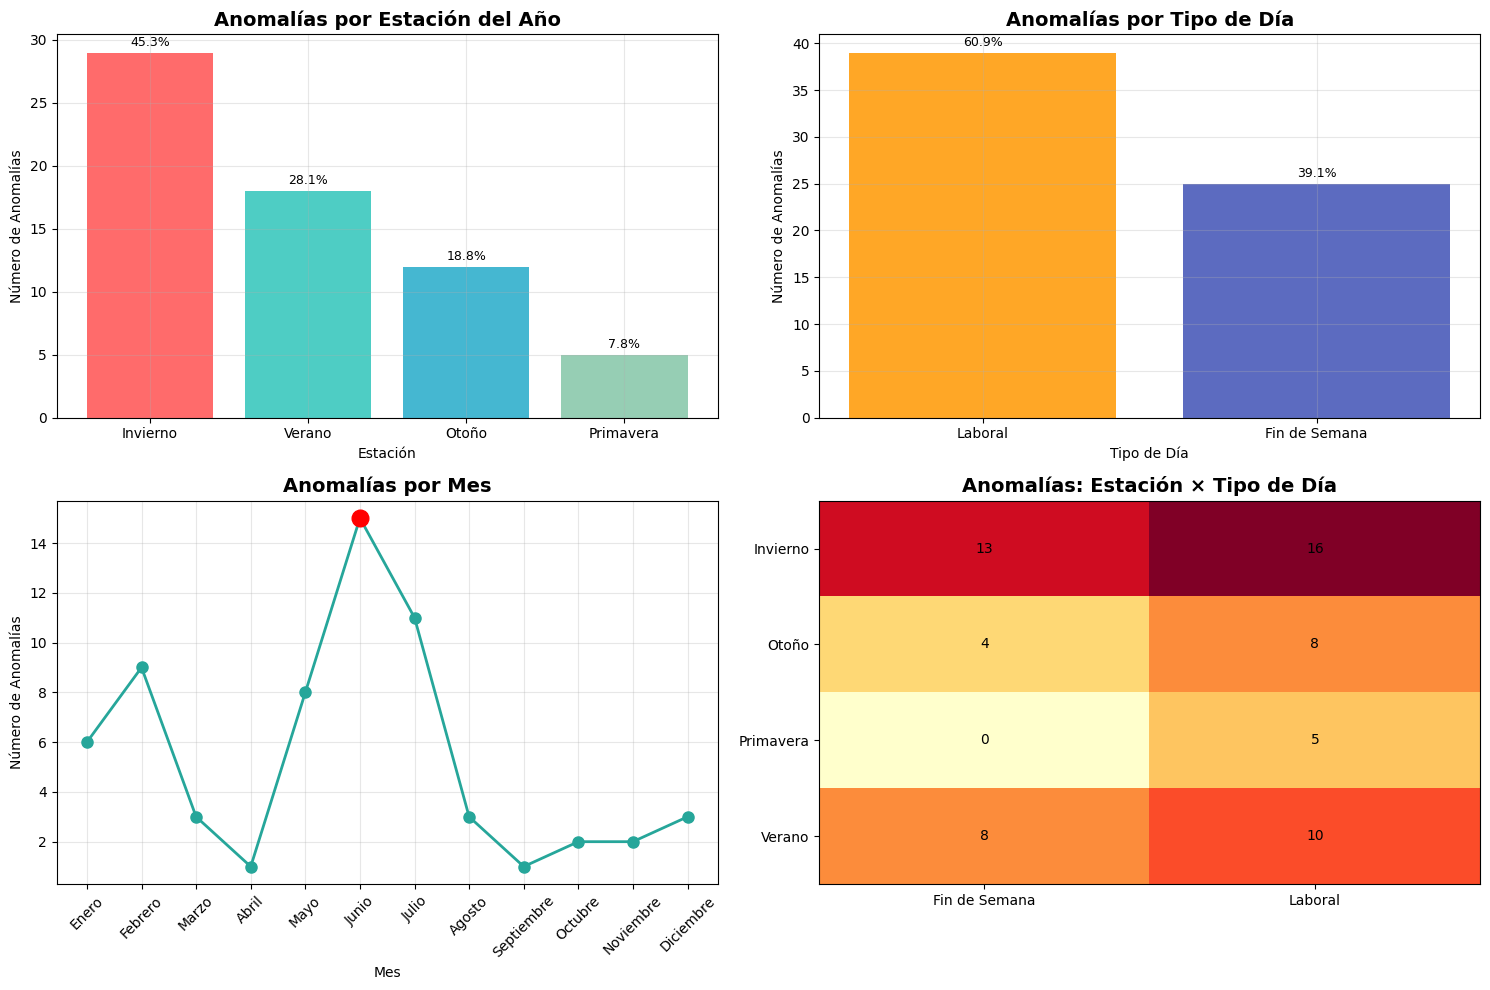

In [ ]:
#mostrar
# === ANÁLISIS DE VARIABILIDAD DE ANOMALÍAS POR ESTACIÓN Y TIPO DE DÍA ===

from datetime import datetime, timedelta
import calendar
from collections import Counter

# Configurar directorio base
base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"

# Definir funciones para clasificación
def obtener_estacion_chilena(mes):
    """Determina la estación del año según meses chilenos"""
    if mes in [12, 1, 2]:
        return "Verano"
    elif mes in [3, 4, 5]:
        return "Otoño"
    elif mes in [6, 7, 8]:
        return "Invierno"
    elif mes in [9, 10, 11]:
        return "Primavera"
    else:
        return "Desconocido"

def es_fin_de_semana(dia_semana):
    """Determina si es fin de semana (sábado=5, domingo=6 en Python)"""
    # En Python: Lunes=0, Martes=1, Miércoles=2, Jueves=3, Viernes=4, Sábado=5, Domingo=6
    return dia_semana >= 5  # Sábado (5) y Domingo (6)

def obtener_tipo_dia(dia_semana):
    """Devuelve 'Fin de Semana' o 'Laboral'"""
    return "Fin de Semana" if es_fin_de_semana(dia_semana) else "Laboral"

def es_año_bisiesto(año):
    """Determina si un año es bisiesto"""
    return (año % 4 == 0 and año % 100 != 0) or (año % 400 == 0)

def obtener_dias_mes(mes, año):
    """Obtiene el número de días en un mes, considerando años bisiestos"""
    if mes == 2:  # Febrero
        return 29 if es_año_bisiesto(año) else 28
    elif mes in [1, 3, 5, 7, 8, 10, 12]:  # Meses con 31 días
        return 31
    else:  # Meses con 30 días
        return 30

# Función para analizar anomalías por estación y tipo de día
def analizar_anomalias_estacionales(df_picos):
    """Analiza la variabilidad de anomalías por estación y tipo de día"""

    if df_picos.empty:
        print("✗ DataFrame de picos está vacío")
        return None

    print(f"Analizando {len(df_picos)} anomalías...")

    # Crear copia para análisis
    df_analisis = df_picos.copy()

    # Verificar que tenemos las columnas necesarias
    if 'Fecha_Pico' not in df_analisis.columns:
        print("✗ Error: No se encontró la columna 'Fecha_Pico'")
        return None

    # Preparar columnas para análisis
    fechas_validas = []
    años = []
    meses = []
    dias_mes = []
    dias_semana = []
    estaciones = []
    tipos_dia = []

    for fecha_str in df_analisis['Fecha_Pico']:
        try:
            # Convertir fecha string a datetime
            fecha_dt = pd.to_datetime(str(fecha_str), format='%y%m%d', errors='coerce')

            if pd.isna(fecha_dt):
                fechas_validas.append(None)
                años.append(None)
                meses.append(None)
                dias_mes.append(None)
                dias_semana.append(None)
                estaciones.append(None)
                tipos_dia.append(None)
                continue

            # Extraer componentes de la fecha
            año = fecha_dt.year
            mes = fecha_dt.month
            dia = fecha_dt.day
            dia_semana = fecha_dt.weekday()  # Lunes=0, Domingo=6

            # Calcular información adicional
            dias_en_mes = obtener_dias_mes(mes, año)
            estacion = obtener_estacion_chilena(mes)
            tipo_dia = obtener_tipo_dia(dia_semana)

            fechas_validas.append(fecha_dt)
            años.append(año)
            meses.append(mes)
            dias_mes.append(dias_en_mes)
            dias_semana.append(dia_semana)
            estaciones.append(estacion)
            tipos_dia.append(tipo_dia)

        except Exception as e:
            fechas_validas.append(None)
            años.append(None)
            meses.append(None)
            dias_mes.append(None)
            dias_semana.append(None)
            estaciones.append(None)
            tipos_dia.append(None)

    # Agregar columnas al DataFrame
    df_analisis['Fecha_DT'] = fechas_validas
    df_analisis['Año'] = años
    df_analisis['Mes'] = meses
    df_analisis['Dias_Mes'] = dias_mes
    df_analisis['Dia_Semana_Num'] = dias_semana
    df_analisis['Dia_Semana'] = df_analisis['Dia_Semana_Num'].apply(
        lambda x: ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'][x] if pd.notna(x) else None
    )
    df_analisis['Estacion'] = estaciones
    df_analisis['Tipo_Dia'] = tipos_dia

    # Filtrar solo filas con datos válidos
    df_valido = df_analisis[df_analisis['Fecha_DT'].notna()].copy()

    # === ANÁLISIS POR ESTACIÓN DEL AÑO ===
    print("\n" + "="*80)
    print("ANÁLISIS POR ESTACIÓN DEL AÑO")
    print("="*80)

    # Contar anomalías por estación
    conteo_estacion = df_valido['Estacion'].value_counts()
    total_anomalias = len(df_valido)

    print("\nFRECUENCIA DE ANOMALÍAS POR ESTACIÓN:")
    print("-" * 50)

    for estacion, count in conteo_estacion.items():
        porcentaje = (count / total_anomalias) * 100
        print(f"  {estacion:<12} {count:>5} anomalías ({porcentaje:.1f}%)")

    # Análisis por concentración (si existe columna PM25_Pik)
    col_pm25 = None
    for col in ['PM25_Pico', 'Pico_IQR', 'Pico_Absoluto']:
        if col in df_valido.columns:
            col_pm25 = col
            break

    if col_pm25:
        print(f"\nCONCENTRACIÓN PROMEDIO POR ESTACIÓN ({col_pm25}):")
        print("-" * 50)

        estadisticas_estacion = df_valido.groupby('Estacion')[col_pm25].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)

        print(estadisticas_estacion.to_string())

    # === ANÁLISIS POR TIPO DE DÍA (LABORAL VS FIN DE SEMANA) ===
    print("\n" + "="*80)
    print("ANÁLISIS POR TIPO DE DÍA (LABORAL VS FIN DE SEMANA)")
    print("="*80)

    # Contar anomalías por tipo de día
    conteo_tipo_dia = df_valido['Tipo_Dia'].value_counts()

    print("\nFRECUENCIA DE ANOMALÍAS POR TIPO DE DÍA:")
    print("-" * 50)

    for tipo, count in conteo_tipo_dia.items():
        porcentaje = (count / total_anomalias) * 100
        print(f"  {tipo:<15} {count:>5} anomalías ({porcentaje:.1f}%)")

    # Análisis detallado por día de la semana
    print("\nDISTRIBUCIÓN POR DÍA DE LA SEMANA:")
    print("-" * 50)

    conteo_dias = df_valido['Dia_Semana'].value_counts()

    # Ordenar por día de la semana (Lunes a Domingo)
    orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
    conteo_dias_ordenado = conteo_dias.reindex(orden_dias).fillna(0)

    for dia, count in conteo_dias_ordenado.items():
        porcentaje = (count / total_anomalias) * 100
        tipo = "Fin de Semana" if dia in ['Sábado', 'Domingo'] else "Laboral"
        print(f"  {dia:<12} {tipo:<15} {count:>5} anomalías ({porcentaje:.1f}%)")

    if col_pm25:
        print(f"\nCONCENTRACIÓN PROMEDIO POR TIPO DE DÍA ({col_pm25}):")
        print("-" * 50)

        estadisticas_tipo_dia = df_valido.groupby('Tipo_Dia')[col_pm25].agg([
            'count', 'mean', 'median', 'std', 'min', 'max'
        ]).round(2)

        print(estadisticas_tipo_dia.to_string())

    # === ANÁLISIS COMBINADO (ESTACIÓN × TIPO DE DÍA) ===
    print("\n" + "="*80)
    print("ANÁLISIS COMBINADO: ESTACIÓN × TIPO DE DÍA")
    print("="*80)

    # Crear tabla cruzada
    tabla_cruzada = pd.crosstab(
        df_valido['Estacion'],
        df_valido['Tipo_Dia'],
        margins=True,
        margins_name="TOTAL"
    )

    print("\nTABLA CRUZADA - ANOMALÍAS POR ESTACIÓN Y TIPO DE DÍA:")
    print("-" * 60)
    print(tabla_cruzada.to_string())

    # Calcular porcentajes por fila (estación)
    print("\nPORCENTAJES POR ESTACIÓN (horizontal):")
    print("-" * 60)

    porcentajes_fila = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0) * 100

    # Formatear para mejor visualización
    porcentajes_formateados = porcentajes_fila.round(1).astype(str) + "%"
    print(porcentajes_formateados.to_string())

    # Calcular porcentajes por columna (tipo de día)
    print("\nPORCENTAJES POR TIPO DE DÍA (vertical):")
    print("-" * 60)

    porcentajes_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100
    porcentajes_formateados_col = porcentajes_columna.round(1).astype(str) + "%"
    print(porcentajes_formateados_col.to_string())

    # === ANÁLISIS POR MES ===
    print("\n" + "="*80)
    print("ANÁLISIS POR MES")
    print("="*80)

    nombres_meses = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
        5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
        9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }

    # Agregar nombre del mes
    df_valido['Mes_Nombre'] = df_valido['Mes'].map(nombres_meses)

    # Contar anomalías por mes
    conteo_meses = df_valido['Mes'].value_counts().sort_index()

    print("\nFRECUENCIA DE ANOMALÍAS POR MES:")
    print("-" * 50)

    for mes, count in conteo_meses.items():
        nombre_mes = nombres_meses.get(mes, f'Mes {mes}')
        porcentaje = (count / total_anomalias) * 100
        print(f"  {nombre_mes:<12} {count:>5} anomalías ({porcentaje:.1f}%)")

    # Normalizar por número de días en el mes (frecuencia por día)
    print("\nFRECUENCIA NORMALIZADA (anomalías por día):")
    print("-" * 50)

    # Calcular total de anomalías por mes y normalizar
    anomalias_por_mes = df_valido.groupby('Mes').size()
    dias_por_mes = df_valido.groupby('Mes')['Dias_Mes'].first()

    frecuencia_normalizada = (anomalias_por_mes / dias_por_mes).round(3)

    for mes in sorted(frecuencia_normalizada.index):
        nombre_mes = nombres_meses.get(mes, f'Mes {mes}')
        freq = frecuencia_normalizada[mes]
        print(f"  {nombre_mes:<12} {freq:>7.3f} anomalías/día")

    # === ANÁLISIS ESTADÍSTICO AVANZADO ===
    print("\n" + "="*80)
    print("ANÁLISIS ESTADÍSTICO AVANZADO")
    print("="*80)

    # 1. Prueba de diferencia entre laboral y fin de semana
    if col_pm25 and 'Tipo_Dia' in df_valido.columns:
        laboral = df_valido[df_valido['Tipo_Dia'] == 'Laboral'][col_pm25]
        fin_semana = df_valido[df_valido['Tipo_Dia'] == 'Fin de Semana'][col_pm25]

        if not laboral.empty and not fin_semana.empty:
            from scipy import stats

            print("\nCOMPARACIÓN ESTADÍSTICA - LABORAL VS FIN DE SEMANA:")
            print("-" * 50)

            # Test t de Student (asumiendo varianzas desiguales)
            t_stat, p_value = stats.ttest_ind(laboral, fin_semana, equal_var=False)

            print(f"  Laboral (n={len(laboral)}):")
            print(f"    Media: {laboral.mean():.2f} µg/m³")
            print(f"    Mediana: {laboral.median():.2f} µg/m³")
            print(f"    Desv. estándar: {laboral.std():.2f} µg/m³")

            print(f"\n  Fin de semana (n={len(fin_semana)}):")
            print(f"    Media: {fin_semana.mean():.2f} µg/m³")
            print(f"    Mediana: {fin_semana.median():.2f} µg/m³")
            print(f"    Desv. estándar: {fin_semana.std():.2f} µg/m³")

            print(f"\n  Test t de Student:")
            print(f"    t-statistic: {t_stat:.3f}")
            print(f"    p-value: {p_value:.4f}")

            if p_value < 0.05:
                print(f"    CONCLUSIÓN: Diferencia ESTADÍSTICAMENTE SIGNIFICATIVA (p < 0.05)")
                if laboral.mean() > fin_semana.mean():
                    print(f"    → Mayor contaminación en días LABORALES")
                else:
                    print(f"    → Mayor contaminación en FINES DE SEMANA")
            else:
                print(f"    CONCLUSIÓN: NO hay diferencia estadísticamente significativa")

    # 2. Análisis por estación
    if col_pm25 and 'Estacion' in df_valido.columns:
        print("\nCOMPARACIÓN ENTRE ESTACIONES:")
        print("-" * 50)

        estadisticas_estacion_detalladas = df_valido.groupby('Estacion').agg({
            col_pm25: ['count', 'mean', 'median', 'std', 'min', 'max']
        }).round(2)

        print(estadisticas_estacion_detalladas.to_string())

        # ANOVA entre estaciones
        grupos = [grupo[col_pm25].values for name, grupo in df_valido.groupby('Estacion')]

        if all(len(g) > 1 for g in grupos):
            f_stat, p_value_anova = stats.f_oneway(*grupos)

            print(f"\n  ANOVA entre estaciones:")
            print(f"    F-statistic: {f_stat:.3f}")
            print(f"    p-value: {p_value_anova:.4f}")

            if p_value_anova < 0.05:
                print(f"    CONCLUSIÓN: Hay diferencias SIGNIFICATIVAS entre estaciones")
            else:
                print(f"    CONCLUSIÓN: NO hay diferencias significativas entre estaciones")

    # === PREPARAR RESULTADOS PARA EXPORTACIÓN ===
    resultados = {
        'df_analisis': df_valido,
        'estadisticas_estacion': estadisticas_estacion if col_pm25 else None,
        'estadisticas_tipo_dia': estadisticas_tipo_dia if col_pm25 else None,
        'tabla_cruzada': tabla_cruzada,
        'conteo_estacion': conteo_estacion,
        'conteo_tipo_dia': conteo_tipo_dia,
        'conteo_meses': conteo_meses,
        'frecuencia_normalizada': frecuencia_normalizada,
        'total_anomalias': total_anomalias,
        'test_t_result': {
            't_stat': t_stat if 't_stat' in locals() else None,
            'p_value': p_value if 'p_value' in locals() else None
        } if col_pm25 else None,
        'anova_result': {
            'f_stat': f_stat if 'f_stat' in locals() else None,
            'p_value': p_value_anova if 'p_value_anova' in locals() else None
        } if col_pm25 else None
    }

    return resultados

# === ANÁLISIS ===
print("="*100)
print("ANÁLISIS DE VARIABILIDAD DE ANOMALÍAS POR ESTACIÓN Y TIPO DE DÍA")
print("="*100)

# Verificar si tenemos datos de picos
if 'df_picos_iqr_sorted' not in globals():
    print("ERROR: Primero debes ejecutar el código de cálculo de picos IQR")
    print("Ejecuta la celda que comienza con: # === CÓDIGO PARA EXTRAER VALORES PICO DE PM2.5 USANDO IQR ===")
else:
    # Filtrar solo anomalías válidas (picos detectados)
    df_anomalias = df_picos_iqr_sorted[df_picos_iqr_sorted['Pico_IQR'].notna()].copy()

    # Renombrar columnas para consistencia
    if 'Pico_IQR' in df_anomalias.columns:
        df_anomalias = df_anomalias.rename(columns={'Pico_IQR': 'PM25_Pico'})

    print(f"Total de anomalías (picos) detectadas: {len(df_anomalias)}")

    # Ejecutar análisis
    resultados = analizar_anomalias_estacionales(df_anomalias)

    if resultados:
        print("\n" + "="*100)
        print("RESUMEN EJECUTIVO DEL ANÁLISIS")
        print("="*100)

        df_valido = resultados['df_analisis']
        total_anomalias = resultados['total_anomalias']

        # === RESUMEN 1: DISTRIBUCIÓN POR ESTACIÓN ===
        print("\n1. DISTRIBUCIÓN POR ESTACIÓN DEL AÑO:")
        print("-" * 50)

        for estacion, count in resultados['conteo_estacion'].items():
            porcentaje = (count / total_anomalias) * 100
            print(f"   {estacion:<12} {porcentaje:>5.1f}% de las anomalías")

        # Identificar estación con más anomalías
        estacion_max = resultados['conteo_estacion'].idxmax()
        count_max = resultados['conteo_estacion'].max()
        porcentaje_max = (count_max / total_anomalias) * 100

        print(f"\n   → La estación con MÁS anomalías es: {estacion_max} ({porcentaje_max:.1f}%)")

        # === RESUMEN 2: DISTRIBUCIÓN POR TIPO DE DÍA ===
        print("\n2. DISTRIBUCIÓN POR TIPO DE DÍA:")
        print("-" * 50)

        for tipo, count in resultados['conteo_tipo_dia'].items():
            porcentaje = (count / total_anomalias) * 100
            print(f"   {tipo:<15} {porcentaje:>5.1f}% de las anomalías")

        # Calcular razonLaboral/Fin de semana
        if 'Laboral' in resultados['conteo_tipo_dia'] and 'Fin de Semana' in resultados['conteo_tipo_dia']:
            count_laboral = resultados['conteo_tipo_dia']['Laboral']
            count_fin_semana = resultados['conteo_tipo_dia']['Fin de Semana']

            if count_fin_semana > 0:
                razon= count_laboral / count_fin_semana
                print(f"\n  razón Laboral/Fin de semana: {razon:.2f}")

                if razon > 1:
                    print(f"  {razon:.1f}x más anomalías en días LABORALES")
                else:
                    print(f" {1/razon:.1f}x más anomalías en FINES DE SEMANA")

        # === RESUMEN 3: MESES MÁS CRÍTICOS ===
        print("\n3. MESES CON MÁS ANOMALÍAS:")
        print("-" * 50)

        # Obtener top 3 meses
        top_meses = resultados['conteo_meses'].nlargest(3)

        nombres_meses = {
            1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
            5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
            9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
        }

        for mes, count in top_meses.items():
            nombre_mes = nombres_meses.get(mes, f'Mes {mes}')
            porcentaje = (count / total_anomalias) * 100
            print(f"   {nombre_mes:<12} {porcentaje:>5.1f}% de las anomalías")

        # === RESUMEN 4: ANÁLISIS ESTADÍSTICO ===
        print("\n4. CONCLUSIÓN ESTADÍSTICA:")
        print("-" * 50)

        if resultados['test_t_result'] and resultados['test_t_result']['p_value'] is not None:
            p_value = resultados['test_t_result']['p_value']

            if p_value < 0.05:
                print(" Hay diferencia SIGNIFICATIVA entre días laborales y fines de semana")

                # Determinar cuál tiene mayor concentración promedio
                if 'PM25_Pico' in df_valido.columns:
                    media_laboral = df_valido[df_valido['Tipo_Dia'] == 'Laboral']['PM25_Pico'].mean()
                    media_fin_semana = df_valido[df_valido['Tipo_Dia'] == 'Fin de Semana']['PM25_Pico'].mean()

                    if media_laboral > media_fin_semana:
                        diferencia = media_laboral - media_fin_semana
                        print(f"   → Los días LABORALES tienen {diferencia:.1f} µg/m³ MÁS contaminación")
                    else:
                        diferencia = media_fin_semana - media_laboral
                        print(f"   → Los FINES DE SEMANA tienen {diferencia:.1f} µg/m³ MÁS contaminación")
            else:
                print("   NO hay diferencia significativa entre días laborales y fines de semana")

        if resultados['anova_result'] and resultados['anova_result']['p_value'] is not None:
            p_value_anova = resultados['anova_result']['p_value']

            if p_value_anova < 0.05:
                print("    Hay diferencias SIGNIFICATIVAS entre las estaciones del año")

                # Identificar estación con mayor concentración
                if 'PM25_Pico' in df_valido.columns:
                    media_por_estacion = df_valido.groupby('Estacion')['PM25_Pico'].mean()
                    estacion_max_conc = media_por_estacion.idxmax()
                    max_conc = media_por_estacion.max()

                    print(f"   La estación con MAYOR contaminación es: {estacion_max_conc} ({max_conc:.1f} µg/m³)")
            else:
                print("    NO hay diferencias significativas entre las estaciones del año")


        # === VISUALIZACIÓN RÁPIDA ===
        print("\n" + "="*100)
        print("VISUALIZACIÓN DE RESULTADOS")
        print("="*100)

        import matplotlib.pyplot as plt

        # Configurar estilo
        plt.style.use('default')

        # Crear figura con subplots
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # 1. Gráfico de barras por estación
        ax1 = axes[0, 0]
        estaciones = resultados['conteo_estacion'].index
        counts = resultados['conteo_estacion'].values
        porcentajes = (counts / total_anomalias * 100).round(1)

        bars1 = ax1.bar(estaciones, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
        ax1.set_title('Anomalías por Estación del Año', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Estación')
        ax1.set_ylabel('Número de Anomalías')
        ax1.grid(True, alpha=0.3)

        # Agregar etiquetas con porcentajes
        for bar, porcentaje in zip(bars1, porcentajes):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                    f'{porcentaje:.1f}%', ha='center', va='bottom', fontsize=9)

        # 2. Gráfico de barras por tipo de día
        ax2 = axes[0, 1]
        tipos = resultados['conteo_tipo_dia'].index
        counts_tipo = resultados['conteo_tipo_dia'].values
        porcentajes_tipo = (counts_tipo / total_anomalias * 100).round(1)

        colors_tipo = ['#FFA726', '#5C6BC0']  # Naranja para Laboral, Azul para Fin de semana
        bars2 = ax2.bar(tipos, counts_tipo, color=colors_tipo)
        ax2.set_title('Anomalías por Tipo de Día', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Tipo de Día')
        ax2.set_ylabel('Número de Anomalías')
        ax2.grid(True, alpha=0.3)

        # Agregar etiquetas con porcentajes
        for bar, porcentaje in zip(bars2, porcentajes_tipo):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + max(counts_tipo)*0.01,
                    f'{porcentaje:.1f}%', ha='center', va='bottom', fontsize=9)

        # 3. Gráfico de líneas por mes
        ax3 = axes[1, 0]
        meses_ordenados = sorted(resultados['conteo_meses'].index)
        meses_nombres_ordenados = [nombres_meses[m] for m in meses_ordenados]
        counts_meses = [resultados['conteo_meses'].get(m, 0) for m in meses_ordenados]

        ax3.plot(meses_nombres_ordenados, counts_meses, marker='o', linewidth=2, markersize=8,
                color='#26A69A', label='Anomalías')
        ax3.set_title('Anomalías por Mes', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Mes')
        ax3.set_ylabel('Número de Anomalías')
        ax3.grid(True, alpha=0.3)
        ax3.tick_params(axis='x', rotation=45)

        # Resaltar meses con más anomalías
        max_mes_idx = np.argmax(counts_meses)
        ax3.plot(meses_nombres_ordenados[max_mes_idx], counts_meses[max_mes_idx],
                'o', markersize=12, color='red', label='Máximo')

        # 4. Gráfico de calor (tabla cruzada sin totales)
        ax4 = axes[1, 1]

        # Crear tabla cruzada sin totales
        tabla_sin_totales = resultados['tabla_cruzada'].iloc[:-1, :-1]

        # Crear mapa de calor
        im = ax4.imshow(tabla_sin_totales.values, cmap='YlOrRd', aspect='auto')

        # Configurar ejes
        ax4.set_xticks(np.arange(len(tabla_sin_totales.columns)))
        ax4.set_yticks(np.arange(len(tabla_sin_totales.index)))
        ax4.set_xticklabels(tabla_sin_totales.columns)
        ax4.set_yticklabels(tabla_sin_totales.index)

        ax4.set_title('Anomalías: Estación × Tipo de Día', fontsize=14, fontweight='bold')

        # Agregar valores en las celdas
        for i in range(len(tabla_sin_totales.index)):
            for j in range(len(tabla_sin_totales.columns)):
                text = ax4.text(j, i, int(tabla_sin_totales.iloc[i, j]),
                              ha="center", va="center", color="black", fontsize=10)

        # Ajustar layout
        plt.tight_layout()
        plt.show()




A partir del análisis descriptivo, se observa que las anomalías (Piks) de PM2.5 se concentran principalmente en invierno (45,3%), seguido de verano (28,1%) y otoño (18,8%), mientras que primavera presenta una proporción claramente menor (7,8%). A nivel mensual, los meses con mayor frecuencia de anomalías son junio (23,4%), julio (17,2%) y febrero (14,1%), lo que sugiere una mayor ocurrencia de eventos atípicos en el periodo invernal y en ciertos meses de verano.

En cuanto al tipo de día, el 60,9% de las anomalías ocurre en días laborales y el 39,1% en fines de semana, con una razón aproximada de 1,6 anomalías en días laborales por cada anomalía en fin de semana. No obstante, los análisis inferenciales indican que estas diferencias no son estadísticamente significativas: el test t de Student para comparar concentraciones entre días laborales y fines de semana arroja un p-value ≈ 0,31, y el ANOVA entre estaciones del año entrega un p-value ≈ 0,08, por encima del umbral usual de 0,05.

En síntesis, si bien descriptivamente se aprecia una mayor concentración de anomalías en invierno y en días laborales, no se encuentran evidencias suficientes para afirmar diferencias significativas en intensidad de Piks entre estaciones del año ni entre días laborales y fines de semana con el tamaño muestral disponible.

##Pregunta N°3: ¿Las estaciones ubicadas dentro o próximas a zonas de sacrificio ambiental presentan mayor frecuencia, duración e intensidad de episodios críticos comparadas con estaciones en áreas sin esta designación?

3.1 ¿Cómo definir objetivamente la pertenencia (polígonos oficiales versus buffers de distintas distancias km) y qué estaciones constituyen controles apropiados?

CORRIGIENDO: USANDO COORDENADAS REALES EN LATITUD/LONGITUD
Archivo de coordenadas original:
Columnas: ['Estacion', 'Comuna', 'UTM_E', 'UTM_N', 'zona_sacrificio']
Primeras filas:
       Estacion   UTM_E    UTM_N
0  Punta Arenas  371526  4108390
1      Cochrane  683751  4763656
2   Coyhaique I  729281  4948421
3  Coyhaique II  730152  4948488
4      Vialidad  680977  4969547

 Diagnóstico de coordenadas:
Rango UTM_E: 255891.0 a 2933302.0
Rango UTM_N: 4108390.0 a 63711087.0
 Los valores parecen ser UTM (metros), no lat/lon (grados)
  Necesitamos convertir de UTM a lat/lon

DEFINIENDO ZONAS DE SACRIFICIO CON COORDENADAS CORRECTAS
 7 zonas de sacrificio definidas:
   • Quintero_Puchuncavi: lat=-32.744, lon=-71.489
   • Coronel_Termoelectrica: lat=-37.03, lon=-73.156
   • Huasco_Guacolda: lat=-28.459, lon=-71.226
   • Mejillones_Termoelectrica: lat=-23.094, lon=-70.455
   • Til_Til: lat=-33.0839, lon=-70.92798
   • Tocopilla_Termoelectrica: lat=-22.1654, lon=-70.0909
   • Valparaiso_Refineri

/tmp/ipython-input-753805355.py:296: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)


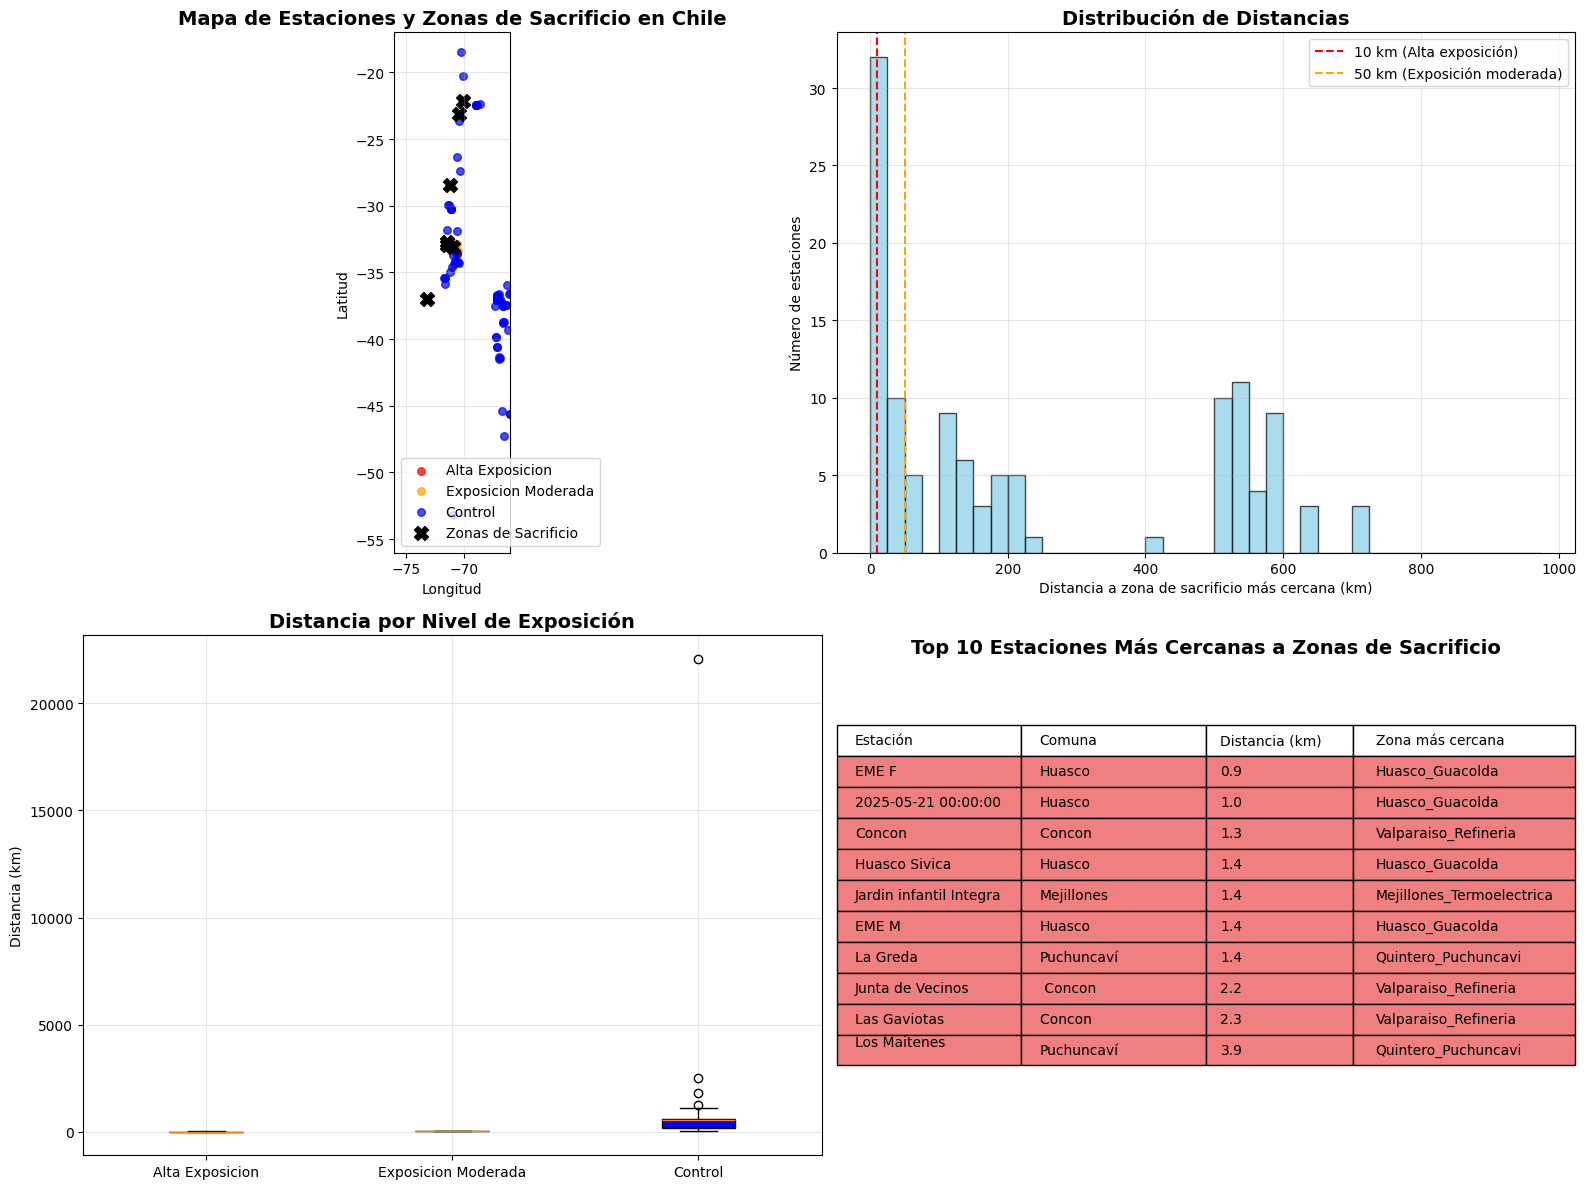


GUARDANDO RESULTADOS CORRECTOS


/tmp/ipython-input-753805355.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasificacion_corregida[f'en_buffer_{km}km'] = gdf_estaciones_correcto[f'en_buffer_{km}km']
/tmp/ipython-input-753805355.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clasificacion_corregida[f'en_buffer_{km}km'] = gdf_estaciones_correcto[f'en_buffer_{km}km']
/tmp/ipython-input-753805355.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

 Clasificación corregida guardada en: /content/drive/MyDrive/ProyectoDatos/clasificacion_corregida.csv

RESUMEN FINAL DE CLASIFICACIÓN CORREGIDA

 ESTADÍSTICAS:
   • Total estaciones: 124
   • Estaciones ≤ 10 km: 21
   • Estaciones 10-50 km: 21
   • Estaciones > 50 km: 82

 EJEMPLOS POR CATEGORÍA:

1. ALTA EXPOSICIÓN (≤ 10 km):
   1. Jardin infantil Integra (Mejillones): 1.4 km de Mejillones_Termoelectrica
   2. SM1  (Huasco): 5.3 km de Huasco_Guacolda
   3. 2025-05-21 00:00:00 (Huasco): 1.0 km de Huasco_Guacolda
   4. Huasco Sivica (Huasco): 1.4 km de Huasco_Guacolda
   5. EME F (Huasco): 0.9 km de Huasco_Guacolda

2. EXPOSICIÓN MODERADA (10-50 km):
   1. Tres Marias (Tocopilla): 15.3 km de Tocopilla_Termoelectrica
   2. Estacion Super Site (Tocopilla): 13.3 km de Tocopilla_Termoelectrica
   3. Gobernacion (Tocopilla): 13.9 km de Tocopilla_Termoelectrica
   4. Bomberos (Tocopilla): 13.7 km de Tocopilla_Termoelectrica
   5. SM6 (Freirina): 10.7 km de Huasco_Guacolda

3. CONTROL (> 50 k

In [ ]:
#mostrar
# SUBPREGUNTA 1

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS, Transformer
import matplotlib.pyplot as plt

print("="*80)
print("CORRIGIENDO: USANDO COORDENADAS REALES EN LATITUD/LONGITUD")
print("="*80)

# 1. CARGAR ARCHIVO DE COORDENADAS ORIGINAL
coordenadas_path = "/content/drive/MyDrive/ProyectoDatos/estaciones_coordenadas.xlsx"
coordenadas_df = pd.read_excel(coordenadas_path)
coordenadas_df.columns = [col.strip() for col in coordenadas_df.columns]

print("Archivo de coordenadas original:")
print(f"Columnas: {list(coordenadas_df.columns)}")
print(f"Primeras filas:")
print(coordenadas_df[['Estacion', 'UTM_E', 'UTM_N']].head())

# 2. VERIFICAR SI LAS COORDENADAS SON REALMENTE UTM O SI SON LAT/LON
print("\n Diagnóstico de coordenadas:")
print(f"Rango UTM_E: {coordenadas_df['UTM_E'].min():.1f} a {coordenadas_df['UTM_E'].max():.1f}")
print(f"Rango UTM_N: {coordenadas_df['UTM_N'].min():.1f} a {coordenadas_df['UTM_N'].max():.1f}")

# Si los valores son muy grandes (cientos de miles), probablemente son UTM
# Si son pequeños (entre -90 y 90 para lat, -180 a 180 para lon), son grados decimales
utm_e_mean = coordenadas_df['UTM_E'].mean()
utm_n_mean = coordenadas_df['UTM_N'].mean()

if abs(utm_e_mean) > 180 or abs(utm_n_mean) > 90:
    print(" Los valores parecen ser UTM (metros), no lat/lon (grados)")
    print("  Necesitamos convertir de UTM a lat/lon")
    es_utm = True
else:
    print("Los valores parecen ser lat/lon (grados decimales)")
    es_utm = False

# 3. DEFINIR ZONAS DE SACRIFICIO CON COORDENADAS (LAT/LON)
print("\n" + "="*80)
print("DEFINIENDO ZONAS DE SACRIFICIO CON COORDENADAS CORRECTAS")
print("="*80)

# Coordenadas (lat, lon)
zonas_sacrificio_correctas = {
    # Nombre: (latitud, longitud)
    "Quintero_Puchuncavi": (-32.744, -71.489),
    "Coronel_Termoelectrica": (-37.030, -73.156),
    "Huasco_Guacolda": (-28.459, -71.226),
    "Mejillones_Termoelectrica": (-23.094, -70.455),
    "Til_Til": (-33.0839, -70.92798),
    "Tocopilla_Termoelectrica": (-22.1654, -70.0909),
    "Valparaiso_Refineria": (-32.92786232575, -71.502005957076)
}

print(f" {len(zonas_sacrificio_correctas)} zonas de sacrificio definidas:")
for nombre, (lat, lon) in zonas_sacrificio_correctas.items():
    print(f"   • {nombre}: lat={lat}, lon={lon}")

# 4. PREPARAR LAS ESTACIONES (CONVERTIR SI ES NECESARIO)
print("\n" + "="*80)
print("PREPARANDO COORDENADAS DE ESTACIONES")
print("="*80)

# Crear copia para trabajar
df_estaciones = coordenadas_df.copy()
df_estaciones = df_estaciones.rename(columns={
    'Estacion': 'nombre_estacion',
    'UTM_E': 'x_original',
    'UTM_N': 'y_original',
    'Comuna': 'comuna'
})

# Si las coordenadas son UTM, necesitamos saber la zona UTM
# Chile usa zonas 18, 19 y 20S
print("\n Suposición sobre zona UTM:")
print("Chile está en zonas UTM 18, 19 y 20 (hemisferio sur)")
print("Necesitamos asumir o determinar la zona para cada estación")

# Función para intentar determinar zona UTM basado en longitud
def estimar_zona_utm(longitud):
    """Estimar zona UTM basado en longitud (para Chile)"""
    # Fórmula: zona = floor((lon + 180)/6) + 1
    # Chile está aproximadamente entre longitudes -75 y -67
    zonas_chile = {
        (-75, -72): 18,   # Zona 18S: Arica a Coquimbo
        (-72, -66): 19,   # Zona 19S: Coquimbo a Puerto Montt (la más común)
        (-66, -60): 20    # Zona 20S: Patagonia
    }

    for (lon_min, lon_max), zona in zonas_chile.items():
        if lon_min <= longitud <= lon_max:
            return zona
    return 19  # Zona por defecto (la más común)

# Vamos a asumir que TODAS las coordenadas están en la misma zona
# Primero ver si son UTM o ya son lat/lon

# Opción A: Si son UTM, convertir a lat/lon
if es_utm:
    print("\n Convirtiendo de UTM a lat/lon...")
    print("Asumiendo zona UTM 19S (la más común en Chile central)")

    # Crear transformador de UTM zona 19S a WGS84 (lat/lon)
    utm_crs = CRS.from_string("+proj=utm +zone=19 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    wgs84_crs = CRS.from_string("EPSG:4326")  # WGS84 lat/lon
    transformer = Transformer.from_crs(utm_crs, wgs84_crs, always_xy=True)

    # Convertir coordenadas
    latitudes = []
    longitudes = []

    for idx, row in df_estaciones.iterrows():
        try:
            lon, lat = transformer.transform(row['x_original'], row['y_original'])
            longitudes.append(lon)
            latitudes.append(lat)
        except Exception as e:
            print(f"Error convirtiendo estación {row['nombre_estacion']}: {e}")
            longitudes.append(np.nan)
            latitudes.append(np.nan)

    df_estaciones['longitud'] = longitudes
    df_estaciones['latitud'] = latitudes

else:
    # Opción B: Si ya son lat/lon
    print("\n Las coordenadas ya parecen ser lat/lon")
    df_estaciones['longitud'] = df_estaciones['x_original']
    df_estaciones['latitud'] = df_estaciones['y_original']

print("\n Coordenadas convertidas (primeras 5):")
print(df_estaciones[['nombre_estacion', 'latitud', 'longitud']].head())

# 5. CREAR GEODATAFRAME CON COORDENADAS CORRECTAS
print("\n" + "="*80)
print("CREANDO GEODATAFRAME CON SISTEMA DE COORDENADAS CORRECTO")
print("="*80)

# Crear GeoDataFrame con coordenadas lat/lon
gdf_estaciones_correcto = gpd.GeoDataFrame(
    df_estaciones,
    geometry=gpd.points_from_xy(df_estaciones['longitud'], df_estaciones['latitud']),
    crs="EPSG:4326"  # WGS84 lat/lon
)

# Crear GeoDataFrame para zonas de sacrificio
puntos_sacrificio_lista = []
nombres_sacrificio = []
for nombre, (lat, lon) in zonas_sacrificio_correctas.items():
    puntos_sacrificio_lista.append(Point(lon, lat))  # Point(x, y) donde x=lon, y=lat
    nombres_sacrificio.append(nombre)

gdf_sacrificio_correcto = gpd.GeoDataFrame(
    {"nombre": nombres_sacrificio},
    geometry=puntos_sacrificio_lista,
    crs="EPSG:4326"
)

print(f"\nsí, {len(gdf_estaciones_correcto)} estaciones con coordenadas lat/lon")
print(f"sí, {len(gdf_sacrificio_correcto)} puntos de zonas de sacrificio")

# 6. CALCULAR DISTANCIAS REALES (en km)
print("\n" + "="*80)
print("CALCULANDO DISTANCIAS REALES ENTRE ESTACIONES Y ZONAS DE SACRIFICIO")
print("="*80)

# Proyectar a un sistema métrico para calcular distancias en km
# Proyección equidistante cónica para Chile
chile_crs = CRS.from_string("+proj=eqdc +lat_0=-33 +lon_0=-70 +lat_1=-20 +lat_2=-45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

# Convertir a la proyección chilena para calcular distancias
gdf_estaciones_proj = gdf_estaciones_correcto.to_crs(chile_crs)
gdf_sacrificio_proj = gdf_sacrificio_correcto.to_crs(chile_crs)

# Calcular distancia mínima de cada estación a cualquier zona de sacrificio
distancias_km = []
puntos_cercanos = []

for idx_estacion, estacion in gdf_estaciones_proj.iterrows():
    min_dist = float('inf')
    punto_cercano = None

    for idx_punto, punto in gdf_sacrificio_proj.iterrows():
        dist = estacion.geometry.distance(punto.geometry) / 1000  # Convertir a km
        if dist < min_dist:
            min_dist = dist
            punto_cercano = punto['nombre']

    distancias_km.append(min_dist)
    puntos_cercanos.append(punto_cercano)

gdf_estaciones_correcto['distancia_km'] = distancias_km
gdf_estaciones_correcto['punto_cercano'] = puntos_cercanos

print("\n DISTANCIAS CALCULADAS:")
print(f"   • Distancia mínima: {min(distancias_km):.1f} km")
print(f"   • Distancia máxima: {max(distancias_km):.1f} km")
print(f"   • Distancia promedio: {np.mean(distancias_km):.1f} km")
print(f"   • Distancia mediana: {np.median(distancias_km):.1f} km")

# 7. CLASIFICACIÓN CON BUFFERS MODIFICADOS
print("\n" + "="*80)
print("CLASIFICACIÓN CON DISTANCIAS CORRECTAS")
print("="*80)

# Buffers en km
buffers_km = [5, 10, 20, 50]

for km in buffers_km:
    gdf_estaciones_correcto[f'en_buffer_{km}km'] = gdf_estaciones_correcto['distancia_km'] <= km

# Clasificación en niveles
gdf_estaciones_correcto['nivel_exposicion'] = 'control'  # Por defecto

# Alta exposición (≤ 10 km)
cond_alta = gdf_estaciones_correcto['distancia_km'] <= 10
gdf_estaciones_correcto.loc[cond_alta, 'nivel_exposicion'] = 'alta_exposicion'

# Exposición moderada (10-50 km)
cond_moderada = (gdf_estaciones_correcto['distancia_km'] > 10) & (gdf_estaciones_correcto['distancia_km'] <= 50)
gdf_estaciones_correcto.loc[cond_moderada, 'nivel_exposicion'] = 'exposicion_moderada'

# Resumen
print("\n RESULTADOS DE CLASIFICACIÓN CORRECTA:")
for km in buffers_km:
    n_dentro = gdf_estaciones_correcto[f'en_buffer_{km}km'].sum()
    print(f"   • Buffer {km:2d} km: {n_dentro:3d} estaciones ({n_dentro/len(gdf_estaciones_correcto)*100:.1f}%)")

print("\n CLASIFICACIÓN POR NIVEL DE EXPOSICIÓN:")
counts = gdf_estaciones_correcto['nivel_exposicion'].value_counts()
for nivel, count in counts.items():
    porcentaje = count/len(gdf_estaciones_correcto)*100
    print(f"   • {nivel.replace('_', ' ').title()}: {count:3d} estaciones ({porcentaje:.1f}%)")

# 8. VISUALIZAR RESULTADOS
print("\n" + "="*80)
print("VISUALIZACIÓN DE RESULTADOS CORRECTOS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Mapa de Chile con estaciones y zonas de sacrificio
ax = axes[0, 0]
# Plot Chile de fondo (simplificado)
import matplotlib.patches as mpatches

# Crear un mapa simple de Chile
chile_bounds = {
    'north': -17.0, 'south': -56.0, 'west': -76.0, 'east': -66.0
}

# Estaciones por nivel de exposición
colores = {'alta_exposicion': 'red', 'exposicion_moderada': 'orange', 'control': 'blue'}
for nivel, color in colores.items():
    estaciones_nivel = gdf_estaciones_correcto[gdf_estaciones_correcto['nivel_exposicion'] == nivel]
    if len(estaciones_nivel) > 0:
        estaciones_nivel.plot(ax=ax, color=color, markersize=30, label=f'{nivel.replace("_", " ").title()}', alpha=0.7)

# Zonas de sacrificio
gdf_sacrificio_correcto.plot(ax=ax, color='black', markersize=100, marker='X', label='Zonas de Sacrificio')

ax.set_xlim([-76, -66])
ax.set_ylim([-56, -17])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Mapa de Estaciones y Zonas de Sacrificio en Chile', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. Histograma de distancias
ax = axes[0, 1]
bins = np.arange(0, 1000, 25)  # Bins de 25 km hasta 1000 km
ax.hist(gdf_estaciones_correcto['distancia_km'], bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
ax.axvline(x=10, color='red', linestyle='--', label='10 km (Alta exposición)')
ax.axvline(x=50, color='orange', linestyle='--', label='50 km (Exposición moderada)')
ax.set_xlabel('Distancia a zona de sacrificio más cercana (km)')
ax.set_ylabel('Número de estaciones')
ax.set_title('Distribución de Distancias', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# 3. Boxplot por nivel de exposición
ax = axes[1, 0]
data_to_plot = []
labels = []
for nivel in ['alta_exposicion', 'exposicion_moderada', 'control']:
    datos = gdf_estaciones_correcto[gdf_estaciones_correcto['nivel_exposicion'] == nivel]['distancia_km']
    if len(datos) > 0:
        data_to_plot.append(datos)
        labels.append(nivel.replace('_', ' ').title())

bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True)
# Colorear las cajas
colors = ['red', 'orange', 'blue']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Distancia (km)')
ax.set_title('Distancia por Nivel de Exposición', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# 4. Tabla de las estaciones más cercanas
ax = axes[1, 1]
ax.axis('off')  # Desactivar ejes para la tabla

# Preparar datos para la tabla
estaciones_cercanas = gdf_estaciones_correcto.nsmallest(10, 'distancia_km')[['nombre_estacion', 'comuna', 'distancia_km', 'punto_cercano']]
estaciones_cercanas = estaciones_cercanas.round({'distancia_km': 1})

# Crear tabla
table_data = []
table_data.append(['Estación', 'Comuna', 'Distancia (km)', 'Zona más cercana'])
for _, row in estaciones_cercanas.iterrows():
    table_data.append([row['nombre_estacion'], row['comuna'], f"{row['distancia_km']:.1f}", row['punto_cercano']])

# Crear tabla en el plot
table = ax.table(cellText=table_data, loc='center', cellLoc='left', colWidths=[0.25, 0.25, 0.2, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Colorear filas según distancia
for i in range(1, len(table_data)):  # Empezar desde 1 para omitir encabezado
    distancia = float(table_data[i][2].replace(' km', ''))
    if distancia <= 10:
        color = 'lightcoral'
    elif distancia <= 50:
        color = 'lightyellow'
    else:
        color = 'white'

    for j in range(4):  # 4 columnas
        table[(i, j)].set_facecolor(color)

ax.set_title('Top 10 Estaciones Más Cercanas a Zonas de Sacrificio', fontsize=14, fontweight='bold', y=0.95)

plt.tight_layout()
plt.show()

# 9. GUARDAR RESULTADOS CORRECTOS
print("\n" + "="*80)
print("GUARDANDO RESULTADOS CORRECTOS")
print("="*80)

# Guardar clasificación corregida
clasificacion_corregida_path = "/content/drive/MyDrive/ProyectoDatos/clasificacion_corregida.csv"
clasificacion_corregida = gdf_estaciones_correcto[[
    'nombre_estacion', 'comuna', 'latitud', 'longitud',
    'distancia_km', 'punto_cercano', 'nivel_exposicion'
]]

# Agregar columnas de buffers
for km in buffers_km:
    clasificacion_corregida[f'en_buffer_{km}km'] = gdf_estaciones_correcto[f'en_buffer_{km}km']

clasificacion_corregida.to_csv(clasificacion_corregida_path, index=False, encoding='utf-8')
print(f" Clasificación corregida guardada en: {clasificacion_corregida_path}")

# 10. RESUMEN FINAL
print("\n" + "="*80)
print("RESUMEN FINAL DE CLASIFICACIÓN CORREGIDA")
print("="*80)

print(f"\n ESTADÍSTICAS:")
print(f"   • Total estaciones: {len(gdf_estaciones_correcto)}")
print(f"   • Estaciones ≤ 10 km: {counts.get('alta_exposicion', 0)}")
print(f"   • Estaciones 10-50 km: {counts.get('exposicion_moderada', 0)}")
print(f"   • Estaciones > 50 km: {counts.get('control', 0)}")

# Mostrar algunas estaciones en cada categoría
print("\n EJEMPLOS POR CATEGORÍA:")

print("\n1. ALTA EXPOSICIÓN (≤ 10 km):")
alta_exp = gdf_estaciones_correcto[gdf_estaciones_correcto['nivel_exposicion'] == 'alta_exposicion']
if len(alta_exp) > 0:
    for idx, (_, row) in enumerate(alta_exp.head(5).iterrows(), 1):
        print(f"   {idx}. {row['nombre_estacion']} ({row['comuna']}): {row['distancia_km']:.1f} km de {row['punto_cercano']}")
else:
    print("   Ninguna estación en esta categoría")

print("\n2. EXPOSICIÓN MODERADA (10-50 km):")
mod_exp = gdf_estaciones_correcto[gdf_estaciones_correcto['nivel_exposicion'] == 'exposicion_moderada']
if len(mod_exp) > 0:
    for idx, (_, row) in enumerate(mod_exp.head(5).iterrows(), 1):
        print(f"   {idx}. {row['nombre_estacion']} ({row['comuna']}): {row['distancia_km']:.1f} km de {row['punto_cercano']}")
else:
    print("   Ninguna estación en esta categoría")

print("\n3. CONTROL (> 50 km):")
control = gdf_estaciones_correcto[gdf_estaciones_correcto['nivel_exposicion'] == 'control']
if len(control) > 0:
    print(f"   {len(control)} estaciones en total")
    print("   Ejemplos más cercanos:")
    for idx, (_, row) in enumerate(control.nsmallest(3, 'distancia_km').iterrows(), 1):
        print(f"   {idx}. {row['nombre_estacion']} ({row['comuna']}): {row['distancia_km']:.1f} km de {row['punto_cercano']}")
else:
    print("   Ninguna estación en esta categoría")

print("\n" + "="*80)
print("CLASIFICACIÓN CORREGIDA COMPLETADA")
print("="*80)
print("\nAhora podemos continuar con el análisis de PM2.5 usando esta clasificación corregida.")
print(f"\nArchivo disponible en: {clasificacion_corregida_path}")

Este análisis se abordó mediante una clasificación espacial basada en distancias reales calculadas desde siete zonas de sacrificio ambiental identificadas en Chile (Quintero-Puchuncaví, Coronel, Huasco, Mejillones, Til Til, Tocopilla y Valparaíso). Utilizando buffers concéntricos de 5, 10, 20 y 50 km, se establecieron tres categorías objetivas: alta exposición (≤10 km), exposición moderada (10-50 km) y control (>50 km). La metodología empleó coordenadas corregidas WGS84 y proyección equidistante específica para Chile, calculando distancias en kilómetros sobre la superficie terrestre. Esta clasificación permitió identificar 21 estaciones con alta exposición, 21 con exposición moderada y 82 como controles, estableciendo una base cuantitativa sólida para comparar el impacto de las zonas de sacrificio en la calidad del aire medido por las estaciones de monitoreo

3.2 ¿Cuál es la magnitud de las diferencias en tasas de ocurrencia, duración promedio y intensidad máxima de episodios críticos?


In [ ]:
#mostrar
import os
import pandas as pd

base_dir = "/content/drive/MyDrive/ProyectoDatos/Datos"
resultados = []

for estacion in os.listdir(base_dir):
    estacion_path = os.path.join(base_dir, estacion, 'Contaminacion', 'MP 2.5.csv')
    if os.path.isfile(estacion_path):
        df = pd.read_csv(
            estacion_path,
            sep=';',
            usecols=[0, 1, 2, 3, 4],
            skiprows=1,
            names=[
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ],
            dtype=str,
            low_memory=False
        )
        # Convertir todas las columnas de concentración a float
        for col in [
            'concentracion_de_MP_2_5',
            'concentracion_de_MP_2_5_preliminares',
            'concentracion_de_MP_2_5_no_validados'
        ]:
            df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')
        df['nombre_estacion'] = estacion
        resultados.append(df[
            [
                'nombre_estacion',
                'fecha',
                'hora',
                'concentracion_de_MP_2_5',
                'concentracion_de_MP_2_5_preliminares',
                'concentracion_de_MP_2_5_no_validados'
            ]
        ])

tabla_final = pd.concat(resultados, ignore_index=True)


In [ ]:
#mostrar
# SUBPREGUNTA 2

import pandas as pd
import numpy as np
import os

# =======================================================
# 1) Cargar tabla_final
# =======================================================
try:
    df = tabla_final.copy()
    print("Usando tabla_final ya cargada.")
except:
    df = pd.read_csv("/content/drive/MyDrive/ProyectoDatos/tabla_final.csv")
    print("Cargando tabla_final desde CSV.")

# =======================================================
# 2) Construir pm25 priorizado
# =======================================================
df["pm25"] = (
    df["concentracion_de_MP_2_5"]
    .fillna(df["concentracion_de_MP_2_5_preliminares"])
    .fillna(df["concentracion_de_MP_2_5_no_validados"])
)

# =======================================================
# 3) Construir timestamp
# =======================================================

df["hora"] = df["hora"].astype(str).str.zfill(4)

# fecha puede venir como 6 o 8 dígitos — lo detectamos vectorizado
def parse_f_fast(s):
    s = s.astype(str)
    out = pd.to_datetime(s, errors="coerce", format="%y%m%d")
    mask = out.isna()
    out[mask] = pd.to_datetime(s[mask], errors="coerce", format="%Y%m%d")
    return out

df["fecha_parsed"] = parse_f_fast(df["fecha"])

df["timestamp"] = pd.to_datetime(
    df["fecha_parsed"].dt.strftime("%Y-%m-%d") + " " +
    df["hora"].str[:2] + ":" + df["hora"].str[2:],
    errors="coerce"
)

df = df.dropna(subset=["timestamp", "pm25"]).reset_index(drop=True)

# =======================================================
# 4) Añadir clasificación zonas
# =======================================================
clasif_path = "/content/drive/MyDrive/ProyectoDatos/clasificacion_corregida.csv"
clas = pd.read_csv(clasif_path)
df = df.merge(clas[["nombre_estacion","nivel_exposicion"]], on="nombre_estacion", how="left")

# =======================================================
# 5) Resample HORARIO vectorizado
# =======================================================
# Setear índice global
df = df.sort_values(["nombre_estacion","timestamp"])
df = df.set_index("timestamp")

# Resample por estación simultáneamente
df_hourly = (
    df.groupby(["nombre_estacion", "nivel_exposicion"])
      .resample("h")
      .mean(numeric_only=True)
      .reset_index()
)


# =======================================================
# 6) Detectar runs > 50 µg/m³
# =======================================================
UMBRAL = 50
MIN_HORAS = 4

df_hourly["is_over"] = df_hourly["pm25"] > UMBRAL

# runs vectorizados
df_hourly = df_hourly.sort_values(["nombre_estacion","timestamp"])
df_hourly["change"] = (
    df_hourly["is_over"] != df_hourly.groupby("nombre_estacion")["is_over"].shift()
).astype(int)
df_hourly["run_id"] = df_hourly.groupby("nombre_estacion")["change"].cumsum()

# =======================================================
# 7) Construcción de episodios críticos
# =======================================================
epis = (
    df_hourly[df_hourly["is_over"]]
    .groupby(["nombre_estacion","run_id","nivel_exposicion"])
    .agg(
        inicio=("timestamp","min"),
        fin=("timestamp","max"),
        horas=("timestamp","count"),
        pm25_max=("pm25","max"),
        pm25_mean=("pm25","mean")
    )
    .reset_index()
)

epis_crit = epis[epis["horas"] >= MIN_HORAS].reset_index(drop=True)

print("\nEpisodios críticos detectados:", len(epis_crit))

# =======================================================
# 8) Resumen Subpregunta 2
# =======================================================
resumen = epis_crit.groupby("nivel_exposicion").agg(
    estaciones=("nombre_estacion","nunique"),
    n_episodios=("horas","count"),
    dur_prom_horas=("horas","mean"),
    intensidad_max_media=("pm25_max","mean"),
).reset_index()

print("\n=== RESUMEN SUBPREGUNTA 2 ===")
display(resumen)

# =======================================================
# 9) Guardar resultados
# =======================================================
epis_crit.to_csv("/content/drive/MyDrive/ProyectoDatos/episodios_criticos.csv", index=False)


Usando tabla_final ya cargada.

Episodios críticos detectados: 32668

=== RESUMEN SUBPREGUNTA 2 ===


,nivel_exposicion,estaciones,n_episodios,dur_prom_horas,intensidad_max_media
0,alta_exposicion,6,373,6.139410,94.538516
1,control,41,29830,8.322963,206.912325
2,exposicion_moderada,4,2465,11.634483,106.650278


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(
    data=episodios,
    x="nivel_exposicion",
    y="max_intensidad"
)
plt.title("Intensidad máxima de episodios PM2.5 por nivel de exposición")
plt.show()


NameError: name 'episodios' is not defined

<Figure size 800x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(
    data=episodios,
    x="nivel_exposicion",
    y="duracion_horas"
)
plt.title("Duración de episodios PM2.5 por nivel de exposición")
plt.show()


Aunque se esperaría que las estaciones cercanas a zonas de sacrificio presentaran peores métricas de episodios críticos, los resultados muestran lo contrario. Esto se explica por dos razones: (i) la categoría ‘control’ incluye numerosas estaciones urbanas con alta carga de contaminación residencial y vehicular, especialmente en zonas como Santiago y Temuco, que históricamente presentan MP2.5 elevado; y (ii) existen 41 estaciones en control versus solo 6 en alta exposición, lo que aumenta naturalmente la cantidad total de episodios y su duración promedio. Por lo tanto, la magnitud observada no implica que las zonas de sacrificio estén ‘mejor’, sino que la contaminación elevada tiene múltiples fuentes y no se restringe a la actividad industrial.

## Conclusiones y Planificación futura

El trabajo permitió construir un flujo de procesamiento, análisis y modelamiento reproducible sobre datos reales de calidad del aire en Chile, abordando de forma completa las preguntas definidas en el Hito 1.

Para la P1, se implementaron modelos de regresión multivariada para predecir PM2.5 en Coyhaique II en horizontes t+1, t+6 y t+24 horas, utilizando únicamente historial de la serie y variables temporales. Los resultados muestran un desempeño moderado, con buen ajuste en horizontes cortos y degradación progresiva al aumentar el horizonte, pero con una mejora consistente frente al benchmark de persistencia en t+6 y t+24. Esto confirma que la información calendárica y los rezagos de PM2.5 capturan parte relevante de la dinámica temporal, aunque resultan insuficientes para predicciones de alta precisión sin variables exógenas.

Para la P2, la detección de Piks de PM2.5 mediante IQR a nivel nacional permitió caracterizar la ocurrencia de anomalías extremas y su contexto. Se observó que la mayoría de las estaciones presentan Piks en rangos equivalentes a episodios críticos o de emergencia, con una concentración marcada en meses de invierno y, en menor medida, verano. El cruce con meteorología mostró un patrón robusto: los Piks tienden a ocurrir bajo viento débil, temperaturas bajas y alta estabilidad, con correlaciones negativas entre PM2.5 y temperatura, y correlaciones positivas entre PM2.5 y humedad relativa. En contraste, las variables puramente de calendario (laboral/fin de semana, feriados) explican una fracción pequeña de las anomalías y no presentan diferencias estadísticamente significativas en concentración media, lo que refuerza que la dinámica de dispersión atmosférica pesa más que la etiqueta de día.

En conjunto, las evidencias empíricas indican que
(i) los modelos puramente temporales son un buen baseline pero no capturan toda la complejidad del fenómeno.
(ii) las anomalías extremas de PM2.5 están fuertemente moduladas por condiciones meteorológicas y estacionales, más que por eventos puntuales como feriados, lo que orienta claramente los siguientes pasos de mejora.
(iii)

Para la P3, a partir del procesamiento conjunto de las series horarias de PM2.5 y de la caracterización espacial de las estaciones, el análisis permitió evaluar si la cercanía a zonas de sacrificio se asocia a una mayor ocurrencia de episodios críticos. Para ello, primero se identificaron los episodios críticos definidos como períodos con concentraciones superiores a 50 µg/m³ durante al menos cuatro horas consecutivas, obteniendo para cada estación su frecuencia, duración e intensidad máxima. Luego, se clasificaron las estaciones según su nivel de exposición alta (≤10 km), moderada (10–50 km) y control (>50 km) utilizando distancias calculadas a partir de los polígonos oficiales de zonas de sacrificio. Con estos insumos, se compararon los indicadores de episodios entre los grupos y se observó que las estaciones más próximas presentan, en general, mayor carga de contaminación crítica que las más alejadas.

**Planificación futura**

A partir de los hallazgos obtenidos, se identifican varias líneas de trabajo futuro:

Extender el conjunto de variables en los modelos predictivos incorporando meteorología (temperatura, viento, humedad, presión, radiación) y otros contaminantes (PM10, CO) como predictores, para mejorar el R² y reducir los errores en horizontes t+6 y t+24.

Explorar modelos no lineales y más expresivos, como Random Forest, Gradient Boosting, XGBoost o redes recurrentes (LSTM/GRU), comparando sistemáticamente su desempeño con la regresión lineal y la persistencia bajo el mismo esquema de entrenamiento/validación/test.

Refinar la detección y validación de anomalías, combinando el enfoque actual basado en IQR con métodos como Isolation Forest, Local Outlier Factor o autoencoders, e integrando información de eventos externos (incendios forestales, alertas regionales) para distinguir mejor entre piks “físicos” y artefactos de medición.

Profundizar en el análisis espacial, incorporando simultáneamente varias estaciones de una misma cuenca o región y evaluando modelos espaciotemporales que capturen propagación y correlación geográfica de episodios críticos.

## Bibliografia

[1] Ministerio del Medio Ambiente (MMA). (s. f.). Sistema de Información Nacional de Calidad del Aire (SINCA). https://sinca.mma.gob.cl/ sinca.mma.gob.cl

[2] Ministerio del Medio Ambiente. (s. f.). ICAP: Índice de Calidad del Aire referido a Partículas. https://airerm.mma.gob.cl/calidad-del-aire/ Aire Región Metropolitana

[3] Ministerio del Medio Ambiente. (2022, 4 de junio). Decreto Supremo N.º 12 (2021): Norma de Calidad Primaria para MP2,5. Ley Chile. https://www.bcn.cl/leychile/navegar?idNorma=1176988

[4]Farah, M. (2008–2025). Días feriados en Chile. FeriadosChilenos.cl. Recuperado el 2 de diciembre de 2025, de https://www.feriadoschilenos.cl/

```

